<span style="font-size: 30px; font-weight:bold; color:cyan;">Curcumin Molecules - Compute molecular descriptors for ML Training</span>

<span style="font-size: 16px; font-weight:medium;">*The objective of this project is to analyze a set of synthesized curcumin molecules by leveraging their `SMILES` representations. The goal is to compute molecular descriptors, specifically the HOMO-LUMO gap, and subsequently employ machine learning techniques to predict these gaps.*</span>

<span style="font-size: 16px; font-weight:medium;">*We will utilize both experimental data and the `Harvard Organic Photovoltaic Dataset` to enhance the prediction accuracy of our model. The HOPV dataset includes a collation of experimental photovoltaic data from literature, along with corresponding quantum-chemical calculations performed over a range of conformers, using various density functionals and basis sets.*</span>

- <span style="font-size: 16px; font-weight:medium; color:yellow;">Collect the SMILES representations and experimentally calculated HOMO-LUMO gaps for the synthesized curcumin molecules with DFT values, and quantum-chemical calculations from OPV dataset</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Generate `molecular fingerprints` for the curcumin molecules.</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Filter the OPV dataset to include molecules structurally similar to the curcumin molecules using similarity measures `Tanimoto similarity`.</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Train a machine learning model and Predict the HOMO-LUMO gaps for the curcumin molecules using the trained model.</span>
- <span style="font-size: 16px; font-weight:medium; color:yellow;">Compare the predicted gaps with the experimentally calculated gaps to assess the model's accuracy.</span>

In [1]:
#print rdkit version and pycaret version with joblib version
import rdkit
import pycaret
import joblib
print('rdkit: %s' % rdkit.__version__)
print('pycaret: %s' % pycaret.__version__)
print('joblib: %s' % joblib.__version__)

rdkit: 2023.09.5
pycaret: 3.3.2
joblib: 1.3.2


<span style="font-size: 25px; font-weight:medium; color:cyan;">01. Experimental Curcumin molecules dataset generation and processing</span>

   - `rdkit` library is used for cheminformatics computations and using `Descriptors` visualize experimental curcumin molecules and necessary informatics. 

CPU times: total: 31.2 ms
Wall time: 295 ms


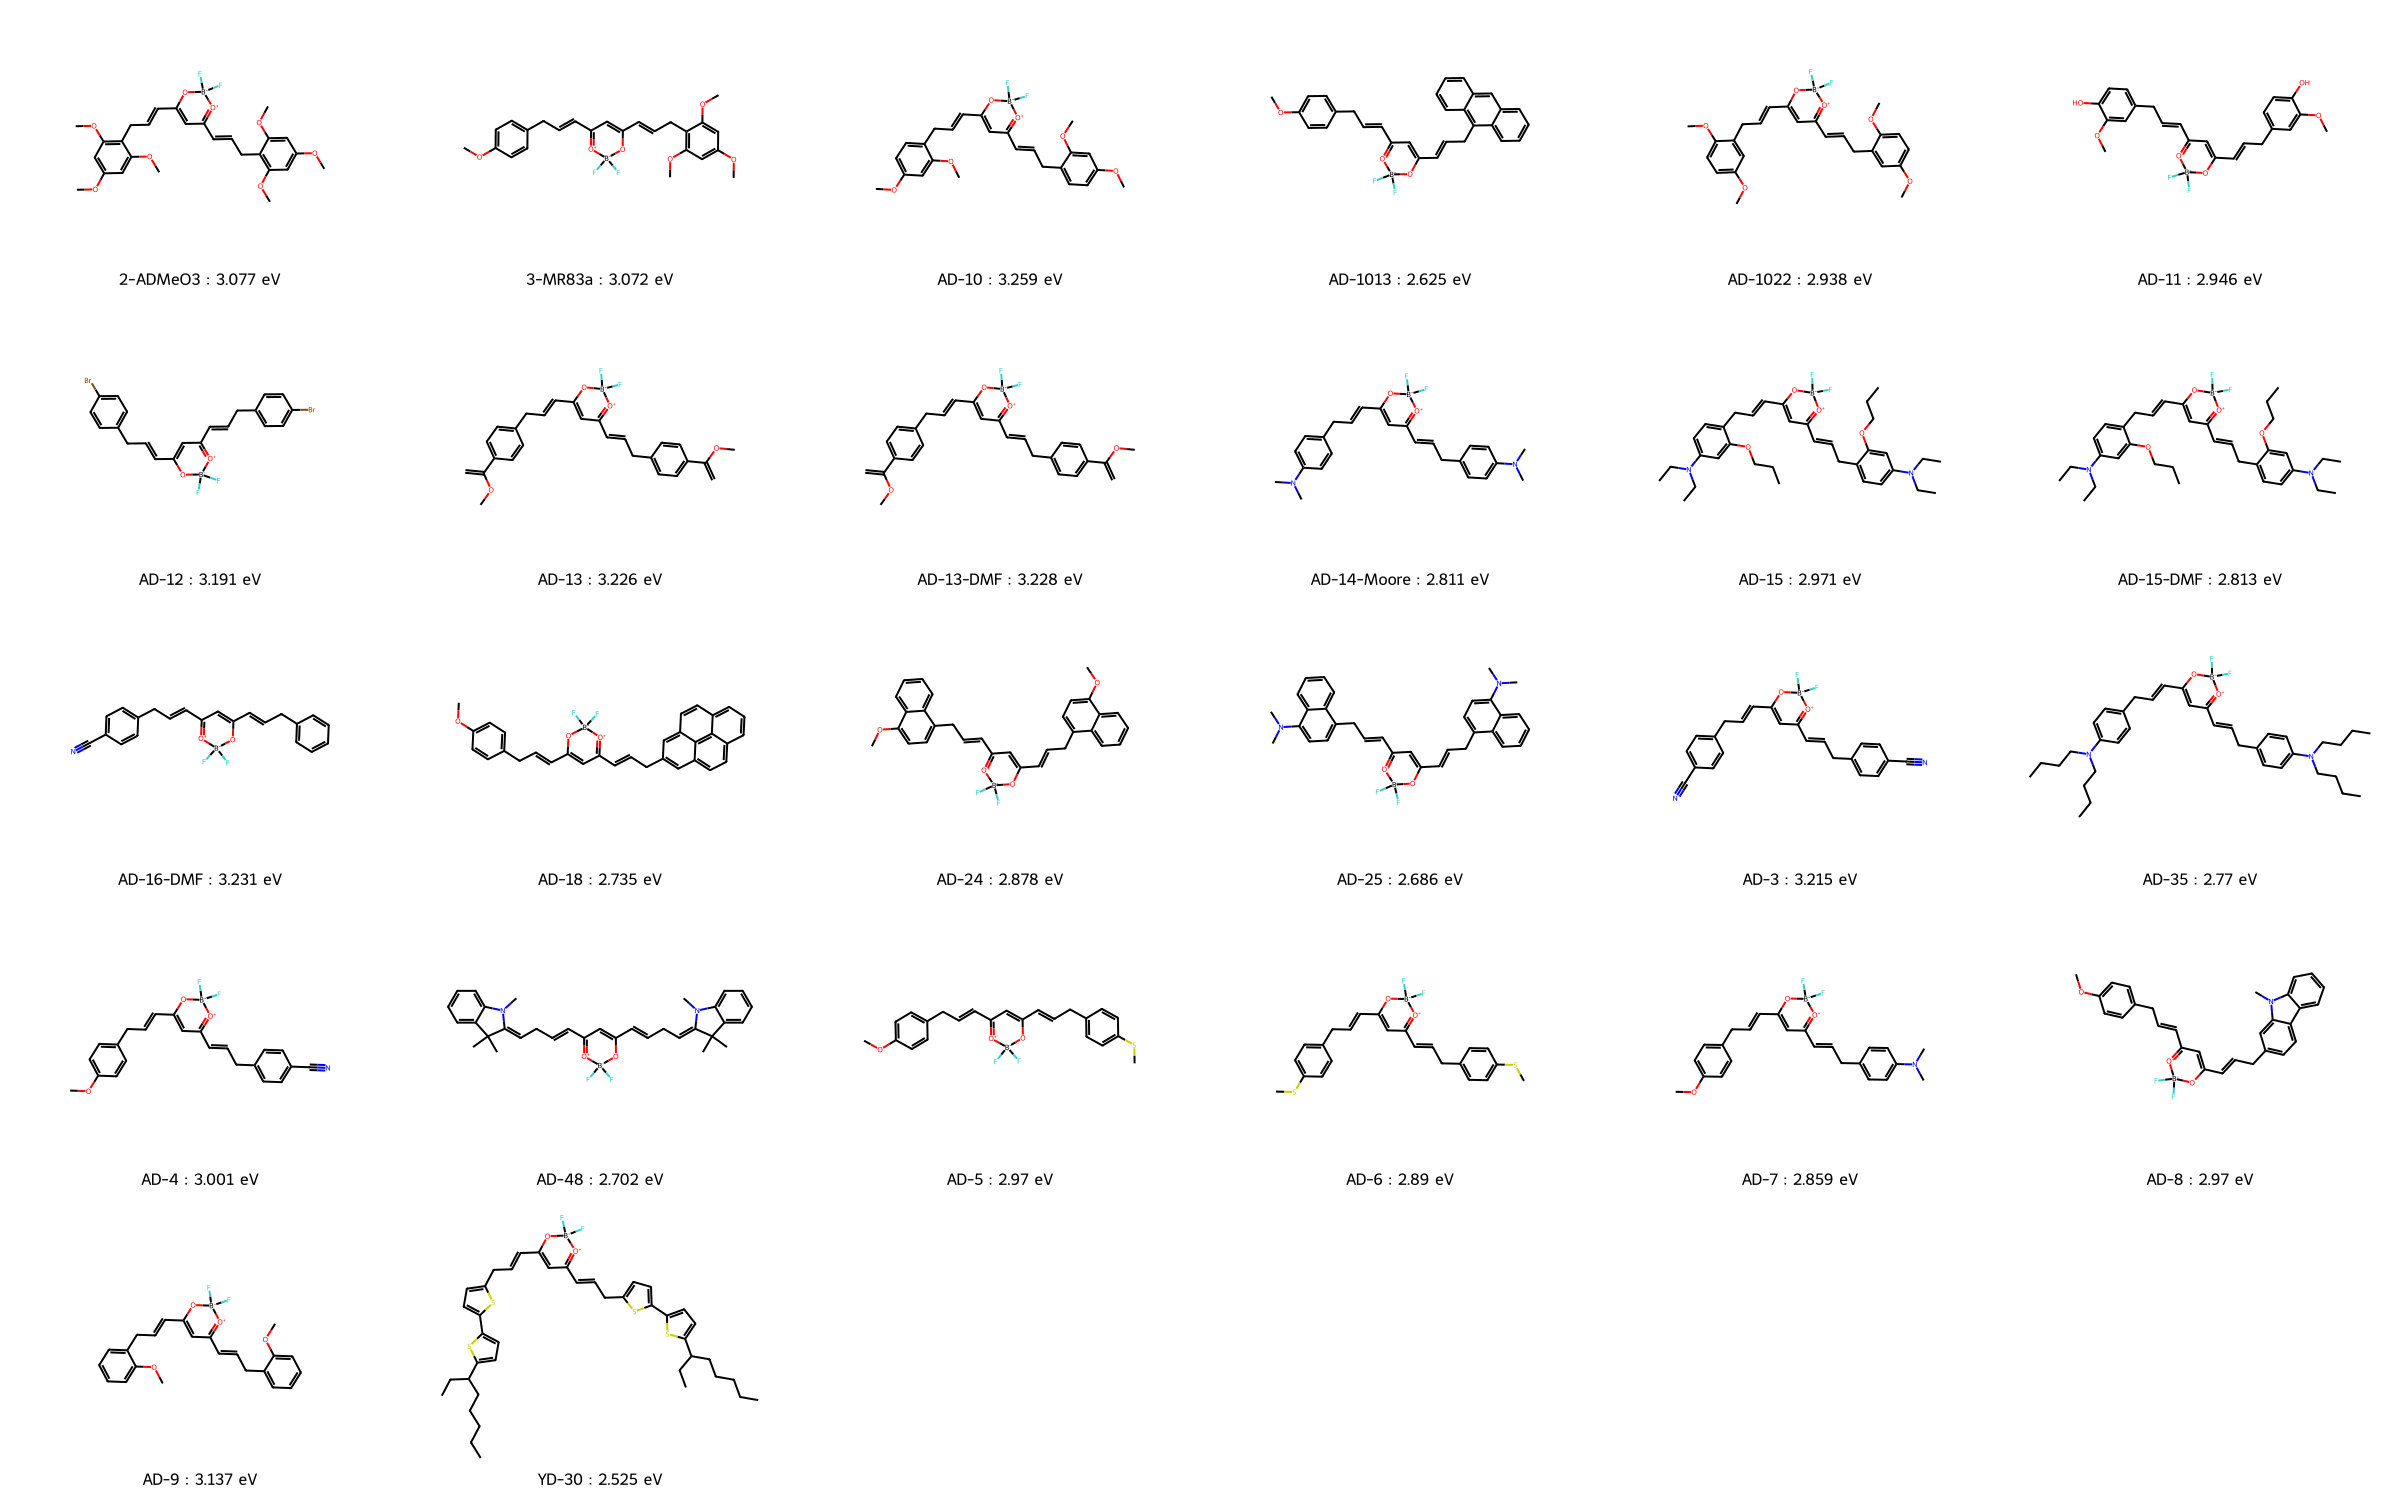

In [2]:
%%time
# importing dependencies
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

# Defining the SMILES strings for the cucumin varients
curcumin_variants = (
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc(Br)cc2)=[O+]3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2c1ccccc1n(C)c2c3)=C4)cc5",
    "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
)

# Defining the molecule names and HOMO-LUMO Gap
molecule_names = ['2-ADMeO3', '3-MR83a', 'AD-10', 'AD-1013', 'AD-1022', 'AD-11', 'AD-12', 'AD-13', 'AD-13-DMF', 'AD-14-Moore', 'AD-15', 'AD-15-DMF', 'AD-16-DMF', 'AD-18', 'AD-24', 'AD-25', 'AD-3', 'AD-35', 'AD-4', 'AD-48', 'AD-5', 'AD-6', 'AD-7', 'AD-8', 'AD-9', 'YD-30']
homo_lumo_gap = [3.077, 3.072, 3.259, 2.625, 2.938, 2.946, 3.191, 3.226, 3.228, 2.811, 2.971, 2.813, 3.231, 2.735, 2.878, 2.686, 3.215, 2.77, 3.001, 2.702, 2.97, 2.89, 2.859, 2.97, 3.137, 2.525]

# Molecules generation and descriptor calculations
molecules = [Chem.MolFromSmiles(smiles) for smiles in curcumin_variants]
mws = [round(Descriptors.MolWt(mol),3) for mol in molecules]
logp = [Descriptors.MolLogP(mol) for mol in molecules]
legends = [f"{name} : {gap} eV" for name, gap in zip(molecule_names, homo_lumo_gap)]
Draw.MolsToGridImage(molecules, molsPerRow=6, subImgSize=(400,300), legends=legends)

In [3]:
from rdkit import __version__
print(__version__)

2023.09.5


<span style="font-size: 25px; font-weight:medium; color:cyan;">02. Fingerprints Generation and Dataframe Preparation</span>

   - Examine possible fingerprint models including, `Morgan Fingerprints` (circular fingerprints), `MACCS` Keys (166-bit), RDKit Fingerprints, Atom Pair Fingerprints, Topological Torsion Fingerprints
   - The final DataFrame `curcumin_df` is ready for machine learning model training, containing all original data and Morgan fingerprint bit vectors.

<span style="font-size: 18px; font-weight:medium; color:yellow;">01. Generates Morgan fingerprints for each curcumin molecule and prepares the dataset for machine learning analysis.</span>

In [6]:
# importing dependencies
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints
def generate_morgan_fingerprint(smiles, radius=4, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality = True)
        return list(fingerprint)
    else:
        return None

# Creating the initial dataframe
data = {
    'Molecule': molecule_names,
    'Molecular Weight': mws,
    'LogP': logp,
    'Homo-Lumo Gap (eV)': homo_lumo_gap,
    'Smiles': curcumin_variants
}

curcumin_df = pd.DataFrame(data)

# Generate Morgan fingerprints and create the dataframe
curcumin_df['Morgan_Fingerprint'] = curcumin_df['Smiles'].apply(generate_morgan_fingerprint)
morgan_df = pd.DataFrame(curcumin_df['Morgan_Fingerprint'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
curcumin_df_mf = pd.concat([curcumin_df.drop(columns=['Morgan_Fingerprint']), morgan_df], axis=1)
curcumin_df

Molecule  Molecular Weight      LogP  Homo-Lumo Gap (eV)  \
0      2-ADMeO3           532.345   5.02930               3.077   
1       3-MR83a           472.293   5.01210               3.072   
2         AD-10           472.293   5.01210               3.259   
3       AD-1013           482.335   7.29270               2.625   
4       AD-1022           472.293   5.01210               2.938   
5         AD-11           444.239   4.40610               2.946   
6         AD-12           509.981   6.50270               3.191   
7         AD-13           464.317   6.21190               3.226   
8     AD-13-DMF           464.317   6.21190               3.228   
9   AD-14-Moore           438.327   5.10970               2.811   
10        AD-15           610.595   8.24770               2.971   
11    AD-15-DMF           610.595   8.24770               2.813   
12    AD-16-DMF           377.199   4.84938               3.231   
13        AD-18           506.357   7.88370               2.735   
14        AD-24           512.361   7.30130               2.878   
15        AD-25           538.447   7.41610               2.686   
16         AD-3           402.209   4.72106               3.215   
17        AD-35           606.651   9.79090               2.770   
18         AD-4           407.225   4.85798               3.001   
19        AD-48           542.479   7.89550               2.702   
20         AD-5           428.309   5.70820               2.970   
21         AD-6           444.377   6.42150               2.890   
22         AD-7           425.284   5.05230               2.859   
23         AD-8           485.339   6.63120               2.970   
24         AD-9           412.241   4.99490               3.137   
25        YD-30           752.933  14.70550               2.525   

                                               Smiles  \
0   COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...   
1   COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...   
2   COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...   
3   COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...   
4   COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...   
5   COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+]...   
6   F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc...   
7   C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)c...   
8   C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)c...   
9   CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=...   
10  CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N...   
11  CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N...   
12  N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc...   
13  COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1...   
14  COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=...   
15  CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccc...   
16  N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+]...   
17  CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCC...   
18  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][...   
19  CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C...   
20  COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(...   
21  CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B...   
22  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+...   
23  COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2...   
24  COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B...   
25  CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(...   

                                   Morgan_Fingerprint  
0   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  
3   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
6   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
8   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
9   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
10  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
curcumin_df_mf.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\curcumin_df_mf.csv")

<span style="font-size: 18px; font-weight:medium; color:yellow;">02. Generates mACCs fingerprints for each curcumin molecule and prepares the dataset for machine learning analysis.</span>

In [6]:
%%time
from rdkit.Chem import MACCSkeys

# Function to generate MACCS keys
def generate_maccs_keys(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = MACCSkeys.GenMACCSKeys(mol)
        return list(fingerprint)
    else:
        return None
    
# Generate MACCS keys and create the dataframe
curcumin_df['MACCS_Keys'] = curcumin_df['Smiles'].apply(generate_maccs_keys)
maccs_df = pd.DataFrame(curcumin_df['MACCS_Keys'].tolist(), columns=[f'maccs_{i}' for i in range(167)])
curcumin_df_mac = pd.concat([curcumin_df.drop(columns=['MACCS_Keys','Morgan_Fingerprint']), maccs_df], axis=1)
curcumin_df_mac.head(4)

CPU times: total: 31.2 ms
Wall time: 53.7 ms


Molecule  Molecular Weight    LogP  Homo-Lumo Gap (eV)  \
0  2-ADMeO3           532.345  5.0293               3.077   
1   3-MR83a           472.293  5.0121               3.072   
2     AD-10           472.293  5.0121               3.259   
3   AD-1013           482.335  7.2927               2.625   

                                              Smiles  maccs_0  maccs_1  \
0  COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...        0        0   
1  COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...        0        0   
2  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...        0        0   
3  COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...        0        0   

   maccs_2  maccs_3  maccs_4  ...  maccs_157  maccs_158  maccs_159  maccs_160  \
0        0        0        0  ...          1          0          1          1   
1        0        0        0  ...          1          0          1          1   
2        0        0        0  ...          1          0          1          1   
3        0        0        0  ...          1          0          1          1   

   maccs_161  maccs_162  maccs_163  maccs_164  maccs_165  maccs_166  
0          0          1          1          1          1          0  
1          0          1          1          1          1          0  
2          0          1          1          1          1          0  
3          0          1          1          1          1          0  

[4 rows x 172 columns]

<span style="font-size: 18px; font-weight:medium; color:yellow;">03. Generates FCFP fingerprints for each curcumin molecule and prepares the dataset for machine learning analysis.</span>

In [7]:
# Function to generate FCFP fingerprints
def generate_fcfp_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useFeatures=True)
        return list(fingerprint)
    else:
        return None
    
# Generate FCFP fingerprints and create the dataframe
curcumin_df['fcfp_Fingerprint'] = curcumin_df['Smiles'].apply(generate_fcfp_fingerprint)
fcfp_df = pd.DataFrame(curcumin_df['fcfp_Fingerprint'].tolist(), columns=[f'fcfp_{i}' for i in range(2048)])
curcumin_df_fcfp = pd.concat([curcumin_df.drop(columns=['MACCS_Keys','Morgan_Fingerprint','fcfp_Fingerprint']), fcfp_df], axis=1)
curcumin_df_fcfp.head(4)

Molecule  Molecular Weight    LogP  Homo-Lumo Gap (eV)  \
0  2-ADMeO3           532.345  5.0293               3.077   
1   3-MR83a           472.293  5.0121               3.072   
2     AD-10           472.293  5.0121               3.259   
3   AD-1013           482.335  7.2927               2.625   

                                              Smiles  fcfp_0  fcfp_1  fcfp_2  \
0  COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...       1       0       1   
1  COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...       1       0       1   
2  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...       1       0       1   
3  COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...       1       0       1   

   fcfp_3  fcfp_4  ...  fcfp_2038  fcfp_2039  fcfp_2040  fcfp_2041  fcfp_2042  \
0       0       1  ...          0          0          0          0          0   
1       0       1  ...          0          0          1          0          0   
2       0       1  ...          0          0          1          0          0   
3       0       1  ...          0          0          1          0          0   

   fcfp_2043  fcfp_2044  fcfp_2045  fcfp_2046  fcfp_2047  
0          0          0          0          0          0  
1          0          0          0          0          0  
2          0          0          0          0          0  
3          0          0          0          0          0  

[4 rows x 2053 columns]

<span style="font-size: 18px; font-weight:medium; color:yellow;">04. Generates pubchem fingerprints for each curcumin molecule and prepares the dataset for machine learning analysis.</span>

In [8]:
# Function to generate pubchem fingerprints
def generate_pubchem_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = Chem.RDKFingerprint(mol)
        return list(fingerprint)
    else:
        return None
    
# Generate pubchem fingerprints and create the dataframe
curcumin_df['pubchem_Fingerprint'] = curcumin_df['Smiles'].apply(generate_pubchem_fingerprint)
pubchem_df = pd.DataFrame(curcumin_df['pubchem_Fingerprint'].tolist(), columns=[f'pubchem_{i}' for i in range(2048)])
curcumin_df_pubchem = pd.concat([curcumin_df.drop(columns=['MACCS_Keys','Morgan_Fingerprint','fcfp_Fingerprint','pubchem_Fingerprint']), pubchem_df], axis=1)
curcumin_df_pubchem.head(4)

Molecule  Molecular Weight    LogP  Homo-Lumo Gap (eV)  \
0  2-ADMeO3           532.345  5.0293               3.077   
1   3-MR83a           472.293  5.0121               3.072   
2     AD-10           472.293  5.0121               3.259   
3   AD-1013           482.335  7.2927               2.625   

                                              Smiles  pubchem_0  pubchem_1  \
0  COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...          0          0   
1  COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...          0          0   
2  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...          0          0   
3  COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...          0          0   

   pubchem_2  pubchem_3  pubchem_4  ...  pubchem_2038  pubchem_2039  \
0          0          0          0  ...             0             1   
1          0          0          0  ...             0             1   
2          0          0          0  ...             0             1   
3          0          0          0  ...             0             1   

   pubchem_2040  pubchem_2041  pubchem_2042  pubchem_2043  pubchem_2044  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   

   pubchem_2045  pubchem_2046  pubchem_2047  
0             1             0             1  
1             1             0             1  
2             1             0             1  
3             1             0             0  

[4 rows x 2053 columns]

<span style="font-size: 25px; font-weight:medium; color:cyan;">03. Harvard OPV Dataset Preparation and Fingerprints Generation</span>
   - The resulting DataFrame `opv_df` contains all necessary data along with Morgan fingerprint bit vectors, ready for machine learning model training.

<span style="font-size: 18px; font-weight:medium; color:yellow;">01. This code preprocesses the Harvard OPV dataset for machine learning tasks by generating Morgan fingerprints, which act as feature vectors for the molecules.</span>

In [11]:
%%time
# Harvard OPV dataset import
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/havard-smile-opv/main/Non-fullerene%20small-molecules%20acceptors.csv')
newdata = data.drop(columns=['index', 'inchikey',  'HOMO_calc', 'LUMO_calc', 'LUMO_calib',
       'LUMO_calib_stds', 'HOMO_calib', 'HOMO_calib_stds', 'molW',
       'PCE_calc', 'Voc_calc', 'Jsc_calc', 'FF_calc', 'EQE_calc',
       'PCE_calib', 'Voc_calib', 'Jsc_calib', 'FF_calib', 'EQE_calib',
       'PCE_cdiff', 'PCE_calib_plus'], axis=1)

# Generate New dataframe of morgan fingerprint for trainning
newdata["Morgan_Fingerprints"] = newdata['smiles'].apply(generate_morgan_fingerprint)
morgan_df_opv = pd.DataFrame(newdata['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
opv_df_mf = pd.concat([newdata.drop(columns = ['Morgan_Fingerprints']), morgan_df_opv],axis = 1)
opv_df_mf.head()
opv_df_mf.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_mf.csv")

CPU times: total: 1min 7s
Wall time: 1min 47s


<span style="font-size: 18px; font-weight:medium; color:yellow;">02. Feature vectors for the molecules generated using mACCS keys fingerprints</span>

In [10]:
%%time
# Generate New dataframe of mACCS keys fingerprint for trainning
newdata["MACCS_Keys"] = newdata['smiles'].apply(generate_maccs_keys)
maccs_df_opv = pd.DataFrame(newdata['MACCS_Keys'].tolist(), columns=[f'maccs_{i}' for i in range(167)])
opv_df_maccs = pd.concat([newdata.drop(columns = ['MACCS_Keys','Morgan_Fingerprints']), maccs_df_opv],axis = 1)
opv_df_maccs.head()

CPU times: total: 1min 41s
Wall time: 1min 43s


smiles  GAP_calib  GAP_calc  \
0  CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...   2.601647  3.109059   
1  CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...   2.204408  2.634680   
2  CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...   2.374851  2.825687   
3  CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...   2.887886  3.342626   
4  CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...   2.876440  3.304822   

   maccs_0  maccs_1  maccs_2  maccs_3  maccs_4  maccs_5  maccs_6  ...  \
0        0        0        0        0        0        0        0  ...   
1        0        0        0        0        0        0        0  ...   
2        0        0        0        0        0        0        0  ...   
3        0        0        0        0        0        0        0  ...   
4        0        0        0        0        0        0        0  ...   

   maccs_157  maccs_158  maccs_159  maccs_160  maccs_161  maccs_162  \
0          0          1          1          1          1          1   
1          0          1          1          1          1          1   
2          0          1          1          1          1          1   
3          0          1          1          1          1          1   
4          0          1          1          1          1          1   

   maccs_163  maccs_164  maccs_165  maccs_166  
0          1          1          1          0  
1          1          1          1          0  
2          1          1          1          0  
3          1          1          1          0  
4          1          1          1          0  

[5 rows x 170 columns]

<span style="font-size: 18px; font-weight:medium; color:yellow;">03. Feature vectors for the molecules generated using FCFP fingerprints</span>

In [11]:
%%time
# Generate New dataframe of fcfp keys fingerprint for trainning
newdata["fcfp_fingerprints"] = newdata['smiles'].apply(generate_fcfp_fingerprint)
fcfp_df_opv = pd.DataFrame(newdata['fcfp_fingerprints'].tolist(), columns=[f'fcfp_{i}' for i in range(2048)])
opv_df_fcfp = pd.concat([newdata.drop(columns = ['MACCS_Keys','fcfp_fingerprints','Morgan_Fingerprints']), fcfp_df_opv],axis = 1)
opv_df_fcfp.head()

CPU times: total: 1min 3s
Wall time: 1min 5s


smiles  GAP_calib  GAP_calc  \
0  CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...   2.601647  3.109059   
1  CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...   2.204408  2.634680   
2  CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...   2.374851  2.825687   
3  CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...   2.887886  3.342626   
4  CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...   2.876440  3.304822   

   fcfp_0  fcfp_1  fcfp_2  fcfp_3  fcfp_4  fcfp_5  fcfp_6  ...  fcfp_2038  \
0       1       0       1       0       1       0       1  ...          0   
1       1       0       1       0       1       0       1  ...          0   
2       1       0       1       0       1       0       1  ...          0   
3       1       0       1       0       1       0       1  ...          0   
4       1       0       1       0       1       0       1  ...          0   

   fcfp_2039  fcfp_2040  fcfp_2041  fcfp_2042  fcfp_2043  fcfp_2044  \
0          1          1          0          0          0          0   
1          1          1          0          0          0          0   
2          1          1          0          0          0          0   
3          1          1          0          0          0          0   
4          1          1          0          0          0          0   

   fcfp_2045  fcfp_2046  fcfp_2047  
0          0          0          0  
1          0          0          0  
2          1          0          0  
3          1          0          0  
4          0          0          0  

[5 rows x 2051 columns]

<span style="font-size: 18px; font-weight:medium; color:yellow;">04. Feature vectors for the molecules generated using pubchem fingerprints</span>

In [12]:
%%time

# Generate New dataframe of pubchem keys fingerprint for trainning
newdata["pubchem_fingerprints"] = newdata['smiles'].apply(generate_pubchem_fingerprint)
pubchem_df_opv = pd.DataFrame(newdata['pubchem_fingerprints'].tolist(), columns=[f'pubchem_{i}' for i in range(2048)])
opv_df_pubchem = pd.concat([newdata.drop(columns = ['fcfp_fingerprints','MACCS_Keys','pubchem_fingerprints','Morgan_Fingerprints']), pubchem_df_opv],axis = 1)
opv_df_pubchem.head()

CPU times: total: 2min 54s
Wall time: 2min 58s


smiles  GAP_calib  GAP_calc  \
0  CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...   2.601647  3.109059   
1  CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...   2.204408  2.634680   
2  CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...   2.374851  2.825687   
3  CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...   2.887886  3.342626   
4  CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...   2.876440  3.304822   

   pubchem_0  pubchem_1  pubchem_2  pubchem_3  pubchem_4  pubchem_5  \
0          1          1          1          1          1          1   
1          1          1          1          1          1          1   
2          1          1          1          1          1          1   
3          1          1          1          1          1          1   
4          1          1          1          1          1          1   

   pubchem_6  ...  pubchem_2038  pubchem_2039  pubchem_2040  pubchem_2041  \
0          1  ...             0             1             0             1   
1          1  ...             0             1             0             1   
2          0  ...             0             1             0             1   
3          0  ...             0             1             0             1   
4          1  ...             1             0             0             1   

   pubchem_2042  pubchem_2043  pubchem_2044  pubchem_2045  pubchem_2046  \
0             0             1             1             0             1   
1             0             1             1             0             0   
2             0             0             1             1             0   
3             0             0             1             0             0   
4             1             0             1             1             1   

   pubchem_2047  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 2051 columns]

<span style="font-size: 25px; font-weight:medium; color:cyan;">04. Initial examination for  ML training on Harvard OPV preprocessed dataset.</span>

<span style="font-size: 18px; font-weight:medium; color:yellow;">Pycaret regression setup used to try basic regression model training on reduced HOPV dataframe as an initial step.</span>

   - The resulting DataFrame `newdata_fps_reduced` with only 25% of HOPV molecules used to run bunch of regression algorythms and analyze R2 score and other parameters to check the accuracy of the trained model can be achived with this dataset.

In [14]:
# Sampling the data set to train
dataframes = {
    "opv_df_mf": opv_df_mf,
    "opv_df_maccs": opv_df_maccs,
    "opv_df_pubchem": opv_df_pubchem,
    "opv_df_fcfp": opv_df_fcfp
}

sampled_dataframes = {}

for name, df in dataframes.items():
    new_name = name + "_sampled"
    sampled_dataframes[new_name] = df.sample(frac=0.1, random_state=42)

opv_df_mf_sampled = sampled_dataframes["opv_df_mf_sampled"]
opv_df_maccs_sampled = sampled_dataframes["opv_df_maccs_sampled"]
opv_df_pubchem_sampled = sampled_dataframes["opv_df_pubchem_sampled"]
opv_df_fcfp_sampled = sampled_dataframes["opv_df_fcfp_sampled"]

# Summary of the operation
df_shapes = pd.DataFrame({
    'DataFrame Name': list(sampled_dataframes.keys()),
    'Shape': [df.shape for df in sampled_dataframes.values()]
})
df_shapes

DataFrame Name         Shape
0       opv_df_mf_sampled  (5126, 2051)
1    opv_df_maccs_sampled   (5126, 170)
2  opv_df_pubchem_sampled  (5126, 2051)
3     opv_df_fcfp_sampled  (5126, 2051)

<span style="font-size: 18px; font-weight:medium; color:yellow;">01. Pycaret regression on morgan fingerprints of the dataset</span>

In [22]:
%%time
from sklearn.model_selection import train_test_split

X = opv_df_mf_sampled.iloc[:,3:]
y = opv_df_mf_sampled["GAP_calib"]

reg1 = pd.concat([X,y], axis = 1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from pycaret.regression import *

setup1 = pd.concat([X_train,y_train], axis = 1)

regression_setup = setup(setup1, target='GAP_calib', verbose=False, session_id=123)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr', 'lasso', 'en', 'par']
best_model_morgan_init = compare_models(include=models_to_include, sort='r2')

CPU times: total: 14.6 s
Wall time: 2min 5s


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract the results
results = pull()

# Create a figure
fig = make_subplots(rows=1, cols=1, subplot_titles=['Comparison of R² Scores for Different Models'])

# Add bar trace for R² scores
fig.add_trace(
    go.Bar(
        y=results.index,
        x=results['R2'],
        orientation='h',
        text=results['R2'].round(4),
        textposition='auto',
        marker=dict(color='skyblue')
    ),
    row=1, col=1
)

# Update layout
fig.update_layout(
    title='Comparison of R² Scores for Different Models',
    xaxis_title='R² Score',
    yaxis_title='Model',
    yaxis=dict(autorange="reversed"),  # reverse the order of y-axis for better readability
    height=600
)

# Show plot
fig.show()

<span style="font-size: 18px; font-weight:medium; color:yellow;">02. Pycaret regression on mACCs keys fingerprints of the dataset</span>

In [23]:
%%time
from sklearn.model_selection import train_test_split

X = opv_df_maccs_sampled.iloc[:,3:]
y = opv_df_maccs_sampled["GAP_calib"]

reg1 = pd.concat([X,y], axis = 1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from pycaret.regression import *

setup1 = pd.concat([X_train,y_train], axis = 1)

regression_setup = setup(setup1, target='GAP_calib', verbose=False, session_id=123)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'knn', 'lasso', 'en', 'par']
best_model_maccs_init = compare_models(include=models_to_include, sort='r2')

CPU times: total: 9.95 s
Wall time: 12.4 s


<span style="font-size: 18px; font-weight:medium; color:yellow;">03. Pycaret regression on FCFP fingerprints of the dataset</span>

In [24]:
%%time
from sklearn.model_selection import train_test_split

X = opv_df_fcfp_sampled.iloc[:,3:]
y = opv_df_fcfp_sampled["GAP_calib"]

reg1 = pd.concat([X,y], axis = 1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from pycaret.regression import *

setup1 = pd.concat([X_train,y_train], axis = 1)

regression_setup = setup(setup1, target='GAP_calib', verbose=False, session_id=123)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'knn', 'lasso', 'en', 'par']
best_model_fcfp_init = compare_models(include=models_to_include, sort='r2')

CPU times: total: 11.9 s
Wall time: 1min 1s


<span style="font-size: 18px; font-weight:medium; color:yellow;">04. Pycaret regression on PubChem fingerprints of the dataset</span>

In [25]:
%%time
from sklearn.model_selection import train_test_split

X = opv_df_pubchem_sampled.iloc[:,3:]
y = opv_df_pubchem_sampled["GAP_calib"]

reg1 = pd.concat([X,y], axis = 1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from pycaret.regression import *

setup1 = pd.concat([X_train,y_train], axis = 1)

regression_setup = setup(setup1, target='GAP_calib', verbose=False, session_id=123)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr', 'lasso', 'en', 'par']
best_model_pubchem_init = compare_models(include=models_to_include, sort='r2')

CPU times: total: 16.8 s
Wall time: 2min 14s


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.regression import *
import time

fingerprint_datasets = [
    (opv_df_mf_sampled, 'Morgan'),
    (opv_df_maccs_sampled, 'MACCS'),
    (opv_df_fcfp_sampled, 'FCFP'),
    (opv_df_pubchem_sampled, 'PubChem')
]

def train_models_and_get_results(fingerprint_data, fingerprint_name):
    print(f"Processing the training of {fingerprint_name}...")
    start_time = time.time()
    
    # Splitting the data
    X = fingerprint_data.iloc[:, 3:]
    y = fingerprint_data["GAP_calib"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Preparing the data for PyCaret
    setup_data = pd.concat([X_train, y_train], axis=1)

    # Setting up PyCaret regression
    regression_setup = setup(setup_data, target='GAP_calib', verbose=False, session_id=123)

    # Selecting and comparing models
    models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'knn', 'lasso', 'en', 'par']
    best_model = compare_models(include=models_to_include, sort='r2', verbose=False)
    
    # Pulling the results
    results = pull()

    # Adding the fingerprint type and time taken to the results
    results['Fingerprint Type'] = fingerprint_name
    results['Time Taken (s)'] = time.time() - start_time

    print(f"Completed pulling results of {fingerprint_name}")
    return results

all_results = []

for fp_data, fp_name in fingerprint_datasets:
    fp_results = train_models_and_get_results(fp_data, fp_name)
    all_results.append(fp_results)

final_results = pd.concat(all_results, ignore_index=True)
final_results.head()

Processing the training of Morgan...
Completed pulling results of Morgan
Processing the training of MACCS...
Completed pulling results of MACCS
Processing the training of FCFP...
Completed pulling results of FCFP
Processing the training of PubChem...
Completed pulling results of PubChem


Model     MAE     MSE    RMSE      R2   RMSLE  \
0  Light Gradient Boosting Machine  0.2078  0.0761  0.2756  0.7873  0.0743   
1        Extreme Gradient Boosting  0.2171  0.0813  0.2848  0.7727  0.0764   
2                   Bayesian Ridge  0.2256  0.0856  0.2923  0.7612  0.0796   
3          Random Forest Regressor  0.2280  0.0928  0.3042  0.7414  0.0819   
4                  Huber Regressor  0.2878  0.1388  0.3723  0.6124  0.1018   

     MAPE  TT (Sec) Fingerprint Type  Time Taken (s)  
0  0.0787     0.785           Morgan      104.804221  
1  0.0816     0.710           Morgan      104.804221  
2  0.0857     2.169           Morgan      104.804221  
3  0.0868     4.094           Morgan      104.804221  
4  0.1078     1.010           Morgan      104.804221

In [ ]:
final_results.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\initial_model_comparison_results.csv")

In [16]:
print(final_results.columns)

Index(['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE', 'TT (Sec)',
       'Fingerprint Type', 'Time Taken (s)'],
      dtype='object')


In [18]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame (assuming `final_results` is already created from the previous step)
# final_results = pd.read_csv('model_comparison_results.csv')

# Create DataFrame with average R2 and RMSE for each Fingerprint Type
avg_scores = final_results.groupby('Fingerprint Type').agg({'R2': 'mean', 'RMSE': 'mean'}).reset_index()

# Plot Fingerprint-wise average R² and RMSE scores
fig_avg_scores = px.bar(avg_scores, x='Fingerprint Type', y=['R2', 'RMSE'], barmode='group',
                        title='Fingerprint-wise Average R² and RMSE Scores',
                        labels={'value': 'Score', 'variable': 'Metric'},
                        text_auto=True)
fig_avg_scores.update_layout(height=600)
fig_avg_scores.show()

# Plot each fingerprint type model-wise R² score
fig_model_wise_r2 = px.bar(final_results, x='Model', y='R2', color='Fingerprint Type',
                           title='Each Fingerprint Type Model-wise R² Score',
                           labels={'R2': 'R² Score'},
                           text_auto=True)
fig_model_wise_r2.update_layout(height=600)
fig_model_wise_r2.show()

# Find the best model for each fingerprint type based on R² score
best_models_per_fingerprint = final_results.loc[final_results.groupby('Fingerprint Type')['R2'].idxmax()]

# Plot best models for each fingerprint type
fig_best_models_per_fingerprint = px.bar(best_models_per_fingerprint, x='Fingerprint Type', y='R2', color='Model',
                                         title='Best Model per Fingerprint Type',
                                         labels={'R2': 'R² Score'},
                                         text_auto=True)
fig_best_models_per_fingerprint.update_layout(height=600)
fig_best_models_per_fingerprint.show()

# Comparatively best model
fig_comparative_best_model = go.Figure()

for fp in final_results['Fingerprint Type'].unique():
    fp_df = final_results[final_results['Fingerprint Type'] == fp]
    fig_comparative_best_model.add_trace(go.Bar(
        x=fp_df['Model'],
        y=fp_df['R2'],
        name=fp,
        text=fp_df['R2'],
        textposition='auto'
    ))

fig_comparative_best_model.update_layout(
    barmode='group',
    title='Comparatively Best Model Performance across Fingerprints',
    xaxis_title='Model',
    yaxis_title='R² Score',
    legend_title='Fingerprint Type',
    height=600
)

fig_comparative_best_model.show()

<span style="font-size: 25px; font-weight:medium; color:cyan;">05. Learning model train with the selected best fingerprint type and model type</span>

   - Based on the accuracy Moragan fingerprint selected as the best performing feature generating model and from pycaret analysis light gradient boosting machine selected to run the model and optimize to get the maximum accuracy

<span style="font-size: 18px; font-weight:medium; color:yellow;"> Lightgbm runs exactly according to the hyperprameters extracted from pycaret regression setup</span>

In [12]:
%%time
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

# Load your dataset
X = opv_df_mf.iloc[:, 3:]
y = opv_df_mf["GAP_calib"]

reg1 = pd.concat([X, y], axis=1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LightGBM model with the specified hyperparameters
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    class_weight=None,
    colsample_bytree=1.0,
    importance_type='split',
    learning_rate=0.1,
    max_depth=-1,
    min_child_samples=20,
    min_child_weight=0.001,
    min_split_gain=0.0,
    n_estimators=100,
    n_jobs=-1,
    num_leaves=31,
    objective=None,
    random_state=123,
    reg_alpha=0.0,
    reg_lambda=0.0,
    subsample=1.0,
    subsample_for_bin=200000,
    subsample_freq=0
)

# Initialize tqdm progress bar
bar = tqdm_notebook(total=100, desc="Training Progress")

# Function to update tqdm progress bar
def lgb_tqdm_callback(env):
    bar.update(env.iteration - bar.n)

# Fit the model with tqdm callback
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb_tqdm_callback]
)

# Close the progress bar after training is done
bar.close()

# Make predictions
y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)

# Calculate evaluation metrics
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4094
[LightGBM] [Info] Number of data points in the train set: 41004, number of used features: 2047
[LightGBM] [Info] Start training from score 2.807195
Train RMSE: 0.2134071689852282
Test RMSE: 0.22900320512401573
Train R2: 0.8798246335379133
Test R2: 0.8597140116383557
CPU times: total: 38 s
Wall time: 16.9 s


In [13]:
# Predicting the GAP_calib values for the OPV dataset
opv_df_mf_pred = opv_df_mf.drop(opv_df_mf.columns[3:], axis=1)
opv_df_mf_pred['GAP_calib_pred'] = lgb_model.predict(opv_df_mf.iloc[:,3:])

# calculate the RMSE and R2 scores for each gap_calib and gap_calib_pred values
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(opv_df_mf_pred['GAP_calib'], opv_df_mf_pred['GAP_calib_pred'], squared=False)
r2 = r2_score(opv_df_mf_pred['GAP_calib'], opv_df_mf_pred['GAP_calib_pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 0.21661647468091053
R2: 0.875847133947626


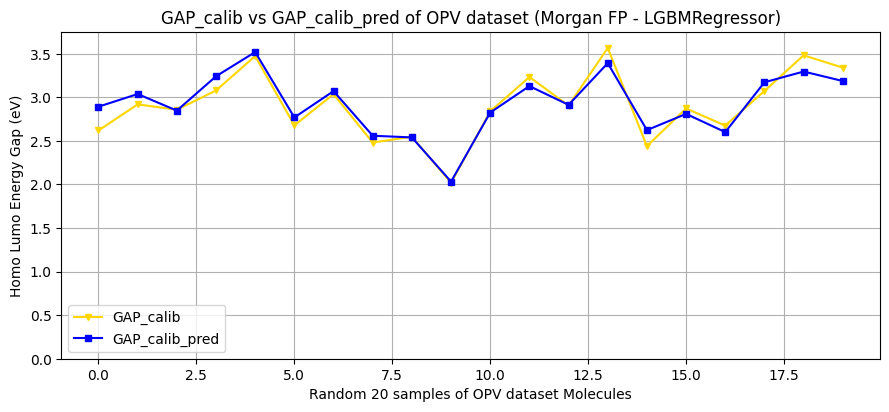

In [32]:
import matplotlib.pyplot as plt

random_sample_df = opv_df_mf_pred.sample(n=20, random_state=42)
random_sample_df.reset_index(drop=True, inplace=True)

# Plotting the GAP and GAP_pred values against the index (random 50 samples)
plt.figure(figsize=(9,4))
plt.plot(random_sample_df['GAP_calib'][:50], label='GAP_calib', color = 'gold', markersize=5, marker='v')
plt.plot(random_sample_df['GAP_calib_pred'][:50], label='GAP_calib_pred', color = 'blue', markersize=5, marker='s')
plt.xlabel('Random 20 samples of OPV dataset Molecules')
plt.ylabel('Homo Lumo Energy Gap (eV)')
plt.grid(True)
plt.tight_layout()
plt.ylim(0,3.75)
plt.title('GAP_calib vs GAP_calib_pred of OPV dataset (Morgan FP - LGBMRegressor)')
plt.legend()
plt.show()

In [35]:
# predicting the Homo-Lumo Gap (eV) values for the curcumin dataset
curcumin_df_mf = curcumin_df_mf.sort_values(by='Homo-Lumo Gap (eV)', ascending=False).reset_index(drop=True)
curcumin_df_mf_pred = curcumin_df_mf.drop(curcumin_df_mf.columns[5:], axis=1)
curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'] = lgb_model.predict(curcumin_df_mf.iloc[:,5:])
curcumin_df_mf_pred.head()

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 0.2563997084068254
R2: -0.5864743067996663


In [26]:
import numpy as np

# Predicted and actual Homo-Lumo Gap (eV) values
y_true = curcumin_df_mf_pred['Homo-Lumo Gap (eV)'].values
y_pred = curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'].values

# Calculate the residuals
residuals = y_true - y_pred

# Calculate SS_res and SS_tot
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_true - np.mean(y_true))**2)

# Calculate R² manually
r2_manual = 1 - (ss_tot / ss_res)

print(f'Manual R²: {r2_manual}')


Manual R²: 0.3696714811491262


In [19]:
import pandas as pd

# Predicted and actual Homo-Lumo Gap (eV) values
y_true = curcumin_df_mf_pred['Homo-Lumo Gap (eV)'].values
y_pred = curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'].values

# Calculate the residuals and squared errors
curcumin_df_mf_pred['Residual Error'] = y_true - y_pred
curcumin_df_mf_pred['Squared Error'] = curcumin_df_mf_pred['Residual Error']**2

# Calculate the mean of actual values
y_mean = np.mean(y_true)

# Calculate total variance from the mean
curcumin_df_mf_pred['Total Variance'] = (y_true - y_mean)**2

# Calculate R² score for each point
curcumin_df_mf_pred['R² Score'] = 1 - (curcumin_df_mf_pred['Squared Error'] / curcumin_df_mf_pred['Total Variance'])

# Add a summary row with total values
summary_row = {
    'Homo-Lumo Gap (eV)': np.nan, 
    'Homo-Lumo Gap (eV) pred': np.nan, 
    'Residual Error': np.sum(curcumin_df_mf_pred['Residual Error']),
    'Squared Error': np.sum(curcumin_df_mf_pred['Squared Error']),
    'Total Variance': np.sum(curcumin_df_mf_pred['Total Variance']),
    'R² Score': 1 - (np.sum(curcumin_df_mf_pred['Squared Error']) / np.sum(curcumin_df_mf_pred['Total Variance']))
}

curcumin_df_mf_pred = curcumin_df_mf_pred.append(summary_row, ignore_index=True)

# Display the DataFrame
curcumin_df_mf_pred

Molecule  Molecular Weight      LogP  Homo-Lumo Gap (eV)  \
0      2-ADMeO3           532.345   5.02930               3.077   
1       3-MR83a           472.293   5.01210               3.072   
2         AD-10           472.293   5.01210               3.259   
3       AD-1013           482.335   7.29270               2.625   
4       AD-1022           472.293   5.01210               2.938   
5         AD-11           444.239   4.40610               2.946   
6         AD-12           509.981   6.50270               3.191   
7         AD-13           464.317   6.21190               3.226   
8     AD-13-DMF           464.317   6.21190               3.228   
9   AD-14-Moore           438.327   5.10970               2.811   
10        AD-15           610.595   8.24770               2.971   
11    AD-15-DMF           610.595   8.24770               2.813   
12    AD-16-DMF           377.199   4.84938               3.231   
13        AD-18           506.357   7.88370               2.735   
14        AD-24           512.361   7.30130               2.878   
15        AD-25           538.447   7.41610               2.686   
16         AD-3           402.209   4.72106               3.215   
17        AD-35           606.651   9.79090               2.770   
18         AD-4           407.225   4.85798               3.001   
19        AD-48           542.479   7.89550               2.702   
20         AD-5           428.309   5.70820               2.970   
21         AD-6           444.377   6.42150               2.890   
22         AD-7           425.284   5.05230               2.859   
23         AD-8           485.339   6.63120               2.970   
24         AD-9           412.241   4.99490               3.137   
25        YD-30           752.933  14.70550               2.525   
26          NaN               NaN       NaN                 NaN   

                                               Smiles  \
0   COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...   
1   COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...   
2   COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...   
3   COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...   
4   COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...   
5   COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+]...   
6   F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc...   
7   C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)c...   
8   C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)c...   
9   CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=...   
10  CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N...   
11  CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N...   
12  N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc...   
13  COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1...   
14  COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=...   
15  CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccc...   
16  N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+]...   
17  CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCC...   
18  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][...   
19  CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C...   
20  COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(...   
21  CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B...   
22  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+...   
23  COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2...   
24  COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B...   
25  CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(...   
26                                                NaN   

    Homo-Lumo Gap (eV) pred       SST       SSR     R2_point  Residual Error  \
0                  3.258181  0.015876  0.032826    -1.067677       -0.181181   
1                  3.235494  0.014641  0.026730    -0.825725       -0.163494   
2                  3.214215  0.094864  0.002006     0.978857        0.044785   
3                  3.108469  0.106276  0.233742    -1.199387       -0.483469   
4                  3.251842  0.000169  0.098496  -581.819511       -0.313842   
5                  3.221151  0.000025  0.075708 -3027

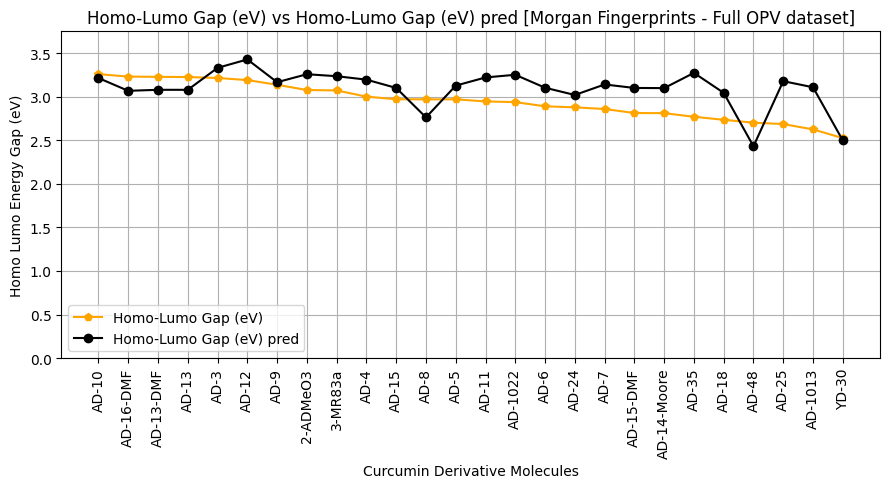

In [36]:
# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker= 'p', label='Homo-Lumo Gap (eV)',color = "orange")
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'], marker= 'o', label='Homo-Lumo Gap (eV) pred', color = "black")
plt.xlabel('Curcumin Derivative Molecules')
plt.ylabel('Homo Lumo Energy Gap (eV)')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Morgan Fingerprints - Full OPV dataset]')
plt.legend()
plt.ylim(0,3.75)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 18px; font-weight:medium; color:yellow;">Hyperparameter tunning using Randimized Search CV</span>

   - LGBM has large number of hyperparameters which can be optimized. This RandomizedSearchCV act as a random subset of the hyperparameter space, making it computationally cheaper and faster, especially when dealing with a large number of hyperparameters.

<span style="font-size: 15px; font-weight:medium; color:red;">WARNING: The following RandomizedSearchCV operation can take a significant amount of time and computational power to complete. Ensure you have sufficient resources and consider running this during off-peak hours or on a high-performance machine.</span>

In [18]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# X = opv_df_mf.iloc[:,3:]
# y = opv_df_mf["GAP_calib"]

# reg1 = pd.concat([X,y], axis = 1)
# X = reg1.drop('GAP_calib', axis=1)
# y = reg1['GAP_calib']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid
# param_dist = {
#     'num_leaves': [31, 51, 71],
#     'learning_rate': uniform(0.01, 1),
#     'n_estimators': [100, 500, 1000],
# }

# lgb_model = lgb.LGBMRegressor(random_state=123, n_jobs=-1)

# # Use RandomizedSearchCV for hyperparameter tuning
# random_search = RandomizedSearchCV(
#     estimator=lgb_model,
#     param_distributions=param_dist,
#     n_iter=20,
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=0,
#     random_state=123,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# print(f'Best parameters: {best_params}')

<span style="font-size: 18px; font-weight:medium; color:yellow;">Train the model using best parameters</span>

    - Best parameters: {'learning_rate': 0.23685145356420312, 'n_estimators': 1000, 'num_leaves': 51}

In [37]:
%%time
best_params = {'learning_rate': 0.23685145356420312, 'n_estimators': 1000, 'num_leaves': 51}
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.127436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4094
[LightGBM] [Info] Number of data points in the train set: 41004, number of used features: 2047
[LightGBM] [Info] Start training from score 2.807195
Train RMSE: 0.05432069688933971
Test RMSE: 0.1683479402026202
Train R2: 0.9922137541598255
Test R2: 0.9241864577471411
CPU times: total: 26 s
Wall time: 15.1 s


<span style="font-size: 18px; font-weight:medium; color:yellow;">Analysis</span>

   - High Training Performance:
        - The Train RMSE is very low and the Train R2 is very high, indicating that the model fits the training data very well.

   - Good Testing Performance:
        - The Test R2 is still high (0.924), which indicates that the model explains a large portion of the variance in the test data.
        - The Test RMSE is higher than the Train RMSE, which is expected. However, the increase is notable and suggests there may be some overfitting.

<span style="font-size: 25px; font-weight:medium; color:cyan;">06. Predictions using trained Best model on Experimented curcumin molecules' Band Gap</span>

<span style="font-size: 18px; font-weight:medium; color:yellow;">Prediction based on best model generated for curcumin molecules. DFT values predicting accuracy and experimented values prediction capability analyzed.</span>

   - For Harvard OPV full dataset model performed really well by giving 98% accuracy on predicting.

In [38]:
# Predicting the GAP_calib values for the OPV dataset
opv_df_mf_pred = opv_df_mf.drop(opv_df_mf.columns[3:], axis=1)
opv_df_mf_pred['GAP_calib_pred'] = best_model.predict(opv_df_mf.iloc[:,3:])

# calculate the RMSE and R2 scores for each gap_calib and gap_calib_pred values
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(opv_df_mf_pred['GAP_calib'], opv_df_mf_pred['GAP_calib_pred'], squared=False)
r2 = r2_score(opv_df_mf_pred['GAP_calib'], opv_df_mf_pred['GAP_calib_pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 0.08960576193739148
R2: 0.9787555419554135


<span style="font-size: 18px; font-weight:medium; color:yellow;">Plotting the calibrated data from DFT calculation and predicted data using trained model</span>

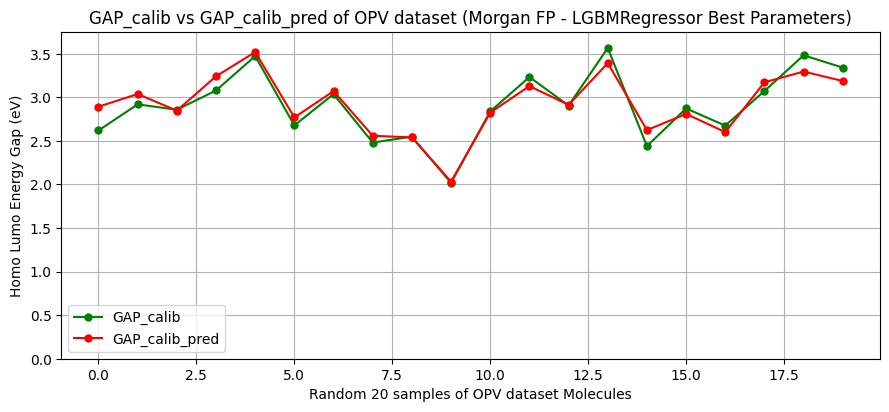

In [39]:
import matplotlib.pyplot as plt

random_sample_df = opv_df_mf_pred.sample(n=20, random_state=42)
random_sample_df.reset_index(drop=True, inplace=True)

# Plotting the GAP and GAP_pred values against the index (random 50 samples)
plt.figure(figsize=(9,4))
plt.plot(random_sample_df['GAP_calib'][:50], label='GAP_calib', color = 'green', markersize=5, marker='o')
plt.plot(random_sample_df['GAP_calib_pred'][:50], label='GAP_calib_pred', color = 'red', markersize=5, marker='o')
plt.xlabel('Random 20 samples of OPV dataset Molecules')
plt.ylabel('Homo Lumo Energy Gap (eV)')
plt.grid(True)
plt.tight_layout()
plt.ylim(0,3.75)
plt.title('GAP_calib vs GAP_calib_pred of OPV dataset (Morgan FP - LGBMRegressor Best Parameters)')
plt.legend()
plt.show()

<span style="font-size: 18px; font-weight:medium; color:yellow;">Using the trained model to predict Homo-Lumo gap of curcumin molecules which were experimentally calculated in Olivier - Piw experiment</span>

   - Although the RMSE and R² values indicate poor model performance, a closer examination reveals that the predicted values closely follow the actual data's trend.

RMSE: 0.296165853910719
R2: -1.116742162203404


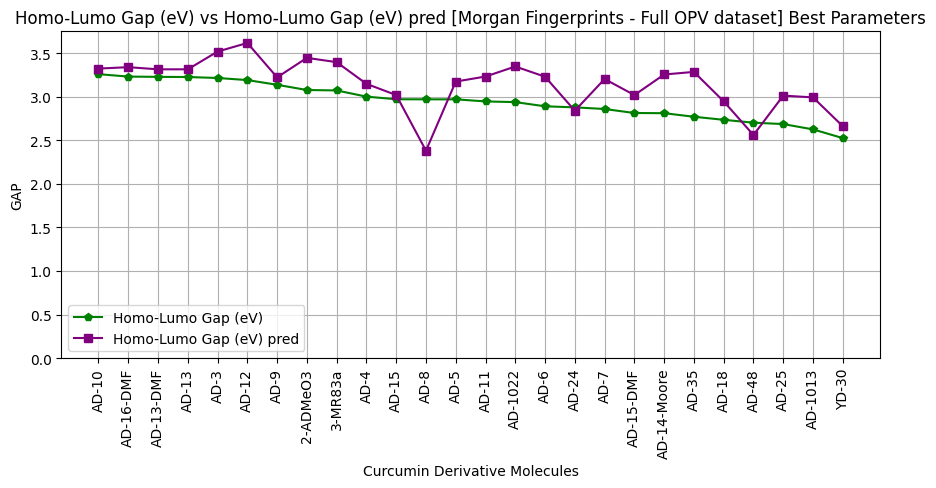

In [40]:
# predicting the Homo-Lumo Gap (eV) values for the curcumin dataset
curcumin_df_mf_pred = curcumin_df_mf.drop(curcumin_df_mf.columns[5:], axis=1)
curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'] = best_model.predict(curcumin_df_mf.iloc[:,5:])
curcumin_df_mf_pred.head()

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker= 'p', label='Homo-Lumo Gap (eV)',color = "green")
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred', color = "purple")
plt.xlabel('Curcumin Derivative Molecules')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Morgan Fingerprints - Full OPV dataset] Best Parameters')
plt.legend()
plt.ylim(0,3.75)
plt.xticks(rotation=90)
plt.show()

In [41]:
import numpy as np

# Predicted and actual Homo-Lumo Gap (eV) values
y_true = curcumin_df_mf_pred['Homo-Lumo Gap (eV)'].values
y_pred = curcumin_df_mf_pred['Homo-Lumo Gap (eV) pred'].values

# Calculate the residuals
residuals = y_true - y_pred

# Calculate SS_res and SS_tot
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_true - np.mean(y_true))**2)

# Calculate R² manually
r2_manual = 1 - (ss_tot / ss_res)

print(f'Manual R²: {r2_manual}')

Manual R²: 0.527575905154618


Mark that Visually, the model's predictions are close to the actual values and follow the overall trend or pattern of the data but the accuracy metrics like RMSE and R² are poor.

    - Possible Causes:

        - Outliers: If there are significant outliers or noise in the data, they can disproportionately affect the RMSE and R² metrics.

The high RMSE might be influenced by a few outliers or a high variance in the dataset. Similarly, the negative R² value, while indicative of poor predictive performance relative to the mean, does not fully reflect the model's ability to capture the trend. 

RMSE (lgb_model): 0.2563997084068254
R² (lgb_model): -0.5864743067996663
RMSE (best_model): 0.296165853910719
R² (best_model): -1.116742162203404


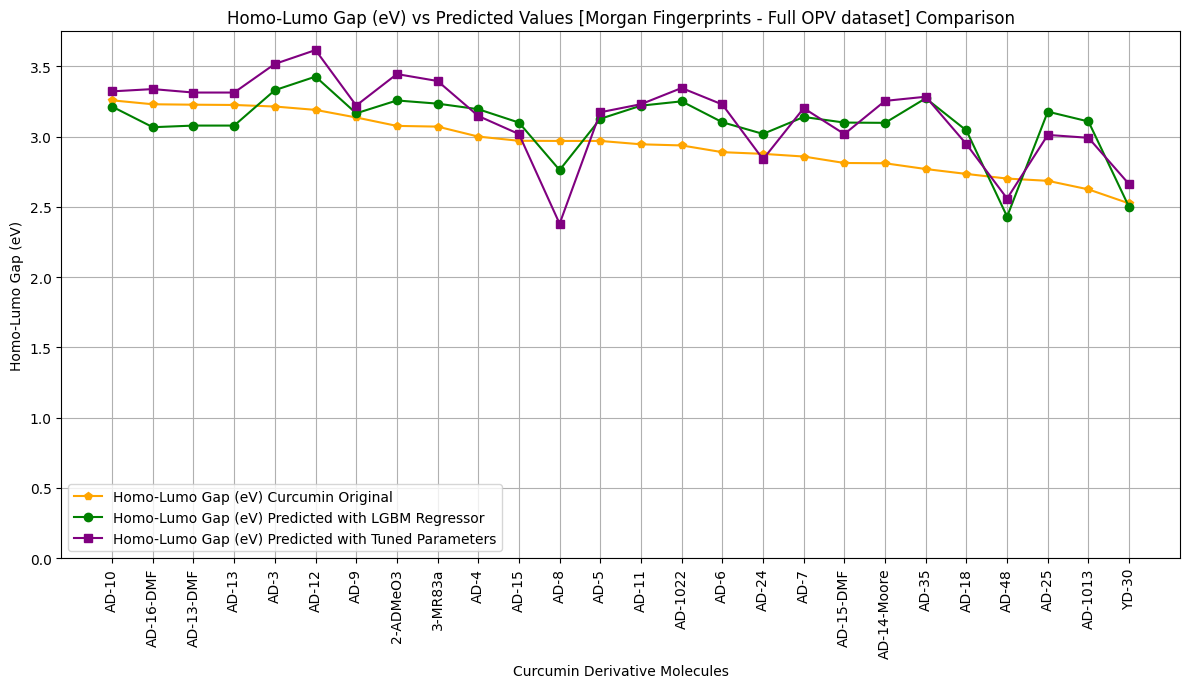

In [43]:
# Predicting the Homo-Lumo Gap (eV) values for the curcumin dataset using both models
curcumin_df_mf_pred = curcumin_df_mf.drop(curcumin_df_mf.columns[5:], axis=1)
curcumin_df_mf_pred['Homo-Lumo Gap (eV) lgb'] = lgb_model.predict(curcumin_df_mf.iloc[:, 5:])
curcumin_df_mf_pred['Homo-Lumo Gap (eV) best'] = best_model.predict(curcumin_df_mf.iloc[:, 5:])

# Calculate RMSE and R² scores for lgb_model
rmse_lgb = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) lgb'], squared=False)
r2_lgb = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) lgb'])

# Calculate RMSE and R² scores for best_model
rmse_best = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) best'], squared=False)
r2_best = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) best'])

print(f'RMSE (lgb_model): {rmse_lgb}')
print(f'R² (lgb_model): {r2_lgb}')
print(f'RMSE (best_model): {rmse_best}')
print(f'R² (best_model): {r2_best}')

# Plotting the original GAP and the predicted values from both models
plt.figure(figsize=(12, 6))

plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='p', label='Homo-Lumo Gap (eV) Curcumin Original', color="orange")
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) lgb'], marker='o', label='Homo-Lumo Gap (eV) Predicted with LGBM Regressor', color="green")
plt.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) best'], marker='s', label='Homo-Lumo Gap (eV) Predicted with Tuned Parameters', color="purple")

plt.xlabel('Curcumin Derivative Molecules')
plt.ylabel('Homo-Lumo Gap (eV)')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Predicted Values [Morgan Fingerprints - Full OPV dataset] Comparison')
plt.legend()
plt.ylim(0, 3.75)
plt.xticks(rotation=90)
plt.show()

------------------------------------------------------------------------

<span style="font-size: 25px; font-weight:medium; color:cyan;">07. Fingerprinting and Molecular Similarity to Optimize the Model</span>

   - Step 1: Generate Molecular Fingerprints, Convert the SMILES strings into molecular fingerprints using the RDKit library.
   - Step 2: Calculate the similarity between curcumin molecules and the Harvard OPV molecules using different similarity methods (Tanimoto, Dice, Cosine)
   - Step 3: Harvard OPV molecules ranked based on similarity scores and filter the top N similar molecules.,
   - Step 4: Using the filtered dataset, model trained to predict the band gap of the molecules.

<span style="font-size: 18px; font-weight:medium; color:yellow;">Four Different Similarity methods used in RDKit carried out with its unique varients of fingerprint algos and parameter tunning methods.</span>

01. Tanimoto Similarity: Measures the ratio of shared features to the total number of features.
      - 1.1 Atom Pair Fingerprints
      - 1.2 Topological Torsion Fingerprints
02. Fingerprint-Based Similarity (e.g., MACCS keys): Uses specific predefined structural keys.
      - 2.1 MACCS Keys used to generate Fingerprints
      - 2.2 RDKIT Fingerprints
      - 2.3 Morgan Fingerprints
03. Dice Similarity: Similar to Tanimoto but emphasizes shared features.
      - 3.1 MACCS Keys used to generate Fingerprints
      - 3.2 Morgan Fingerprints
      - 3.3 Atomic Pair Fingerprints
04. Cosine Similarity: Measures the cosine of the angle between two vectors.
      - 4.1 MACCS Keys used to generate Fingerprints
      - 4.2 Morgan Fingerprints
      - 4.3 Atomic Pair Fingerprints

In [44]:
from rdkit import Chem
curcumin_sim = curcumin_df_mf.iloc[:,:5]
curcumin_sim["mol"] = curcumin_sim["Smiles"].apply(Chem.MolFromSmiles)
curcumin_sim.head()

Molecule  Molecular Weight     LogP  Homo-Lumo Gap (eV)  \
0      AD-10           472.293  5.01210               3.259   
1  AD-16-DMF           377.199  4.84938               3.231   
2  AD-13-DMF           464.317  6.21190               3.228   
3      AD-13           464.317  6.21190               3.226   
4       AD-3           402.209  4.72106               3.215   

                                              Smiles  \
0  COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...   
1  N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc...   
2  C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)c...   
3  C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)c...   
4  N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+]...   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
3  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...

In [45]:
opv_df_sim = opv_df_mf.iloc[:,:3]
opv_df_sim["mol"] = opv_df_sim["smiles"].apply(Chem.MolFromSmiles)
opv_df_sim.head()

smiles  GAP_calib  GAP_calc  \
0  CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...   2.601647  3.109059   
1  CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...   2.204408  2.634680   
2  CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...   2.374851  2.825687   
3  CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...   2.887886  3.342626   
4  CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...   2.876440  3.304822   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
3  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000028FBE1...

<span style="font-size: 22px; font-weight:bold; color:pink;">Similarity Check - Analyze common substructure used to find the similarity between curcuimin varient with Harvard OPV molecules</span>

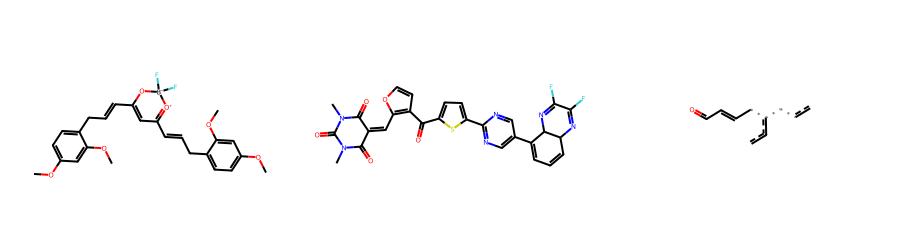

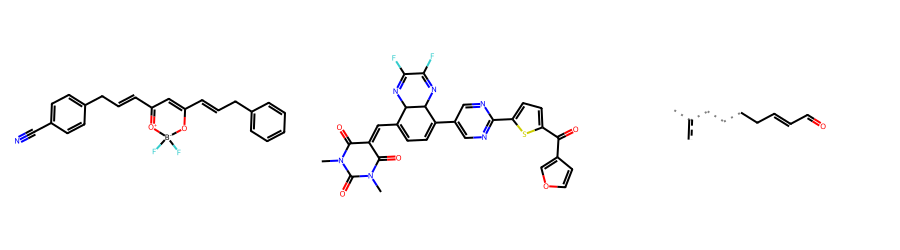

In [47]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw

# Find the maximum common substructure of the first 3 molecules in the opv_df_sim dataframe
mcs_smarts = []
for i in range(2):
    cur_mol = curcumin_sim['mol'][i]
    opv_mol = opv_df_sim['mol'][i]
    mcs = rdFMCS.FindMCS([cur_mol, opv_mol], threshold=0.8, completeRingsOnly=True, ringMatchesRingOnly=True)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
                         
# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(2):
    cur_mol = curcumin_sim['mol'][i]
    opv_mol = opv_df_sim['mol'][i]
    mcs = rdFMCS.FindMCS([cur_mol, opv_mol])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([cur_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

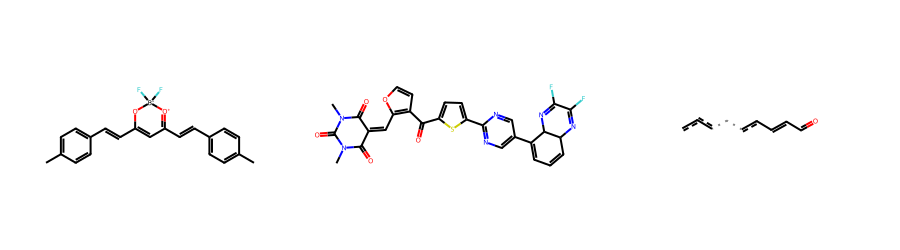

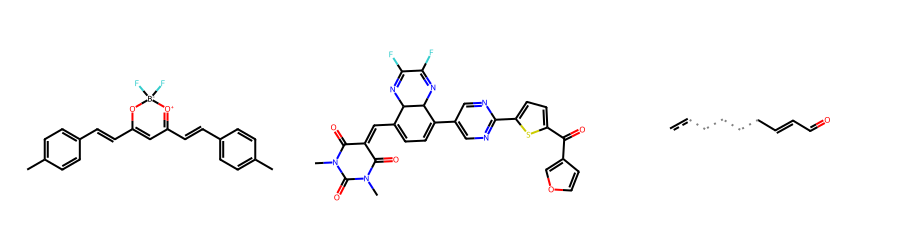

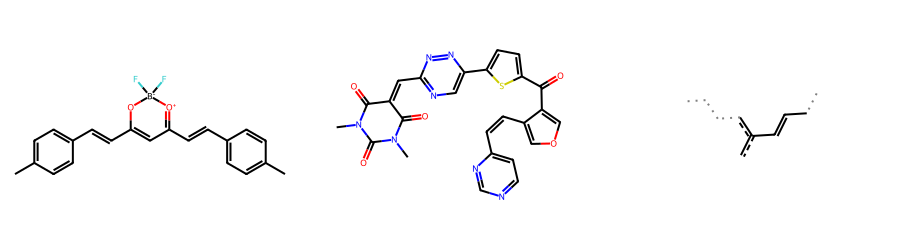

In [18]:
from rdkit import Chem      
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw

# Find the maximum common substructure of the first 3 molecules in the opv_df_sim dataframe
mcs_smarts = []
for i in range(3):
    cur_mol = Chem.MolFromSmiles('Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3')
    opv_mol = opv_df_sim['mol'][i]
    mcs = rdFMCS.FindMCS([cur_mol, opv_mol], threshold=0.8)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
                         
# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    cur_mol = Chem.MolFromSmiles('Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3')
    opv_mol = opv_df_sim['mol'][i]
    mcs = rdFMCS.FindMCS([cur_mol, opv_mol])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([cur_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 22px; font-weight:bold; color:pink;">I. Tanimoto Similarity: Measures the ratio of shared features to the total number of features.</span>

<span style="font-size: 18px; font-weight:medium; color:orange;">(1.1). Atomic Pair - Tanimoto Similarity on Harvard OPV dataset</span>

- <span style="font-size: 15px; font-weight:medium; color:yellow;">Consider all Curcumin derivatives synthesized to find common structures and similarity of atomic pairs in Harvard OPV molecules</span>

In [19]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors

# Compute atom pair fingerprints for each molecule
curcumin_sim['fp'] = curcumin_sim['mol'].apply(rdMolDescriptors.GetAtomPairFingerprint)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(rdMolDescriptors.GetAtomPairFingerprint)

# Calculate Tanimoto similarity between each molecule in opv_df_sim and all molecules in curcumin_sim
def calculate_max_similarity(mol_fp, curcumin_fps):
    similarities = [DataStructs.TanimotoSimilarity(mol_fp, cur_fp) for cur_fp in curcumin_fps]
    return max(similarities) # Return the maximum similarity score from the list

curcumin_fps = curcumin_sim['fp'].tolist()
opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_max_similarity(x, curcumin_fps))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_atom_all = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True,inplace=False)
opv_df_sim_atom_all[['smiles', 'similarity']].head()

CPU times: total: 11.1 s
Wall time: 11.4 s


smiles  similarity
0  CN1C(=Cc2ncc(C(=O)c3cnc(C=C4N(C)c5ccccc5C4(C)C...    0.427264
1  CN1C(=Cc2cnc(C(=O)c3ncc(C=C4N(C)c5ccccc5C4(C)C...    0.422060
2  CN1C(=Cc2ccnc(-c3ccnc(-c4nccc(C=C5N(C)c6ccccc6...    0.404394
3  CN1C(=Cc2nccc(-c3ccnc(-c4ccnc(C=C5N(C)c6ccccc6...    0.404394
4  CN1C(=Cc2cnc(C(=O)c3ncc(C=C4N(C)c5ccccc5C4(C)C...    0.404140

- <span style="font-size: 15px; font-weight:medium; color:yellow;">Generate common structure by considering all Curcumin derivatives synthesized and run atomic pair similarity by using generated molecule</span>

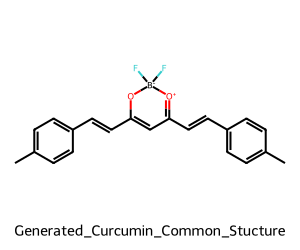

CPU times: total: 391 ms
Wall time: 397 ms


smiles  similarity  \
0         C(=Cc1ccnc(-c2ccc3ncoc3c2)n1)c1ccc2ncoc2c1    0.315789   
1            C(=Cc1ccncn1)c1ccc2nc(C=Cc3ccncn3)oc2c1    0.307531   
2        O=C(c1ccc(C=Cc2ccncn2)s1)c1cocc1C=Cc1ccncn1    0.301852   
3      c1nc2ccc(-c3ccc4nc(-c5ccc6ncoc6c5)oc4c3)cc2o1    0.300000   
4        O=C(c1ccc(C=Cc2ccncn2)s1)c1ccoc1C=Cc1ccncn1    0.299445   
5  C(c1ccc2ncoc2c1)=c1ccc(=c2ccc(=Cc3ccc4ncoc4c3)...    0.285956   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000254E5F...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000254B1E...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000025536C...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000254B1E...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000254B1E...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000254B1E...

In [20]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = rdMolDescriptors.GetAtomPairFingerprint(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:5] # remove the similarity column if it exists

# Calculate Tanimoto similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.TanimotoSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_atomTani = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_atomTani[['smiles', 'similarity','mol']].head(6)

In [59]:
opv_df_sim_atomTani.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_atomTani.csv")

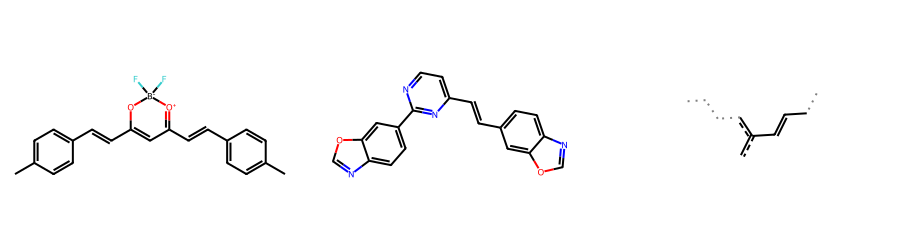

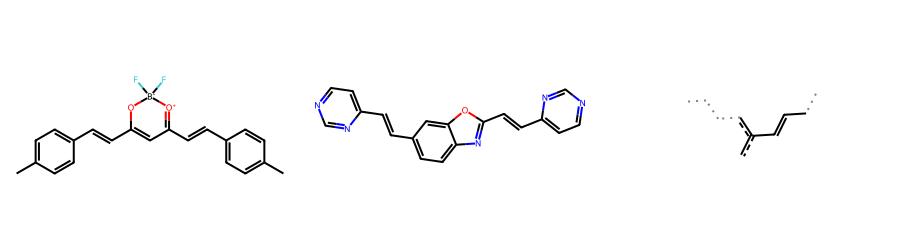

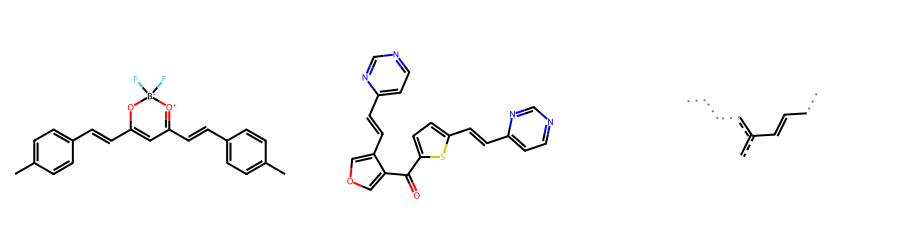

In [21]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_atomTani dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_atomTani['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_atomTani['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(1.2). Topological Torsion Fingerprint - Tanimoto Similarity on Harvard OPV dataset</span>

- <span style="font-size: 15px; font-weight:medium; color:yellow;">Generate common structure by considering all Curcumin derivatives synthesized run atomic pair similarity</span>

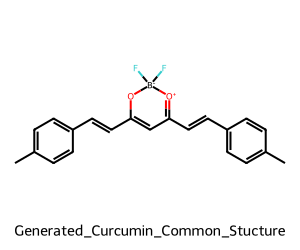

CPU times: total: 20.3 s
Wall time: 21.3 s


smiles  similarity  \
0                      N#Cc1ccc(C=Cc2ccc(C#N)cc2)cc1    0.403846   
1                O=C(O)c1ccc(C=Cc2ccc(C(=O)O)cc2)cc1    0.375000   
2  Nc1ccc(C=Cc2ccnc(C(=O)c3nccc(C=Cc4ccc(N)cc4)n3...    0.307692   
3  N#Cc1ccc(C=C(C(=O)C(=Cc2ccc(C#N)cc2)c2ccc(C#N)...    0.288889   
4  N#CC(C#N)=C1C=C(c2nccc(C=Cc3ccc(N)cc3)n2)OC(c2...    0.284211   
5  Nc1ccc(C=Cc2ccnc(-c3ccnc(-c4nccc(C=Cc5ccc(N)cc...    0.272727   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000255C05...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000255C05...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000255C16...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000255C05...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000255C16...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000255C16...

In [22]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = rdMolDescriptors.GetTopologicalTorsionFingerprint(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute atom pair fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(rdMolDescriptors.GetTopologicalTorsionFingerprint)

# Calculate Tanimoto similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.TanimotoSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_topTani = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_topTani[['smiles', 'similarity','mol']].head(6)

In [ ]:
opv_df_sim_topTani.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_topTani.csv")

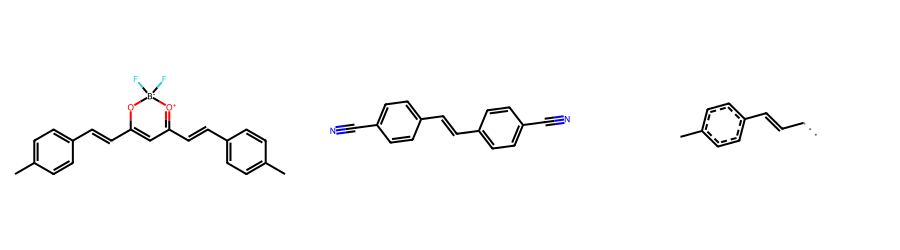

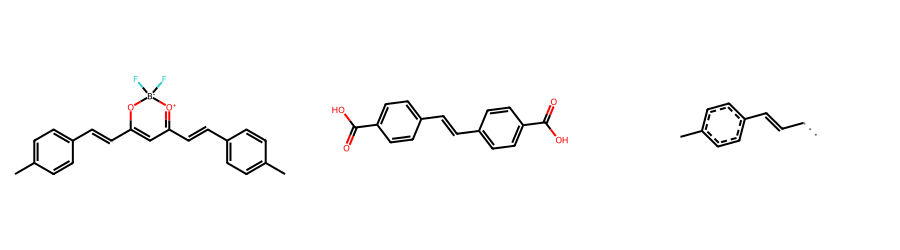

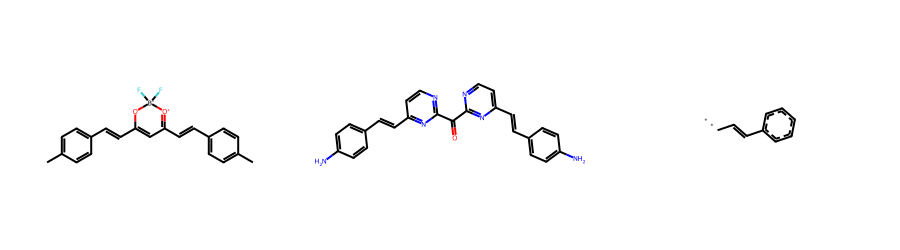

In [23]:
# find common substructure between the specific molecule and the top 3 molecules of the opv_df_sim_topTani dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_topTani['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=True, ringMatchesRingOnly=True)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the common substructure between the specific molecule and the top 3 molecules of the opv_df_sim_topTani dataframe
for i in range(3):
    opv_mol = opv_df_sim_topTani['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 22px; font-weight:bold; color:pink;">II. Fingerprint-Based Similarity (e.g., MACCS keys): Uses specific predefined structural keys</span>

    - 1.1 MACCS Keys
    - 1.2 RDKIT Fingerprints
    - 1.2 Morgan Fingerprints

 - Tanimoto Similarity used as the base similarity function and change the circular and functional fingerprints to alter the molecular structural considerations

<span style="font-size: 18px; font-weight:medium; color:orange;">(2.1). MACCS Keys - Tanimoto Similarity on Harvard OPV dataset</span>

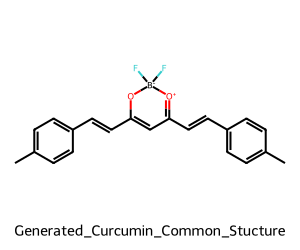

CPU times: total: 1min 56s
Wall time: 2min 1s


smiles  similarity  \
0  O=C(c1ccc(C(=Cc2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F)...    0.512195   
1  O=C(c1ccc(C(F)(F)F)s1)c1cocc1C(=Cc1c(F)c(F)c(F...    0.512195   
2  O=C(c1ccoc1)c1ccc(-c2ccc(C(=C(c3ccccc3)c3ccc(C...    0.500000   
3  N#CC(C#N)=C1C=C(C(=O)C2=CC(=C(C#N)C#N)C=C(C(F)...    0.500000   
4  N#CC(C#N)=C1C=C(c2c(F)c(F)c(C3=CC(=C(C#N)C#N)C...    0.487805   
5  O=C(O)c1cnoc1-c1ccc(C(=C(c2ccccc2)c2ccc(C(F)(F...    0.479167   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000025660E...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000025660E...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000025660E...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000256224...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000256224...  
5  <rdkit.Chem.rdchem.Mol object at 0x0000025660E...

In [24]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw
from rdkit.Chem import MACCSkeys

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = MACCSkeys.GenMACCSKeys(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute MACCS keys fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(MACCSkeys.GenMACCSKeys)

# Calculate Tanimoto similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.TanimotoSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Tanimaccs = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Tanimaccs[['smiles', 'similarity','mol']].head(6)


In [66]:
opv_df_sim_Tanimaccs.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Tanimaccs.csv")

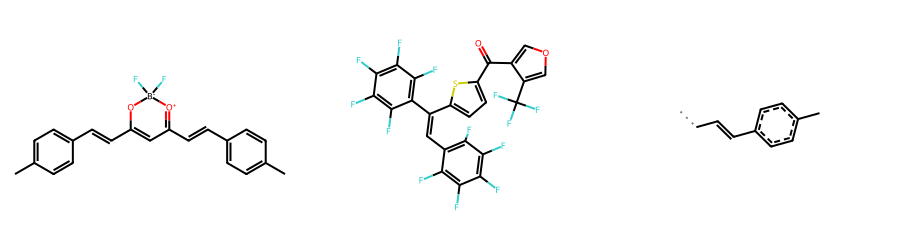

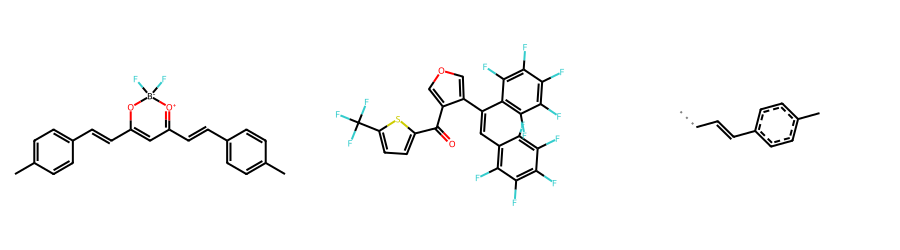

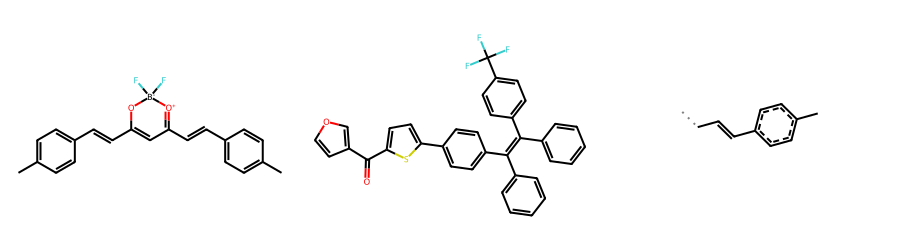

In [25]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Tanimaccs dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Tanimaccs['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Tanimaccs['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(2.2). RDKit Fingerprints - Tanimoto Similarity on Harvard OPV dataset</span>

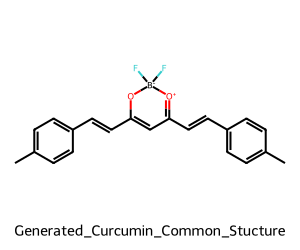

CPU times: total: 40.9 s
Wall time: 41.7 s


smiles  similarity  \
0  N#Cc1ccc(C(C(=O)O)=C(C(=O)C(=C(C(=O)O)c2ccc(C#...    0.310526   
1  N#CC(=C(C(=O)C(=C(C#N)c1ccc(C#N)cc1)c1ccc(C#N)...    0.298103   
2  N#CC(C#N)=C1C=C(C(=Cc2ccc(C#N)cc2)c2ccc(C#N)cc...    0.296569   
3  N#CC(C#N)=C1C=C(C(=O)C2=CC(=C(C#N)C#N)C=C(c3cc...    0.294537   
4  N#Cc1ccc(C=C(C(=O)C(=Cc2ccc(C#N)cc2)c2ccc(C#N)...    0.294294   
5  N#CC(C#N)=C1C=COC(C(=C(C2=CC(=C(C#N)C#N)C=CO2)...    0.288462   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x000002567D1...  
1  <rdkit.Chem.rdchem.Mol object at 0x000002567D1...  
2  <rdkit.Chem.rdchem.Mol object at 0x000002567C0...  
3  <rdkit.Chem.rdchem.Mol object at 0x000002567C1...  
4  <rdkit.Chem.rdchem.Mol object at 0x000002567C0...  
5  <rdkit.Chem.rdchem.Mol object at 0x000002567C0...

In [26]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw, rdFingerprintGenerator

# Define generator for RDKit fingerprints
generator = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = generator.GetFingerprint(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute RDKit fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(generator.GetFingerprint)

# Calculate Tanimoto similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.TanimotoSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Tanirdfp = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Tanirdfp[['smiles', 'similarity','mol']].head(6)

In [84]:
opv_df_sim_Tanirdfp.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Tanirdrfp.csv")

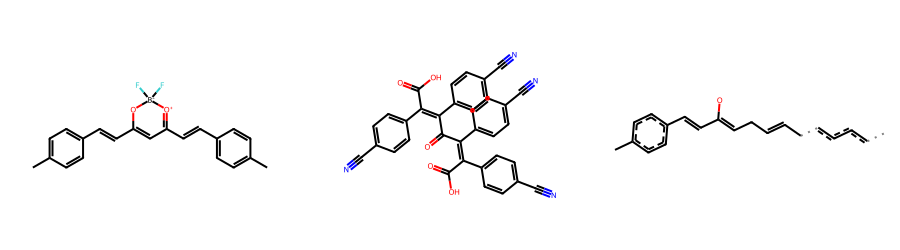

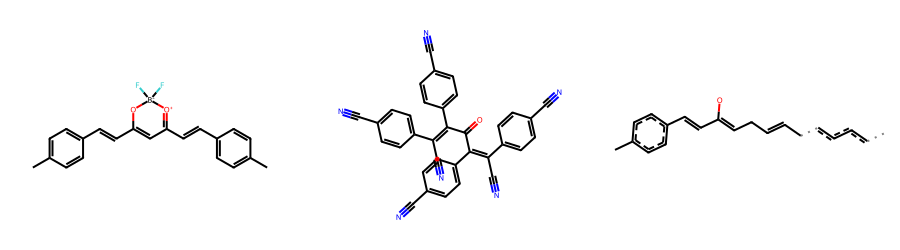

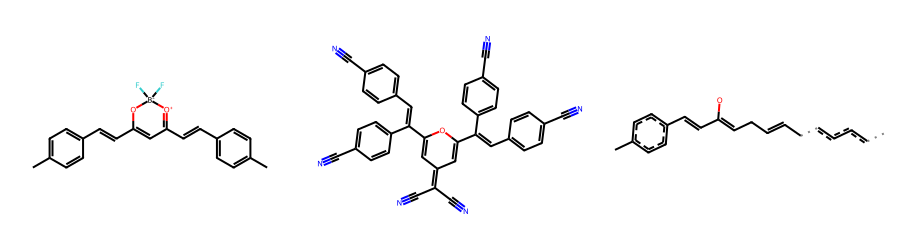

In [27]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Tanirdfp dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Tanirdfp['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Tanirdfp['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(2.3). Morgan Fingerprints - Tanimoto Similarity on Harvard OPV dataset</span>

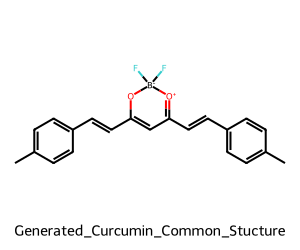

CPU times: total: 16.1 s
Wall time: 18.9 s


smiles  similarity  \
0                      N#Cc1ccc(C=Cc2ccc(C#N)cc2)cc1    0.369565   
1                O=C(O)c1ccc(C=Cc2ccc(C(=O)O)cc2)cc1    0.354167   
2  Nc1ccc(C=Cc2ccnc(C(=O)c3nccc(C=Cc4ccc(N)cc4)n3...    0.325397   
3  Cc1nc2c(-c3nccc(C=Cc4ccc(N)cc4)n3)sc(-c3nccc(C...    0.304054   
4  Nc1ccc(C=Cc2ccnc(-c3c(F)c(F)c(-c4nccc(C=Cc5ccc...    0.296552   
5  Nc1ccc(C=Cc2ccnc(-c3noc(-c4nccc(C=Cc5ccc(N)cc5...    0.295775   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000256D6C...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000256D6C...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000256D6D...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000256D6E...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000256D7E...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000256D6E...

In [28]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = rdMolDescriptors.GetMorganFingerprint(specific_mol, 2)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute Morgan fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(lambda x: rdMolDescriptors.GetMorganFingerprint(x, 2))

# Calculate Tanimoto similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.TanimotoSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Tanimorgan = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Tanimorgan[['smiles', 'similarity','mol']].head(6)

In [85]:
opv_df_sim_Tanimorgan.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Tanimorgan.csv")

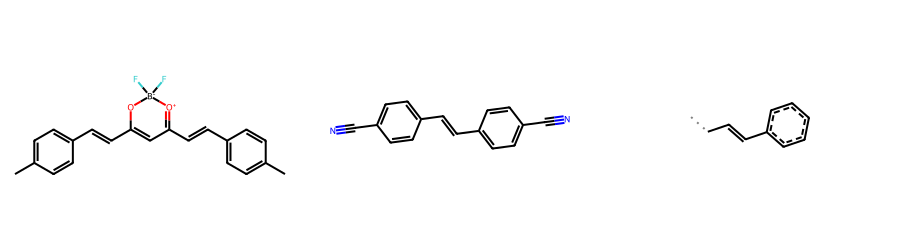

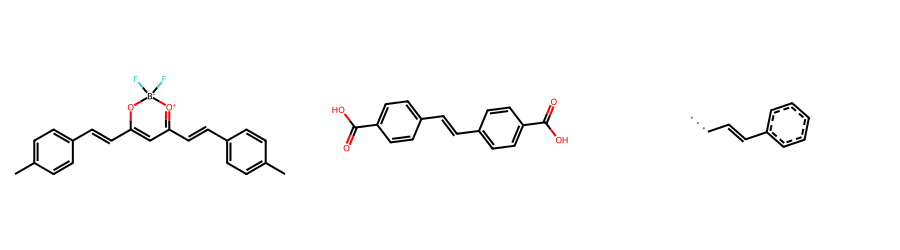

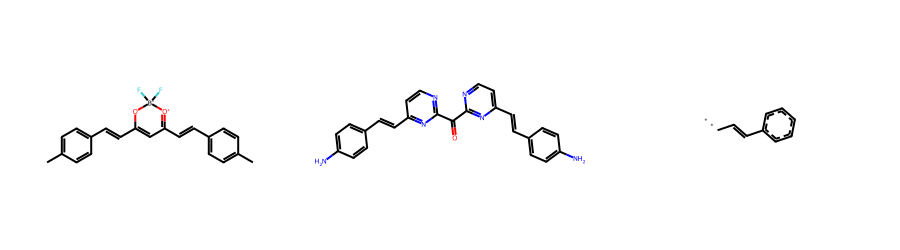

In [29]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Tanimorgan dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Tanimorgan['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Tanimorgan['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 22px; font-weight:bold; color:pink;">III. Dice Similarity: Similar to Tanimoto but emphasizes shared features.</span>

   - Similarity algorithm changed to focus on feature and SparseBits generated more biased to functional features to feed fingerprinnts to the algo.
      - MACCS Keys used to generate Fingerprints
      - Morgan Fingerprints
      - Atomic Pair Fingerprints

<span style="font-size: 18px; font-weight:medium; color:orange;">(3.1). MACCS Keys - Dice Similarity on Harvard OPV dataset</span>

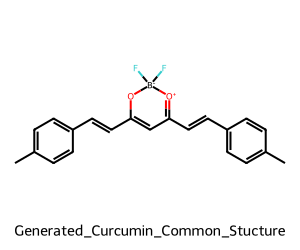

CPU times: total: 1min 32s
Wall time: 1min 33s


smiles  similarity  \
0  O=C(c1ccc(C(=Cc2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F)...    0.677419   
1  O=C(c1ccc(C(F)(F)F)s1)c1cocc1C(=Cc1c(F)c(F)c(F...    0.677419   
2  O=C(c1ccoc1)c1ccc(-c2ccc(C(=C(c3ccccc3)c3ccc(C...    0.666667   
3  N#CC(C#N)=C1C=C(C(=O)C2=CC(=C(C#N)C#N)C=C(C(F)...    0.666667   
4  N#CC(C#N)=C1C=C(c2c(F)c(F)c(C3=CC(=C(C#N)C#N)C...    0.655738   
5  O=C(O)c1cnoc1-c1ccc(C(=C(c2ccccc2)c2ccc(C(F)(F...    0.647887   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000257841...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000257841...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000257763...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000257399...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000257398...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000257763...

In [30]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = MACCSkeys.GenMACCSKeys(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute MACCS keys fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(MACCSkeys.GenMACCSKeys)

# Calculate Dice similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.DiceSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Dicemaccs = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Dicemaccs[['smiles', 'similarity','mol']].head(6)

In [86]:
opv_df_sim_Dicemaccs.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Dicemaccs.csv")

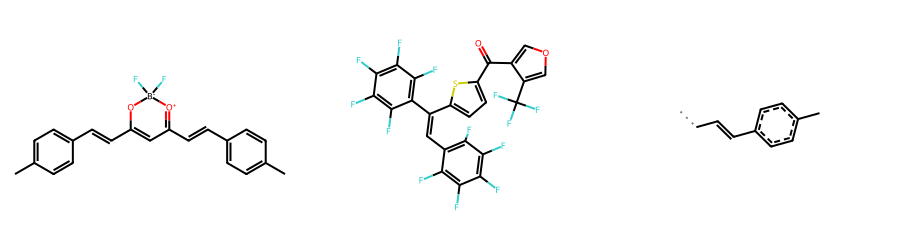

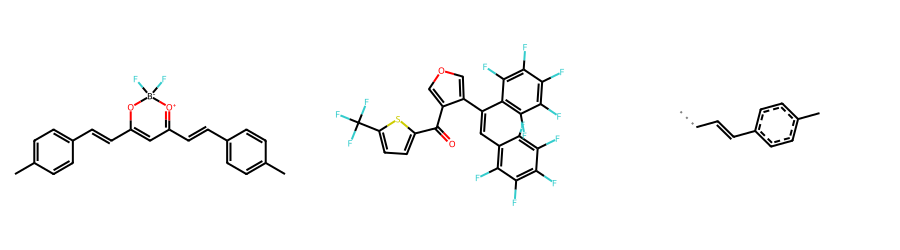

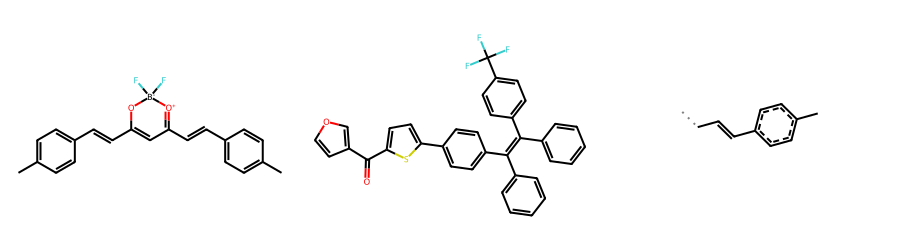

In [31]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Dicemaccs dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Dicemaccs['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Dicemaccs['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(3.2). Morgan Fingerprints - Dice Similarity on Harvard OPV dataset</span>

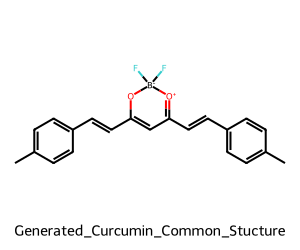

CPU times: total: 15.6 s
Wall time: 16 s


smiles  similarity  \
0                      N#Cc1ccc(C=Cc2ccc(C#N)cc2)cc1    0.539683   
1                O=C(O)c1ccc(C=Cc2ccc(C(=O)O)cc2)cc1    0.523077   
2  Nc1ccc(C=Cc2ccnc(C(=O)c3nccc(C=Cc4ccc(N)cc4)n3...    0.491018   
3  Cc1nc2c(-c3nccc(C=Cc4ccc(N)cc4)n3)sc(-c3nccc(C...    0.466321   
4  Nc1ccc(C=Cc2ccnc(-c3c(F)c(F)c(-c4nccc(C=Cc5ccc...    0.457447   
5  Nc1ccc(C=Cc2ccnc(-c3noc(-c4nccc(C=Cc5ccc(N)cc5...    0.456522   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000257934...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000257934...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000257945...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000257946...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000257946...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000257945...

In [32]:
%%time

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = AllChem.GetMorganFingerprint(specific_mol, 2)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute Morgan fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(lambda x: AllChem.GetMorganFingerprint(x, 2))

# Calculate Dice similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.DiceSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Dicemorgan = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Dicemorgan[['smiles', 'similarity','mol']].head(6)

In [88]:
opv_df_sim_Dicemorgan.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Dicemorgan.csv")

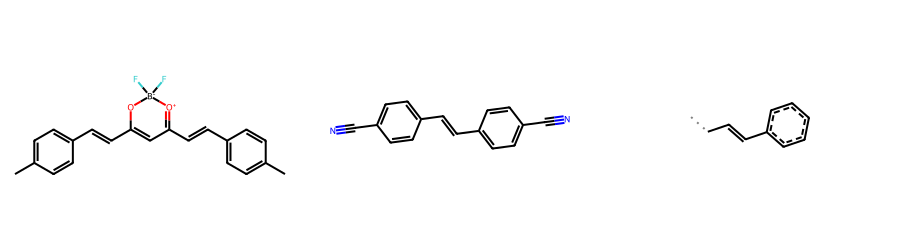

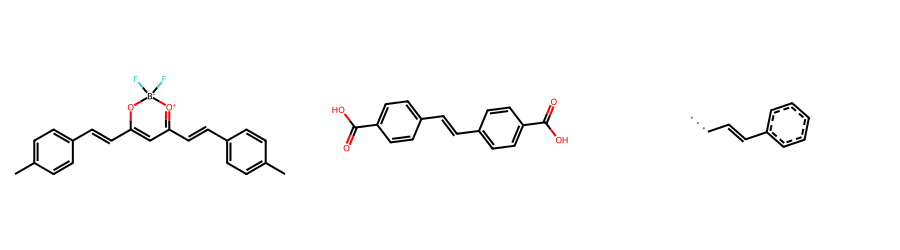

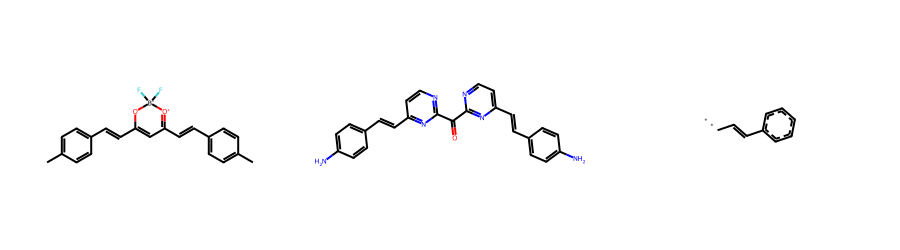

In [33]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Dicemorgan dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Dicemorgan['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Dicemorgan['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(3.3). Atomic Pair Fingerprints - Dice Similarity on Harvard OPV dataset</span>

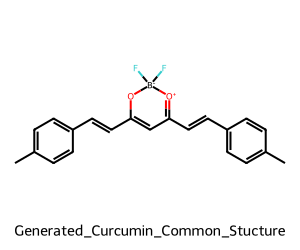

CPU times: total: 17.1 s
Wall time: 18.1 s


smiles  similarity  \
0         C(=Cc1ccnc(-c2ccc3ncoc3c2)n1)c1ccc2ncoc2c1    0.480000   
1            C(=Cc1ccncn1)c1ccc2nc(C=Cc3ccncn3)oc2c1    0.470400   
2        O=C(c1ccc(C=Cc2ccncn2)s1)c1cocc1C=Cc1ccncn1    0.463727   
3      c1nc2ccc(-c3ccc4nc(-c5ccc6ncoc6c5)oc4c3)cc2o1    0.461538   
4        O=C(c1ccc(C=Cc2ccncn2)s1)c1ccoc1C=Cc1ccncn1    0.460882   
5  C(c1ccc2ncoc2c1)=c1ccc(=c2ccc(=Cc3ccc4ncoc4c3)...    0.444737   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000257F50...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000257F50...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000257F62...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000257F50...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000257F50...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000257F50...

In [34]:
%%time

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = rdMolDescriptors.GetAtomPairFingerprint(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute Atom Pair fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(rdMolDescriptors.GetAtomPairFingerprint)

# Calculate Dice similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.DiceSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Diceatom = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Diceatom[['smiles', 'similarity','mol']].head(6)

In [89]:
opv_df_sim_Diceatom.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Diceatom.csv")

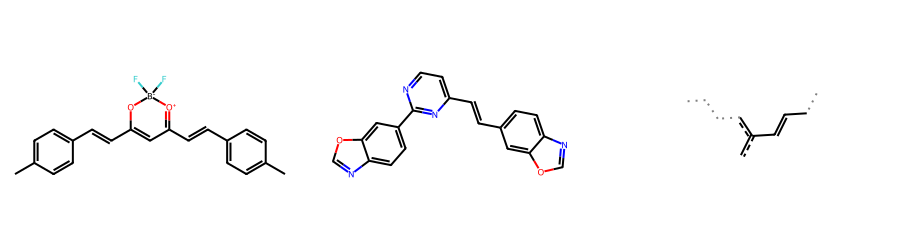

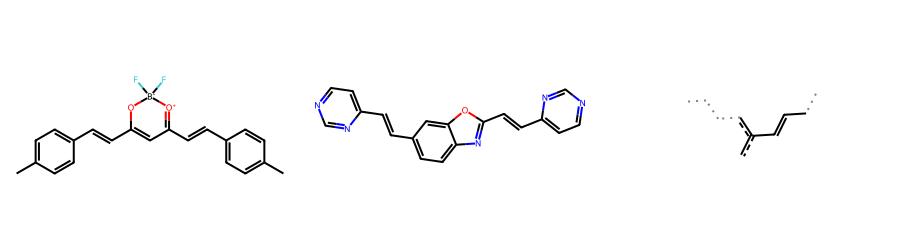

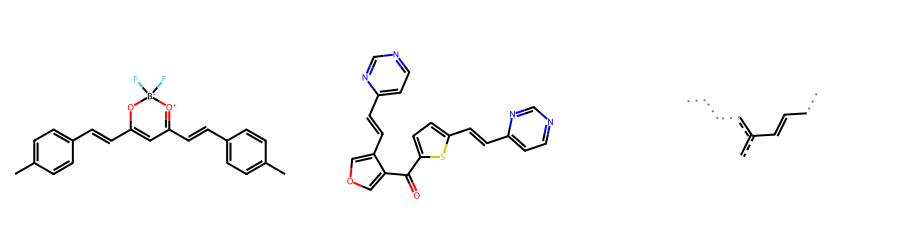

In [35]:
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Diceatom['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Diceatom['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 22px; font-weight:bold; color:pink;">IV. Cosine Similarity: Measures the cosine of the angle between two vectors.</span>

- MACCS Keys used to generate Fingerprints
- Morgan Fingerprints
- Atomic Pair Fingerprints

Since MACCS keys readily supports better than other algos to detect similarity between molecules, for the cosine similarity MACCS keys used to generate data first. To generate comparable results on cosine, morgan and atom pair taken to the account.

<span style="font-size: 18px; font-weight:medium; color:orange;">(4.1). MACCS Keys - Cosine Similarity on Harvard OPV dataset</span>

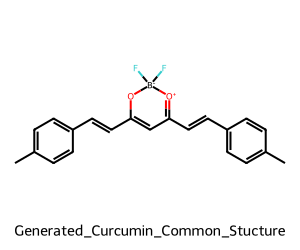

CPU times: total: 1min 34s
Wall time: 1min 39s


smiles  similarity  \
0  O=C(c1ccc(C(F)(F)F)s1)c1cocc1C(=Cc1c(F)c(F)c(F...    0.678834   
1  O=C(c1ccc(C(=Cc2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F)...    0.678834   
2  N#CC(C#N)=C1C=C(C(=O)C2=CC(=C(C#N)C#N)C=C(C(F)...    0.670025   
3  O=C(c1ccoc1)c1ccc(-c2ccc(C(=C(c3ccccc3)c3ccc(C...    0.670025   
4  N#CC(C#N)=C1C=C(c2c(F)c(F)c(C3=CC(=C(C#N)C#N)C...    0.657952   
5  O=C(O)c1cnoc1-c1ccc(C(=C(c2ccccc2)c2ccc(C(F)(F...    0.649500   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000258EE6...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000258EE6...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000258A6D...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000258DF8...  
4  <rdkit.Chem.rdchem.Mol object at 0x00000258A6D...  
5  <rdkit.Chem.rdchem.Mol object at 0x00000258DF8...

In [36]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw
from rdkit.Chem import MACCSkeys

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = MACCSkeys.GenMACCSKeys(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute MACCS keys fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(MACCSkeys.GenMACCSKeys)

# Calculate Cosine similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.CosineSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Cosmaccs = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Cosmaccs[['smiles', 'similarity','mol']].head(6)

In [90]:
opv_df_sim_Cosmaccs.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Cosmaccs.csv")

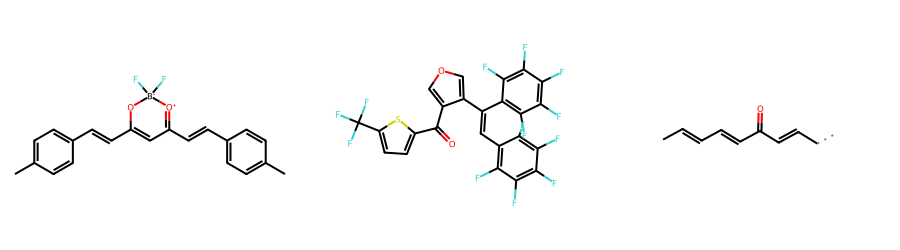

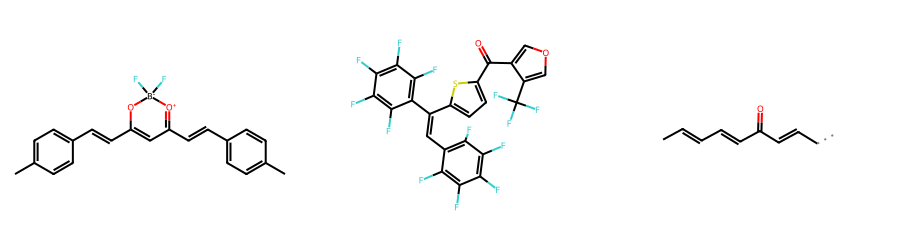

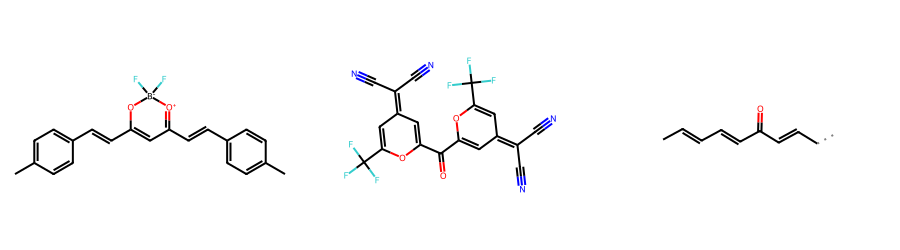

In [37]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Cosmaccs dataframe
mcs_smarts = []
for i in range(3):
    opv_mol = opv_df_sim_Cosmaccs['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_smarts.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Cosmaccs['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(4.2). Morgan Fingerprints - Cosine Similarity on Harvard OPV dataset</span>

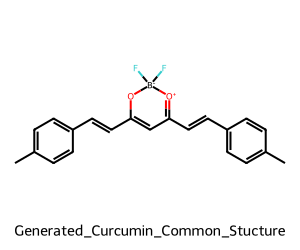

CPU times: total: 14.2 s
Wall time: 14.5 s


smiles  similarity  \
0                      N#Cc1ccc(C=Cc2ccc(C#N)cc2)cc1    0.385872   
1                O=C(O)c1ccc(C=Cc2ccc(C(=O)O)cc2)cc1    0.375000   
2  Nc1ccc(C=Cc2ccnc(-c3c(F)c(F)c(-c4nccc(C=Cc5ccc...    0.338502   
3  Cc1oc(=O)c2ccccc2c1-c1nccc(C=Cc2ccc(C(=C(c3ccc...    0.335212   
4  C[Si]1(C)C(c2nccc(C=Cc3ccc(N)cc3)n2)=C2OCCOC2=...    0.327327   
5  Cc1nc2c(-c3nccc(C=Cc4ccc(N)cc4)n3)sc(-c3nccc(C...    0.315447   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x00000259009...  
1  <rdkit.Chem.rdchem.Mol object at 0x00000259009...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000025900B...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000259375...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000025900A...  
5  <rdkit.Chem.rdchem.Mol object at 0x0000025900A...

In [38]:
%%time

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = AllChem.GetMorganFingerprintAsBitVect(specific_mol, 2)

specific_struct = Draw.MolsToGridImage(
    [specific_mol],legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:,:3] # recreate the opv_df_sim dataframe

# Compute Morgan fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2))


# Calculate Cosine similarity between each molecule in opv_df_sim and the specific molecule
def calculate_similarity(mol_fp, specific_fp):
    return DataStructs.CosineSimilarity(mol_fp, specific_fp)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Cosmorgan = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_Cosmorgan[['smiles', 'similarity','mol']].head(6)

In [91]:
opv_df_sim_Cosmorgan.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Cosmorgan.csv")

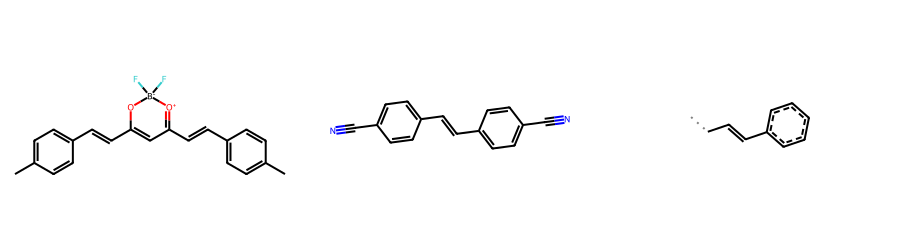

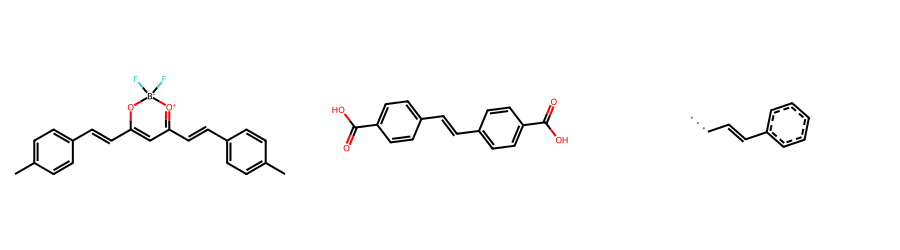

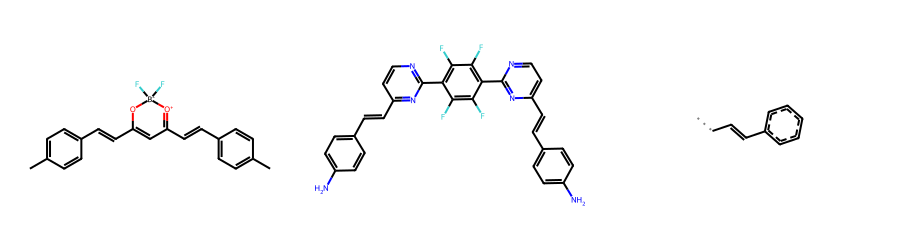

In [39]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Cosmorgan dataframe
mcs_mols = []
for i in range(3):
    opv_mol = opv_df_sim_Cosmorgan['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_mols.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Cosmorgan['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(4.3). Atomic Pair Fingerprints - Cosine Similarity on Harvard OPV dataset</span>

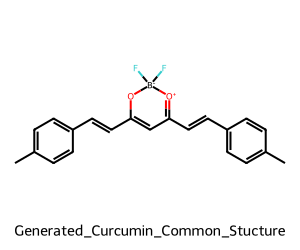

CPU times: total: 20.6 s
Wall time: 21.4 s


smiles  similarity  \
0                 C(=Cc1ccnc(C=Cc2ccncn2)n1)c1ccncn1    0.939870   
1              O=C(O)c1c(C=Cc2ccncn2)csc1C=Cc1ccncn1    0.939613   
2              C(=Cc1ccnc(-c2ccc3ncoc3c2)n1)c1ccncn1    0.932496   
3          O=C(c1ccc(-c2ccncn2)s1)c1cocc1C=Cc1ccncn1    0.931277   
4                 C(=Cc1ccncn1)c1cnc(C=Cc2ccncn2)nc1    0.931233   
5  C(=Cc1ccncn1)c1ccc2c(c1)sc1cc(C=Cc3ccncn3)cc3c...    0.931209   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x000002595B7...  
1  <rdkit.Chem.rdchem.Mol object at 0x000002595B7...  
2  <rdkit.Chem.rdchem.Mol object at 0x00000259912...  
3  <rdkit.Chem.rdchem.Mol object at 0x00000259A00...  
4  <rdkit.Chem.rdchem.Mol object at 0x000002595B6...  
5  <rdkit.Chem.rdchem.Mol object at 0x000002595B7...

In [40]:
%%time

# Specific molecule for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = rdMolDescriptors.GetAtomPairFingerprint(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol], legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

# Recreate the opv_df_sim dataframe
opv_df_sim = opv_df_sim.iloc[:, :3] 

# Compute Atom Pair fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(rdMolDescriptors.GetAtomPairFingerprint)

# Function to convert fingerprint to vector
def fingerprint_to_vector(fp, size=2048):
    vec = np.zeros(size)
    for idx, value in fp.GetNonzeroElements().items():
        vec[idx % size] += value
    return vec

# Convert specific molecule's fingerprint to vector
specific_vec = fingerprint_to_vector(specific_fp)

# Calculate Cosine similarity between each molecule in opv_df_sim and the specific molecule
from scipy.spatial.distance import cosine

def calculate_similarity(mol_fp, specific_vec):
    mol_vec = fingerprint_to_vector(mol_fp)
    return 1 - cosine(mol_vec, specific_vec)

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_similarity(x, specific_vec))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_Cosatom = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True)
opv_df_sim_Cosatom[['smiles', 'similarity', 'mol']].head(6)

In [93]:
opv_df_sim_Cosatom.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_Cosatom.csv")

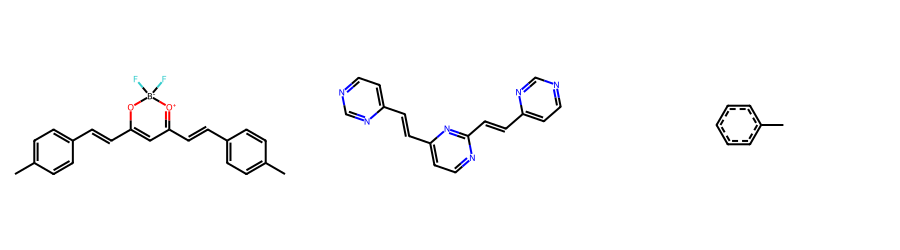

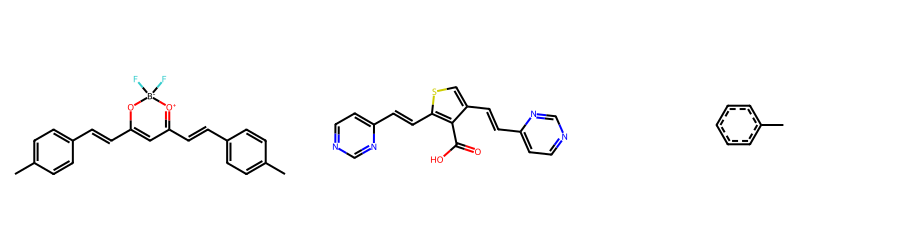

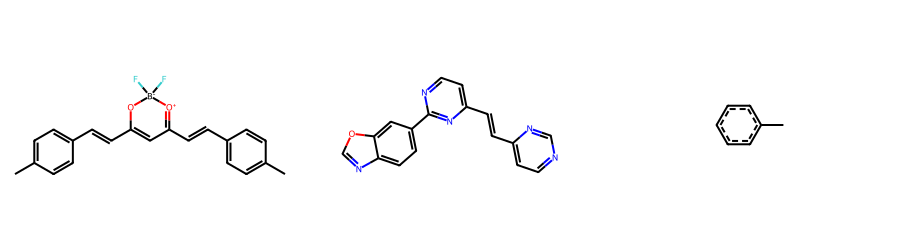

In [41]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_Cosatom dataframe
mcs_mols = []
for i in range(3):
    opv_mol = opv_df_sim_Cosatom['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_mols.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_Cosatom['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 22px; font-weight:bold; color:lightgreen;">V. Kulczynski Similarity: Evaluates the similarity between two sets by considering both the number of shared elements and the sizes of the individual sets.</span>

- MACCS Keys used to generate Fingerprints
- Morgan Fingerprints
- Atomic Pair Fingerprints

Kulczynski similarity is particularly useful when comparing binary molecular fingerprints. In this analysis, MACCS keys were used to generate fingerprints first, due to their robust performance in detecting molecular similarities. To ensure comprehensive comparison, both Morgan fingerprints and Atomic Pair fingerprints were also taken into account when evaluating Kulczynski similarity.

<span style="font-size: 18px; font-weight:medium; color:orange;">(5.1). MACCS Keys Fingerprints - Kulczynski Similarity on Harvard OPV dataset</span>

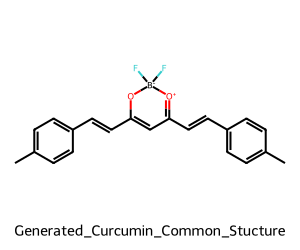

CPU times: total: 1min 33s
Wall time: 1min 35s


smiles  similarity  \
0  O=C(c1ccc(C(=Cc2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F)...    0.512195   
1  O=C(c1ccc(C(F)(F)F)s1)c1cocc1C(=Cc1c(F)c(F)c(F...    0.512195   
2  O=C(c1ccoc1)c1ccc(-c2ccc(C(=C(c3ccccc3)c3ccc(C...    0.500000   
3  N#CC(C#N)=C1C=C(C(=O)C2=CC(=C(C#N)C#N)C=C(C(F)...    0.500000   
4  N#CC(C#N)=C1C=C(c2c(F)c(F)c(C3=CC(=C(C#N)C#N)C...    0.487805   
5  O=C(O)c1cnoc1-c1ccc(C(=C(c2ccccc2)c2ccc(C(F)(F...    0.479167   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000025A710...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000025A710...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000025A622...  
3  <rdkit.Chem.rdchem.Mol object at 0x0000025A297...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000025A297...  
5  <rdkit.Chem.rdchem.Mol object at 0x0000025A622...

In [42]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, rdMolDescriptors, Draw
from rdkit.Chem import MACCSkeys

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = MACCSkeys.GenMACCSKeys(specific_mol)

specific_struct = Draw.MolsToGridImage(
    [specific_mol], legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:, :3] 

# Compute MACCS keys fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(MACCSkeys.GenMACCSKeys)

# Function to calculate Kulczynski similarity
def calculate_kulczynski_similarity(fp1, fp2):
    intersection = DataStructs.FingerprintSimilarity(fp1, fp2, metric=DataStructs.TanimotoSimilarity)
    return 0.5 * ((intersection / DataStructs.FingerprintSimilarity(fp1, fp1)) + 
                  (intersection / DataStructs.FingerprintSimilarity(fp2, fp2)))

# Calculate Kulczynski similarity between each molecule in opv_df_sim and the specific molecule
opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_kulczynski_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_kulczynski_maccs = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)

# Display the top 6 similar molecules along with their SMILES and similarity scores
opv_df_sim_kulczynski_maccs[['smiles', 'similarity', 'mol']].head(6)

In [60]:
opv_df_sim_kulczynski_maccs.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_kulczynski_maccs.csv")

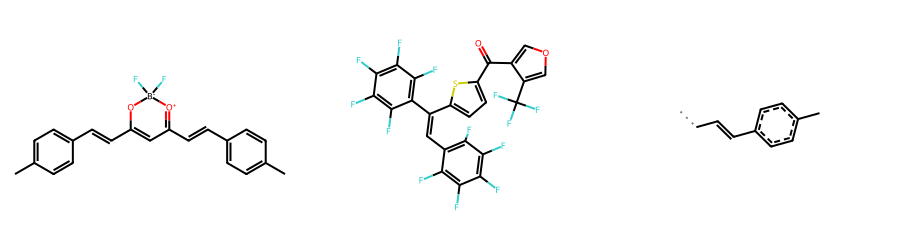

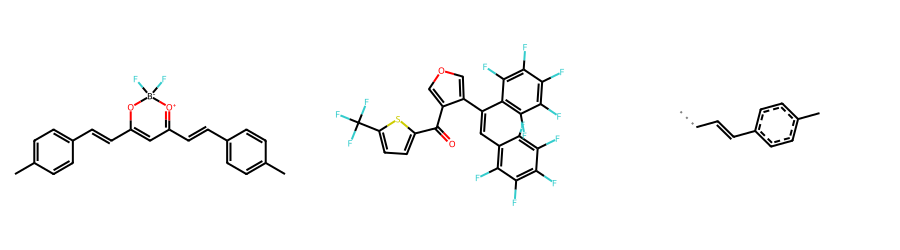

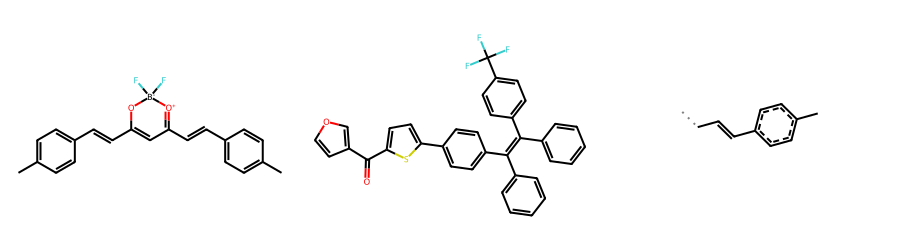

In [43]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_kulczynski_maccs dataframe
mcs_mols = []
for i in range(3):
    opv_mol = opv_df_sim_kulczynski_maccs['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_mols.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_kulczynski_maccs['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(5.2). Morgan Fingerprints - Kulczynski Similarity on Harvard OPV dataset</span>

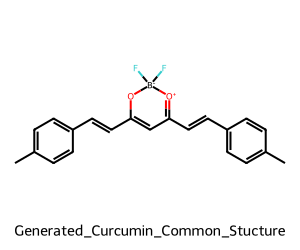

CPU times: total: 14.5 s
Wall time: 15 s


smiles  similarity  \
0                      N#Cc1ccc(C=Cc2ccc(C#N)cc2)cc1    0.225000   
1                O=C(O)c1ccc(C=Cc2ccc(C(=O)O)cc2)cc1    0.219512   
2  Nc1ccc(C=Cc2ccnc(-c3c(F)c(F)c(-c4nccc(C=Cc5ccc...    0.203704   
3  Cc1oc(=O)c2ccccc2c1-c1nccc(C=Cc2ccc(C(=C(c3ccc...    0.196970   
4  C[Si]1(C)C(c2nccc(C=Cc3ccc(N)cc3)n2)=C2OCCOC2=...    0.193548   
5  Cc1nc2c(-c3nccc(C=Cc4ccc(N)cc4)n3)sc(-c3nccc(C...    0.186441   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000025A833...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000025A833...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000025A843...  
3  <rdkit.Chem.rdchem.Mol object at 0x0000025ABAE...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000025A844...  
5  <rdkit.Chem.rdchem.Mol object at 0x0000025A844...

In [44]:
%%time

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = AllChem.GetMorganFingerprintAsBitVect(specific_mol, 2)  # Changed to bit vector

specific_struct = Draw.MolsToGridImage(
    [specific_mol], legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

opv_df_sim = opv_df_sim.iloc[:, :3]  # recreate the opv_df_sim dataframe

# Compute Morgan fingerprints as bit vectors for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2))  # Changed to bit vector

# Calculate Kulczynski similarity between each molecule in opv_df_sim and the specific molecule using Tanimoto similarity
def calculate_kulczynski_similarity(fp1, fp2):
    intersection = DataStructs.FingerprintSimilarity(fp1, fp2, metric=DataStructs.TanimotoSimilarity)
    return 0.5 * ((intersection / DataStructs.FingerprintSimilarity(fp1, fp1)) + 
                  (intersection / DataStructs.FingerprintSimilarity(fp2, fp2)))

opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_kulczynski_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_kulczynski_morgan = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_kulczynski_morgan[['smiles', 'similarity', 'mol']].head(6)

In [61]:
opv_df_sim_kulczynski_morgan.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_kulczynski_morgan.csv")

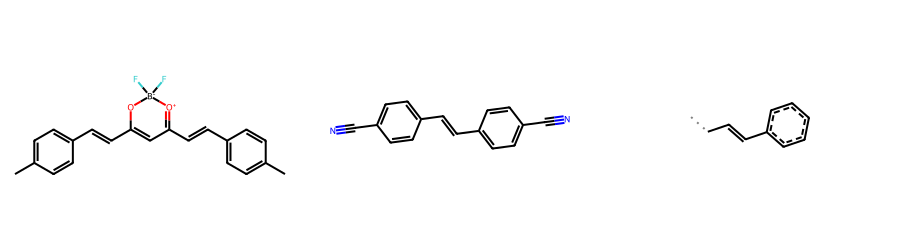

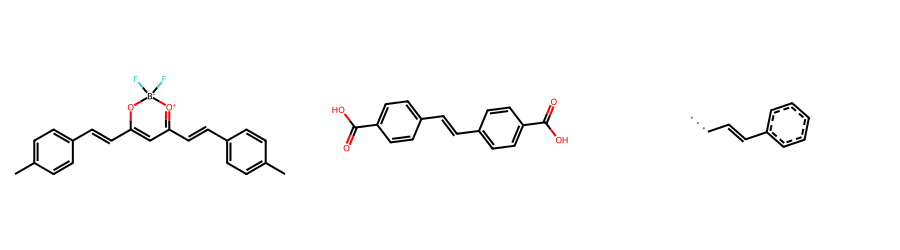

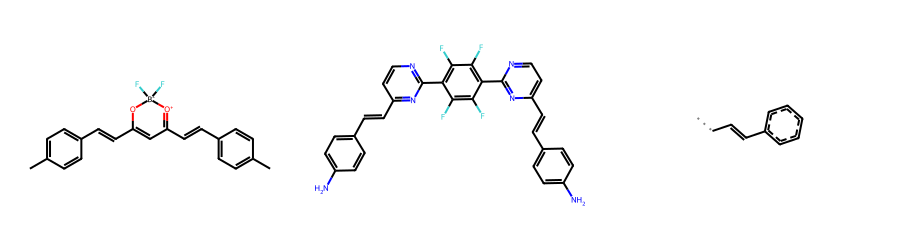

In [45]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_kulczynski_morgan dataframe
mcs_mols = []
for i in range(3):
    opv_mol = opv_df_sim_kulczynski_morgan['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_mols.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_kulczynski_morgan['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 18px; font-weight:medium; color:orange;">(5.1). Atom Pair Fingerprints - Kulczynski Similarity on Harvard OPV dataset</span>

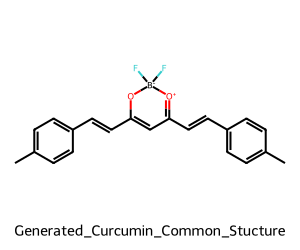

CPU times: total: 19.7 s
Wall time: 20.2 s


smiles  similarity  \
0         C(=Cc1ccnc(-c2ccc3ncoc3c2)n1)c1ccc2ncoc2c1    0.480000   
1            C(=Cc1ccncn1)c1ccc2nc(C=Cc3ccncn3)oc2c1    0.471154   
2        O=C(c1ccc(C=Cc2ccncn2)s1)c1cocc1C=Cc1ccncn1    0.466378   
3        O=C(c1ccc(C=Cc2ccncn2)s1)c1ccoc1C=Cc1ccncn1    0.463516   
4      c1nc2ccc(-c3ccc4nc(-c5ccc6ncoc6c5)oc4c3)cc2o1    0.462222   
5  CN1C(=Cc2nc3ccc(-c4ccnc(-c5ccc6ncoc6c5)n4)cc3o...    0.454350   

                                                 mol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000025ADE0...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000025ADE0...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000025ADF0...  
3  <rdkit.Chem.rdchem.Mol object at 0x0000025ADE0...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000025ADE0...  
5  <rdkit.Chem.rdchem.Mol object at 0x0000025ADF3...

In [46]:
%%time
from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors
from collections import defaultdict

# The specific molecule to use for similarity calculations
specific_smiles = 'Cc3ccc(/C=C/C2=CC(/C=C/c1ccc(C)cc1)=[O+][B-](F)(F)O2)cc3'
specific_mol = Chem.MolFromSmiles(specific_smiles)
specific_fp = rdMolDescriptors.GetAtomPairFingerprint(specific_mol)

# Display the structure of the specific molecule
specific_struct = Draw.MolsToGridImage(
    [specific_mol], legends=['Generated_Curcumin_Common_Stucture'], molsPerRow=1, subImgSize=(300, 250))
display(specific_struct)

# Recreate the opv_df_sim dataframe with only the necessary columns
opv_df_sim = opv_df_sim.iloc[:, :3]

# Compute Atom Pair fingerprints for each molecule in opv_df_sim
opv_df_sim['mol'] = opv_df_sim['smiles'].apply(Chem.MolFromSmiles)
opv_df_sim['fp'] = opv_df_sim['mol'].apply(rdMolDescriptors.GetAtomPairFingerprint)

# Calculate Kulczynski similarity between each molecule in opv_df_sim and the specific molecule
def calculate_kulczynski_similarity(fp1, fp2):
    intersection = 0
    sum_fp1 = 0
    sum_fp2 = 0
    
    fp1_dict = defaultdict(int, dict(fp1.GetNonzeroElements()))
    fp2_dict = defaultdict(int, dict(fp2.GetNonzeroElements()))
    
    # Calculate intersection and sums
    for key in fp1_dict:
        if key in fp2_dict:
            intersection += min(fp1_dict[key], fp2_dict[key])
        sum_fp1 += fp1_dict[key]
    
    for key in fp2_dict:
        sum_fp2 += fp2_dict[key]
    
    if sum_fp1 == 0 or sum_fp2 == 0:
        return 0
    
    kulczynski_similarity = 0.5 * ((intersection / sum_fp1) + (intersection / sum_fp2))
    return kulczynski_similarity

# Apply the Kulczynski similarity calculation to each molecule
opv_df_sim['similarity'] = opv_df_sim['fp'].apply(lambda x: calculate_kulczynski_similarity(x, specific_fp))

# Sort the dataframe based on similarity score in descending order
opv_df_sim_kulczynski_atom = opv_df_sim.sort_values(by='similarity', ascending=False).reset_index(drop=True, inplace=False)
opv_df_sim_kulczynski_atom[['smiles', 'similarity', 'mol']].head(6)

In [63]:
opv_df_sim_kulczynski_atom.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\opv_df_sim_kulczynski_atom.csv")

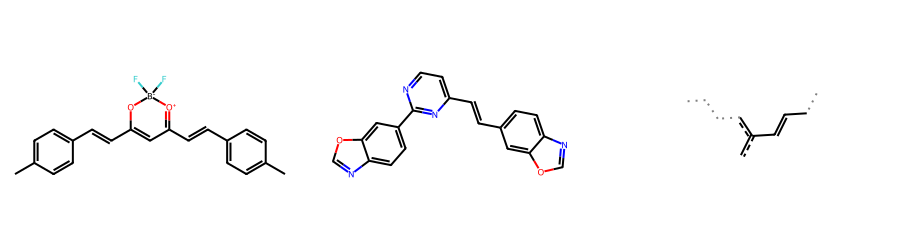

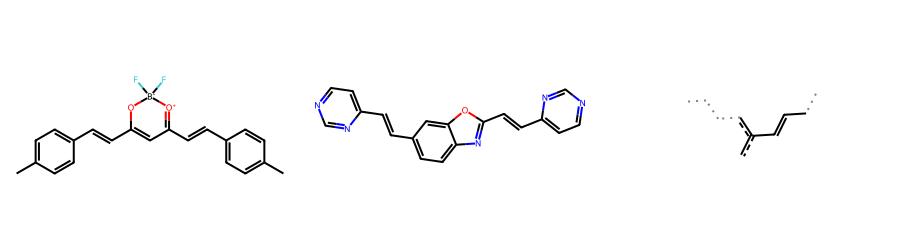

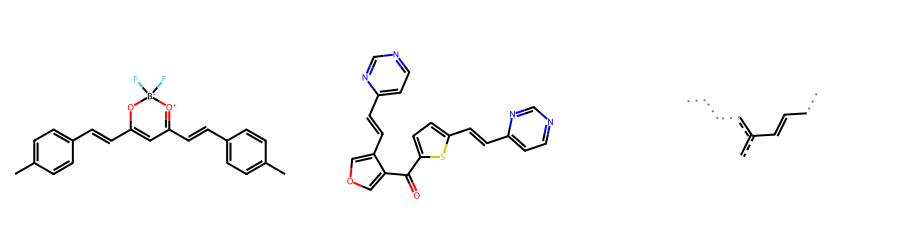

In [47]:
# Find the maximum common substructure of the first 3 molecules in the opv_df_sim_kulczynski_atom dataframe
mcs_mols = []
for i in range(3):
    opv_mol = opv_df_sim_kulczynski_atom['mol'][i]
    mcs = rdFMCS.FindMCS([specific_mol, opv_mol], threshold=0.8, completeRingsOnly=False, ringMatchesRingOnly=False)
    common_substructures = Chem.MolFromSmarts(mcs.smartsString)
    mcs_mols.append(common_substructures)

# Draw the maximum common substructure between the first 3 molecules in the OPV dataset
for i in range(3):
    opv_mol = opv_df_sim_kulczynski_atom['mol'][i]
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    img = Draw.MolsToGridImage([specific_mol, opv_mol, mcs_mol], molsPerRow=3, subImgSize=(300, 250))
    display(img)

<span style="font-size: 25px; font-weight:medium; color:cyan;">08. Similarity Ranked Filtering and Filtered Data Training</span>

- <span style="font-size: 18px; font-weight:medium; color:yellow;">Based on the Four types of Similarity types and selected best methods of similarity ranking, HOPV data filtering and training models against to check performance</span>

   - Methods choosen based on best Similarity values and logical molecule structures with most relevant features
      - Atomic Pair - Tanimoto Similarity
      - MACCS Keys - Tanimoto Similarity
      - Morgan - Tanimoto Similarity
      - MACCS Keys - Dice Similarity
      - Morgan - Dice Similarity
      - Atom Pair - Dice Similarity
      - MACCS Keys - Cosine Similarity
      - Morgan - Cosine Similarity
      - Atom Pair - Cosine Similarity
      - MACCS Keys - Kulczynski Similarity
      - Morgan - Kulczynski Similarity
      - Atom Pair - Kulczynski Similarity

In [48]:
similarity_dfs = [opv_df_sim_atomTani, opv_df_sim_Tanimaccs, opv_df_sim_Dicemaccs, opv_df_sim_Cosmaccs, opv_df_sim_Tanirdfp, opv_df_sim_Tanimorgan, opv_df_sim_Dicemorgan, opv_df_sim_Cosmorgan, opv_df_sim_Diceatom, opv_df_sim_Cosatom, opv_df_sim_kulczynski_maccs, opv_df_sim_kulczynski_morgan, opv_df_sim_kulczynski_atom]
similarity_dfs_names = ['opv_df_sim_atomTani', 'opv_df_sim_Tanimaccs', 'opv_df_sim_Dicemaccs', 'opv_df_sim_Cosmaccs', 'opv_df_sim_Tanirdfp', 'opv_df_sim_Tanimorgan', 'opv_df_sim_Dicemorgan', 'opv_df_sim_Cosmorgan', 'opv_df_sim_Diceatom', 'opv_df_sim_Cosatom', 'opv_df_sim_kulczynski_maccs', 'opv_df_sim_kulczynski_morgan', 'opv_df_sim_kulczynski_atom']

resulting_dfs = {}

for similarity_df, df_name in zip(similarity_dfs, similarity_dfs_names):
    temp_df = similarity_df.drop(['mol', 'fp'], axis=1).copy()
    top10_df = temp_df[temp_df['similarity'] >= temp_df['similarity'].quantile(0.90)].copy()
    top10_df['morgan_fp'] = top10_df['smiles'].apply(generate_morgan_fingerprint)
    
    # Optimize memory usage by using list comprehension
    morgan_fp_list = [generate_morgan_fingerprint(smiles) for smiles in top10_df['smiles']]
    morgan_fp_df = pd.DataFrame(morgan_fp_list, columns=[f'morgan_{i}' for i in range(2048)])
    
    top10_df = pd.concat([top10_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    resulting_dfs[df_name + '_top10'] = top10_df
    print(f'{df_name}_top10: {top10_df.shape}')

opv_df_sim_atomTani_top10: (5136, 2053)
opv_df_sim_Tanimaccs_top10: (5187, 2053)
opv_df_sim_Dicemaccs_top10: (5187, 2053)
opv_df_sim_Cosmaccs_top10: (5188, 2053)
opv_df_sim_Tanirdfp_top10: (5129, 2053)
opv_df_sim_Tanimorgan_top10: (5127, 2053)
opv_df_sim_Dicemorgan_top10: (5127, 2053)
opv_df_sim_Cosmorgan_top10: (5160, 2053)
opv_df_sim_Diceatom_top10: (5136, 2053)
opv_df_sim_Cosatom_top10: (5126, 2053)
opv_df_sim_kulczynski_maccs_top10: (5187, 2053)
opv_df_sim_kulczynski_morgan_top10: (5196, 2053)
opv_df_sim_kulczynski_atom_top10: (5137, 2053)


In [49]:
# Unpacking the resulting dataframes
opv_df_sim_atomTani_top10 = resulting_dfs['opv_df_sim_atomTani_top10']
opv_df_sim_Tanimaccs_top10 = resulting_dfs['opv_df_sim_Tanimaccs_top10']
opv_df_sim_Dicemaccs_top10 = resulting_dfs['opv_df_sim_Dicemaccs_top10']
opv_df_sim_Cosmaccs_top10 = resulting_dfs['opv_df_sim_Cosmaccs_top10']
opv_df_sim_Tanirdfp_top10 = resulting_dfs['opv_df_sim_Tanirdfp_top10']
opv_df_sim_Tanimorgan_top10 = resulting_dfs['opv_df_sim_Tanimorgan_top10']
opv_df_sim_Dicemorgan_top10 = resulting_dfs['opv_df_sim_Dicemorgan_top10']
opv_df_sim_Cosmorgan_top10 = resulting_dfs['opv_df_sim_Cosmorgan_top10']
opv_df_sim_Diceatom_top10 = resulting_dfs['opv_df_sim_Diceatom_top10']
opv_df_sim_Cosatom_top10 = resulting_dfs['opv_df_sim_Cosatom_top10']
opv_df_sim_kulczynski_maccs_top10 = resulting_dfs['opv_df_sim_kulczynski_maccs_top10']
opv_df_sim_kulczynski_morgan_top10 = resulting_dfs['opv_df_sim_kulczynski_morgan_top10']
opv_df_sim_kulczynski_atom_top10 = resulting_dfs['opv_df_sim_kulczynski_atom_top10']

<span style="font-size: 18px; font-weight:medium; color:yellow;">Curcumin database recreated to predict the Energy gaps using newly trained models from similarity cuts.</span>

In [50]:
curcumin_df_sim = curcumin_df_mf.iloc[:,:5]
curcumin_df_sim['morgan_fp'] = curcumin_df_sim['Smiles'].apply(generate_morgan_fingerprint)
morgan_df = pd.DataFrame(curcumin_df_sim['morgan_fp'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])
curcumin_df_sim_morgan = pd.concat([curcumin_df_sim.drop(columns=["morgan_fp"]).reset_index(drop=True), morgan_df], axis=1)

In [51]:
from pycaret.regression import *
import pandas as pd

dataframes = [
    ('opv_df_sim_atomTani_top10', opv_df_sim_atomTani_top10),
    ('opv_df_sim_Tanimaccs_top10', opv_df_sim_Tanimaccs_top10),
    ('opv_df_sim_Dicemaccs_top10', opv_df_sim_Dicemaccs_top10),
    ('opv_df_sim_Cosmaccs_top10', opv_df_sim_Cosmaccs_top10),
    ('opv_df_sim_Tanimorgan_top10', opv_df_sim_Tanimorgan_top10),
    ('opv_df_sim_Dicemorgan_top10', opv_df_sim_Dicemorgan_top10),
    ('opv_df_sim_Cosmorgan_top10', opv_df_sim_Cosmorgan_top10),
    ('opv_df_sim_Diceatom_top10', opv_df_sim_Diceatom_top10),
    ('opv_df_sim_Cosatom_top10', opv_df_sim_Cosatom_top10),
    ('opv_df_sim_kulczynski_maccs_top10', opv_df_sim_kulczynski_maccs_top10),
    ('opv_df_sim_kulczynski_morgan_top10', opv_df_sim_kulczynski_morgan_top10),
    ('opv_df_sim_kulczynski_atom_top10', opv_df_sim_kulczynski_atom_top10)
]

models_to_include = ['xgboost', 'lightgbm', 'knn', 'par', 'huber']
results = []

for name, df in dataframes:
    print(f'Processing: {name}...')
    X = df.iloc[:, 5:]
    y = df["GAP_calib"]
    
    setup_data = pd.concat([X, y], axis=1)
    regression_setup = setup(setup_data, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
    best_model = compare_models(include=models_to_include, verbose=False)
    
    best_model_results = pull()
    best_model_results['DataFrame'] = name
    
    results.append(best_model_results)
    print(f'Finished preocessing: {name}.')

final_results_Filtered = pd.concat(results).reset_index(drop=True)
final_results_Filtered.head()

Processing: opv_df_sim_atomTani_top10...
Finished preocessing: opv_df_sim_atomTani_top10.
Processing: opv_df_sim_Tanimaccs_top10...
Finished preocessing: opv_df_sim_Tanimaccs_top10.
Processing: opv_df_sim_Dicemaccs_top10...
Finished preocessing: opv_df_sim_Dicemaccs_top10.
Processing: opv_df_sim_Cosmaccs_top10...
Finished preocessing: opv_df_sim_Cosmaccs_top10.
Processing: opv_df_sim_Tanimorgan_top10...
Finished preocessing: opv_df_sim_Tanimorgan_top10.
Processing: opv_df_sim_Dicemorgan_top10...
Finished preocessing: opv_df_sim_Dicemorgan_top10.
Processing: opv_df_sim_Cosmorgan_top10...
Finished preocessing: opv_df_sim_Cosmorgan_top10.
Processing: opv_df_sim_Diceatom_top10...
Finished preocessing: opv_df_sim_Diceatom_top10.
Processing: opv_df_sim_Cosatom_top10...
Finished preocessing: opv_df_sim_Cosatom_top10.
Processing: opv_df_sim_kulczynski_maccs_top10...
Finished preocessing: opv_df_sim_kulczynski_maccs_top10.
Processing: opv_df_sim_kulczynski_morgan_top10...
Finished preocessing: 

Model     MAE     MSE    RMSE      R2   RMSLE  \
0  Light Gradient Boosting Machine  0.1415  0.0424  0.2029  0.8708  0.0510   
1        Extreme Gradient Boosting  0.1462  0.0485  0.2170  0.8526  0.0524   
2                  Huber Regressor  0.1703  0.0594  0.2418  0.8176  0.0617   
3     Passive Aggressive Regressor  0.1902  0.0689  0.2613  0.7868  0.0679   
4            K Neighbors Regressor  0.2156  0.0926  0.3038  0.7119  0.0798   

     MAPE  TT (Sec)                  DataFrame  
0  0.0512     0.816  opv_df_sim_atomTani_top10  
1  0.0531     0.838  opv_df_sim_atomTani_top10  
2  0.0614     1.460  opv_df_sim_atomTani_top10  
3  0.0688     0.125  opv_df_sim_atomTani_top10  
4  0.0814     0.086  opv_df_sim_atomTani_top10

In [58]:
import pandas as pd

# Assuming your DataFrame is named final_results_filtered

# Mapping of substrings to their respective Fingerprint Types
fingerprint_mapping = {
    'atom': 'AtomPair',
    'maccs': 'MACCS',
    'morgan': 'Morgan'
}

# Mapping of substrings to their respective Similarity Models
similarity_mapping = {
    'Tani': 'Tanimoto',
    'Dice': 'Dice',
    'Cos': 'Cosine',
    'kulczynski': 'Kulczynski'
}

# Function to extract Fingerprint Type
def get_fingerprint_type(df_name):
    for key, value in fingerprint_mapping.items():
        if key in df_name:
            return value
    return 'Unknown'

# Function to extract Similarity Model
def get_similarity_model(df_name):
    for key, value in similarity_mapping.items():
        if key in df_name:
            return value
    return 'Unknown'

# Apply the functions to create the new columns
final_results_Filtered['Fingerprint Type'] = final_results_Filtered['DataFrame'].apply(get_fingerprint_type)
final_results_Filtered['Similarity Model'] = final_results_Filtered['DataFrame'].apply(get_similarity_model)

final_results_Filtered.head()

Model     MAE     MSE    RMSE      R2   RMSLE  \
0  Light Gradient Boosting Machine  0.1415  0.0424  0.2029  0.8708  0.0510   
1        Extreme Gradient Boosting  0.1462  0.0485  0.2170  0.8526  0.0524   
2                  Huber Regressor  0.1703  0.0594  0.2418  0.8176  0.0617   
3     Passive Aggressive Regressor  0.1902  0.0689  0.2613  0.7868  0.0679   
4            K Neighbors Regressor  0.2156  0.0926  0.3038  0.7119  0.0798   

     MAPE  TT (Sec)                  DataFrame Fingerprint Type  \
0  0.0512     0.816  opv_df_sim_atomTani_top10         AtomPair   
1  0.0531     0.838  opv_df_sim_atomTani_top10         AtomPair   
2  0.0614     1.460  opv_df_sim_atomTani_top10         AtomPair   
3  0.0688     0.125  opv_df_sim_atomTani_top10         AtomPair   
4  0.0814     0.086  opv_df_sim_atomTani_top10         AtomPair   

  Similarity Model  
0         Tanimoto  
1         Tanimoto  
2         Tanimoto  
3         Tanimoto  
4         Tanimoto

In [59]:
final_results_Filtered.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\Similarity10_model_comparison_results_Filtered.csv")

In [86]:
import pandas as pd
import plotly.graph_objects as go

# Calculate average R² and RMSE scores grouped by Fingerprint Type and Similarity Model
fingerprint_avg = final_results_Filtered.groupby('Fingerprint Type').agg({'R2': 'mean', 'RMSE': 'mean'}).reset_index()
similarity_avg = final_results_Filtered.groupby('Similarity Model').agg({'R2': 'mean', 'RMSE': 'mean'}).reset_index()

# Plotting Fingerprint-wise average R² and RMSE scores
fig_fingerprint = go.Figure()

# R² as Bar Plot
fig_fingerprint.add_trace(go.Bar(x=fingerprint_avg['Fingerprint Type'], y=fingerprint_avg['R2'],
                                 name='R²', text=fingerprint_avg['R2'].round(4), textposition='auto'))

# RMSE as Line Plot
fig_fingerprint.add_trace(go.Scatter(x=fingerprint_avg['Fingerprint Type'], y=fingerprint_avg['RMSE'],
                                     name='RMSE', yaxis='y2', mode='lines+markers', line=dict(color='red')))

# Adding second y-axis for RMSE
fig_fingerprint.update_layout(
    title='Fingerprint-wise Average R² and RMSE Scores',
    yaxis=dict(title='R² Score', range=[0.7, 0.85]),
    yaxis2=dict(title='RMSE Score', overlaying='y', side='right', range=[0.238, 0.258]),
    xaxis=dict(title='Fingerprint Type'),
    legend=dict(x=0.8, y=1.2, orientation='h'),
    width=800,
    height=500
)

fig_fingerprint.show()

# Plotting Similarity-wise average R² and RMSE scores
fig_similarity = go.Figure()

# R² as Bar Plot
fig_similarity.add_trace(go.Bar(x=similarity_avg['Similarity Model'], y=similarity_avg['R2'],
                                name='R²', text=similarity_avg['R2'].round(4), textposition='auto'))

# RMSE as Line Plot
fig_similarity.add_trace(go.Scatter(x=similarity_avg['Similarity Model'], y=similarity_avg['RMSE'],
                                    name='RMSE', yaxis='y2', mode='lines+markers', line=dict(color='red')))

# Adding second y-axis for RMSE
fig_similarity.update_layout(
    title='Similarity-wise Average R² and RMSE Scores',
    yaxis=dict(title='R² Score', range=[0.7, 0.82]),
    yaxis2=dict(title='RMSE Score', overlaying='y', side='right', range=[0.248, 0.251]),
    xaxis=dict(title='Similarity Model'),
    legend=dict(x=0.8, y=1.2,orientation='h'),
    width=800,
    height=500
)

fig_similarity.show()

In [87]:
import plotly.express as px

# Prepare the data for the radar chart for Fingerprint Type
radar_fingerprint = final_results_Filtered.pivot_table(index='Model', columns='Fingerprint Type', values='R2').reset_index()

# Radar Chart for Fingerprint Types
fig_radar_fingerprint = px.line_polar(radar_fingerprint, r='MACCS', theta='Model', line_close=True, 
                                      labels={'variable': 'Fingerprint Type', 'value': 'R² Score'}, 
                                      title='R² Scores by Fingerprint Type')
fig_radar_fingerprint.show() 

# Prepare the data for the radar chart for Similarity Model
radar_similarity = final_results_Filtered.pivot_table(index='Model', columns='Similarity Model', values='R2').reset_index()

# Radar Chart for Similarity Models
fig_radar_similarity = px.line_polar(radar_similarity, r='Tanimoto', theta='Model', line_close=True,
                                     labels={'variable': 'Similarity Model', 'value': 'R² Score'}, 
                                     title='R² Scores by Similarity Model')
fig_radar_similarity.show()

In [139]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Prepare the data for the radar chart for Fingerprint Type
radar_fingerprint = final_results_Filtered.pivot_table(index='Model', columns='Fingerprint Type', values='R2').reset_index()

# Prepare the data for the radar chart for Similarity Model
radar_similarity = final_results_Filtered.pivot_table(index='Model', columns='Similarity Model', values='R2').reset_index()

# Create a subplot with two polar charts
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'polar'}, {'type': 'polar'}]],
    subplot_titles=['R² Scores by Fingerprint Type', 'R² Scores by Similarity Model']
)

# Radar Chart for Fingerprint Types
for fingerprint_type in radar_fingerprint.columns[1:]:
    fig.add_trace(go.Scatterpolar(
        r=radar_fingerprint[fingerprint_type],
        theta=radar_fingerprint['Model'],
        name=fingerprint_type,
        fill='toself'
    ), row=1, col=1)

# Radar Chart for Similarity Models
for similarity_model in radar_similarity.columns[1:]:
    fig.add_trace(go.Scatterpolar(
        r=radar_similarity[similarity_model],
        theta=radar_similarity['Model'],
        name=similarity_model,
        fill='toself'
    ), row=1, col=2)

# Update layout to set the R² range and add titles
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0.6, 0.9],
            showticklabels=True,
            tickangle=45
        )
    ),
    polar2=dict(
        radialaxis=dict(
            showticklabels=True,
            tickangle=45
        )
    ),
    height=800,
    width=1200,
    title_text="Combined Radar Plots for R² Scores by Fingerprint Type and Similarity Model",
)

fig.show()

In [138]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare the data for the radar chart for Fingerprint Type
radar_fingerprint = final_results_Filtered.pivot_table(index='Model', columns='Fingerprint Type', values='R2').reset_index()

# Create the radar chart for Fingerprint Types
fig_fingerprint = go.Figure()

for fingerprint_type in radar_fingerprint.columns[1:]:
    fig_fingerprint.add_trace(go.Scatterpolar(
        r=radar_fingerprint[fingerprint_type],
        theta=radar_fingerprint['Model'],
        name=fingerprint_type,
        fill='toself'
    ))

# Update layout for the fingerprint radar plot
fig_fingerprint.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0.7, 0.9],
            showticklabels=True,
            tickangle=45
        )
    ),
    height=600,
    width=900,
    title_text="Radar Plot for R² Scores by Fingerprint Type",
)

fig_fingerprint.show()

In [136]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare the data for the radar chart for Similarity Model
radar_similarity = final_results_Filtered.pivot_table(index='Model', columns='Similarity Model', values='R2').reset_index()

# Create the radar chart for Similarity Models
fig_similarity = go.Figure()

for similarity_model in radar_similarity.columns[1:]:
    fig_similarity.add_trace(go.Scatterpolar(
        r=radar_similarity[similarity_model],
        theta=radar_similarity['Model'],
        name=similarity_model,
        fill='toself'
    ))

# Update layout for the similarity radar plot
fig_similarity.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0.7, 0.9],
            showticklabels=True,
            tickangle=45
        )
    ),
    height=600,
    width=900,
    title_text="Radar Plot for R² Scores by Similarity Model",
)

fig_similarity.show()

In [135]:
import plotly.express as px

# Create the bar plot with R² scores across different DataFrame types for each model
fig_model_df = px.bar(final_results_Filtered, x='DataFrame', y='R2', color='Model',
                      title='Model-wise R² Scores across Different DataFrame Types',
                      labels={'R2': 'R² Score'},
                      text=final_results_Filtered['R2'].round(4))  # Round to 4 decimals for display

# Update the layout to make the data labels visible
fig_model_df.update_traces(textposition='auto', textfont=dict(size=12, family = 'Arial'))

# Adjust the layout
fig_model_df.update_layout(height=600, width=1100)

# Show the plot
fig_model_df.show()

In [133]:
# Identifying the best model for each DataFrame type
best_model_df = final_results_Filtered.loc[final_results_Filtered.groupby('DataFrame')['R2'].idxmax()]

# Bar plot to visualize the best model for each DataFrame type with R² labels
fig_best_model = px.bar(best_model_df, x='DataFrame', y='R2', color='Model',
                        title='Best Model for Each DataFrame Type',
                        labels={'R2': 'R² Score', 'DataFrame': 'DataFrame Type'},
                        text=best_model_df['R2'].round(4))
fig_best_model.update_layout(
    yaxis=dict(title='R² Score', range=[0.85, 0.88]),
    legend=dict(x=0.8, y=1.2,orientation='h'),
    width=1000,
    height=600
)
fig_best_model.show()

In [132]:
import plotly.express as px

# Define the list of fingerprint types
fingerprint_types = ['MACCS', 'AtomPair', 'Morgan']

# Loop through each fingerprint type and create a separate plot
for fingerprint in fingerprint_types:
    # Filter data for the current fingerprint type
    df_filtered = final_results_Filtered[final_results_Filtered['Fingerprint Type'] == fingerprint]

    # Create the bar plot
    fig = px.bar(df_filtered, x='Similarity Model', y='R2', color='Model',
                 title=f'R² Scores by Similarity Model for Fingerprint Type: {fingerprint}',
                 labels={'R2': 'R² Score'},
                 text=df_filtered['R2'].round(4))  # Display R² scores with 4 decimals

    # Update layout to show vertical bars and data labels
    fig.update_layout(
        xaxis_title='Similarity Model',
        yaxis_title='R² Score',
        height=600,
        width=1100,
        barmode='group'  # Ensure vertical bars for each similarity model
    )
    
    fig.update_traces(textposition='auto', textfont=dict(size=15, family='Arial'))
    
    # Show the plot
    fig.show()

<span style="font-size: 22px; font-weight:bold; color:pink;">I. 1st Quantile of Similarity Ranks from Atomic Pair Fingerprints took for the Model training</span>

    - 1.1 Atomic Pair - Tanimoto Similarity
    - 1.2 Atomic Pair - Dice Similarity
    - 1.3 Atomic Pair - Cosine Similarity

 - Features between atom pairs taken account to explain molecule's unique features and similarity exhibits mixed results on similarity measures. But it shows slight improvements which can be optimized further to explain promising model in the future.

<span style="font-size: 18px; font-weight:medium; color:orange;">(1.1). Atomic Pair Fingerprints - Tanimoto Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [87]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on Atom Tanimoto similarity
from pycaret.regression import *

X = opv_df_sim_atomTani_top25.iloc[:,5:]
y = opv_df_sim_atomTani_top25["GAP_calib"]

setup_atomTani_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_atomTani_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr']
best_model_atomTani_top25 = compare_models(include=models_to_include)

CPU times: total: 17.1 s
Wall time: 2min 38s


- <span style="font-size: 18px; font-weight:medium; color:yellow;">Predicted Energy gaps of Homo-Lumo (eV) lis compared with the theorotical energy band gap calculated using DFT</span>

RMSE: 0.32807809832955026
R2: -1.5974815236847788


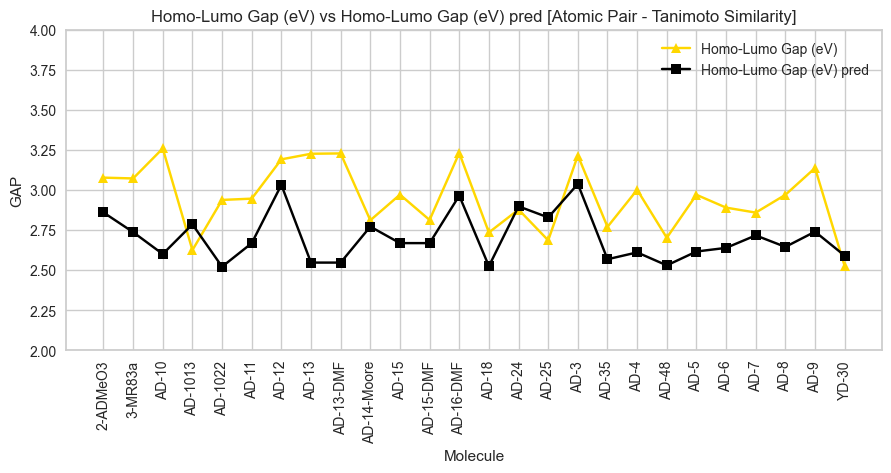

In [89]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_atomTani_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_atomTani_pred["Homo-Lumo Gap (eV) pred"] = best_model_atomTani_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_atomTani_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_atomTani_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_atomTani_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_atomTani_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_atomTani_pred['Molecule'], curcumin_df_sim_atomTani_pred['Homo-Lumo Gap (eV)'], marker= '^', label='Homo-Lumo Gap (eV)',color = "gold")
plt.plot(curcumin_df_sim_atomTani_pred['Molecule'], curcumin_df_sim_atomTani_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred',color = "black")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Atomic Pair - Tanimoto Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 18px; font-weight:medium; color:orange;">(1.2). Atomic Pair Fingerprints - Dice Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [55]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on Atom Tanimoto similarity
from pycaret.regression import *

X = opv_df_sim_Diceatom_top25.iloc[:,5:]
y = opv_df_sim_Diceatom_top25["GAP_calib"]

setup_Diceatom_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Diceatom_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr']
best_model_Diceatom_top25 = compare_models(include=models_to_include)

CPU times: total: 33.2 s
Wall time: 5min 34s


- <span style="font-size: 18px; font-weight:medium; color:yellow;">Predicted Energy gaps of Homo-Lumo (eV) lis compared with the theorotical energy band gap calculated using DFT</span>

RMSE: 0.19144529199124818
R2: 0.11552131670623311


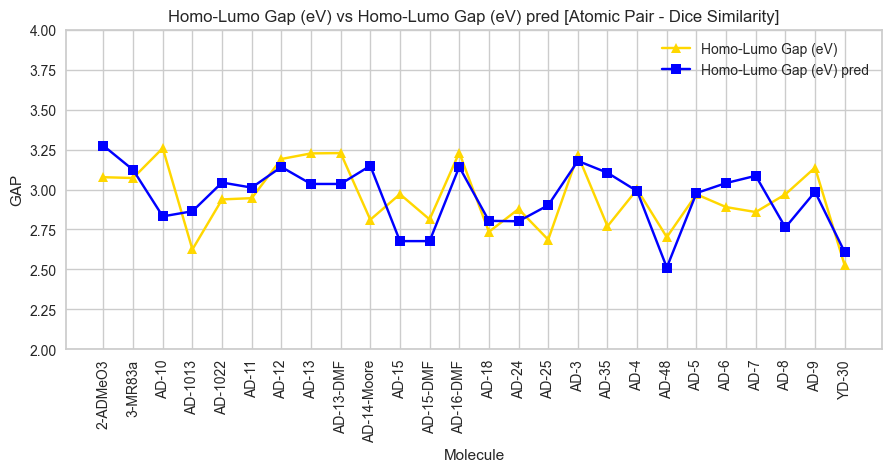

In [56]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Diceatom_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Diceatom_pred["Homo-Lumo Gap (eV) pred"] = best_model_Diceatom_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Diceatom_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Diceatom_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Diceatom_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Diceatom_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Diceatom_pred['Molecule'], curcumin_df_sim_Diceatom_pred['Homo-Lumo Gap (eV)'], marker= '^', label='Homo-Lumo Gap (eV)',color = "gold")
plt.plot(curcumin_df_sim_Diceatom_pred['Molecule'], curcumin_df_sim_Diceatom_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred',color = "blue")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Atomic Pair - Dice Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 18px; font-weight:medium; color:orange;">(1.3). Atomic Pair Fingerprints - Cosine Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [57]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on Atom Pair Cosine similarity
from pycaret.regression import *

X = opv_df_sim_Cosatom_top25.iloc[:,5:]
y = opv_df_sim_Cosatom_top25["GAP_calib"]

setup_Cosatom_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Cosatom_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr']
best_model_Cosatom_top25 = compare_models(include=models_to_include)

CPU times: total: 32.6 s
Wall time: 5min 27s


- <span style="font-size: 18px; font-weight:medium; color:yellow;">Predicted Energy gaps of Homo-Lumo (eV) lis compared with the theorotical energy band gap calculated using DFT</span>

RMSE: 0.23781869079416557
R2: -0.36486581718079925


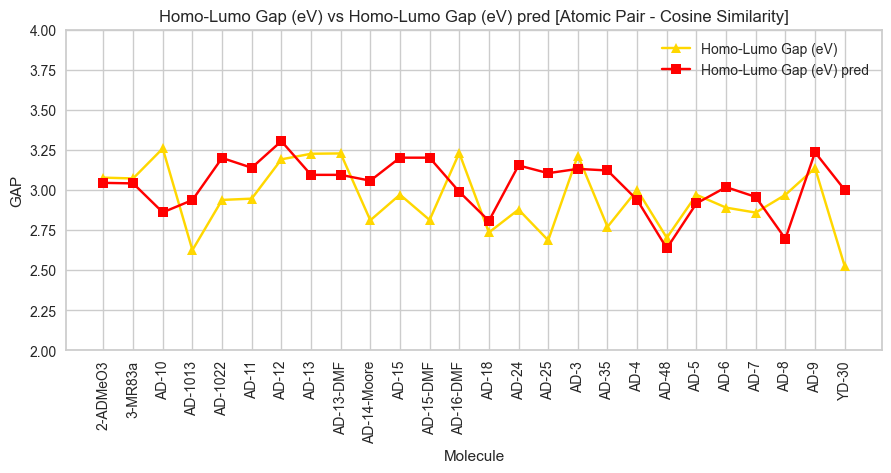

In [58]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Cosatom_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Cosatom_pred["Homo-Lumo Gap (eV) pred"] = best_model_Cosatom_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Cosatom_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Cosatom_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Cosatom_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Cosatom_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Cosatom_pred['Molecule'], curcumin_df_sim_Cosatom_pred['Homo-Lumo Gap (eV)'], marker= '^', label='Homo-Lumo Gap (eV)',color = "gold")
plt.plot(curcumin_df_sim_Cosatom_pred['Molecule'], curcumin_df_sim_Cosatom_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred',color = "red")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Atomic Pair - Cosine Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 22px; font-weight:bold; color:pink;">II. 1st Quantile of Similarity Ranks from MACCS keys took for the Model training</span>

    - 2.1 MACCS Keys - Tanimoto Similarity
    - 2.2 MACCS Keys - Dice Similarity
    - 2.3 MACCS Keys - Cosine Similarity


 - Most common method of Similarity search; Tanimoto similarity takes place on ranking the most chemically related molecules to curcumin by generating MACCS keys which has to be found out to perform well with explaining functional features of the molecules. But Dice and Cosine similarity also takes place with MACCS keys to compare and get the best reults.

<span style="font-size: 18px; font-weight:medium; color:orange;">(2.1). MACCS Keys - Tanimoto Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [59]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on MACCS Tanimoto similarity
from pycaret.regression import *

X = opv_df_sim_Tanimaccs_top25.iloc[:,5:]
y = opv_df_sim_Tanimaccs_top25["GAP_calib"]

setup_Tanimaccs_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Tanimaccs_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['lr', 'xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge']
best_model_Tanimaccs_top25 = compare_models(include=models_to_include)

CPU times: total: 32.9 s
Wall time: 5min 31s


- <span style="font-size: 18px; font-weight:medium; color:yellow;">Predicted Energy gaps of Homo-Lumo (eV) lis compared with the theorotical energy band gap calculated using DFT</span>

RMSE: 0.32902304839362906
R2: -1.6124659138609627


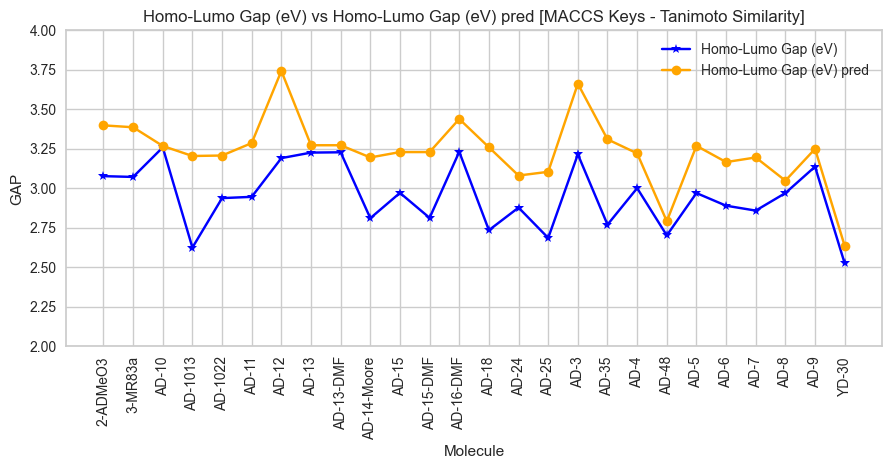

In [60]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_maccsTani_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_maccsTani_pred["Homo-Lumo Gap (eV) pred"] = best_model_Tanimaccs_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_maccsTani_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_maccsTani_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_maccsTani_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_maccsTani_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_maccsTani_pred['Molecule'], curcumin_df_sim_maccsTani_pred['Homo-Lumo Gap (eV)'], marker= '*', label='Homo-Lumo Gap (eV)',color = "blue")
plt.plot(curcumin_df_sim_maccsTani_pred['Molecule'], curcumin_df_sim_maccsTani_pred['Homo-Lumo Gap (eV) pred'], marker= 'o', label='Homo-Lumo Gap (eV) pred',color = "orange")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [MACCS Keys - Tanimoto Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()


<span style="font-size: 18px; font-weight:medium; color:orange;">(2.2). MACCS Keys - Dice Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [61]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on MACCS Dice similarity
from pycaret.regression import *

X = opv_df_sim_Dicemaccs_top25.iloc[:,5:]
y = opv_df_sim_Dicemaccs_top25["GAP_calib"]

setup_Dicemaccs_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Dicemaccs_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['lr', 'xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge']
best_model_Dicemaccs_top25 = compare_models(include=models_to_include)

CPU times: total: 33.5 s
Wall time: 5min 27s


- <span style="font-size: 18px; font-weight:medium; color:yellow;">Predicted Energy gaps of Homo-Lumo (eV) lis compared with the theorotical energy band gap calculated using DFT</span>

RMSE: 0.32902304839362906
R2: -1.6124659138609627


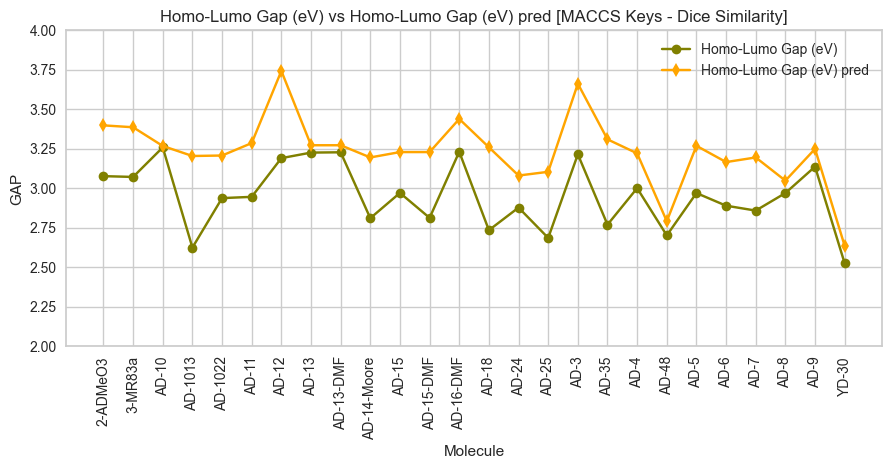

In [62]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Dicemaccs_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Dicemaccs_pred["Homo-Lumo Gap (eV) pred"] = best_model_Dicemaccs_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Dicemaccs_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Dicemaccs_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Dicemaccs_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Dicemaccs_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Dicemaccs_pred['Molecule'], curcumin_df_sim_Dicemaccs_pred['Homo-Lumo Gap (eV)'], marker= 'o', label='Homo-Lumo Gap (eV)',color = "olive")
plt.plot(curcumin_df_sim_Dicemaccs_pred['Molecule'], curcumin_df_sim_Dicemaccs_pred['Homo-Lumo Gap (eV) pred'], marker= 'd', label='Homo-Lumo Gap (eV) pred',color = "orange")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [MACCS Keys - Dice Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 18px; font-weight:medium; color:orange;">(2.3). MACCS Keys - Cosine Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [63]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on MACCS Cosine similarity
from pycaret.regression import *

X = opv_df_sim_Cosmaccs_top25.iloc[:,5:]
y = opv_df_sim_Cosmaccs_top25["GAP_calib"]

setup_Cosmaccs_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Cosmaccs_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['lr', 'xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge']
best_model_Cosmaccs_top25 = compare_models(include=models_to_include)

CPU times: total: 19.3 s
Wall time: 5min 39s


- <span style="font-size: 18px; font-weight:medium; color:yellow;">Predicted Energy gaps of Homo-Lumo (eV) lis compared with the theorotical energy band gap calculated using DFT</span>

RMSE: 0.18022320559647903
R2: 0.21617446164433562


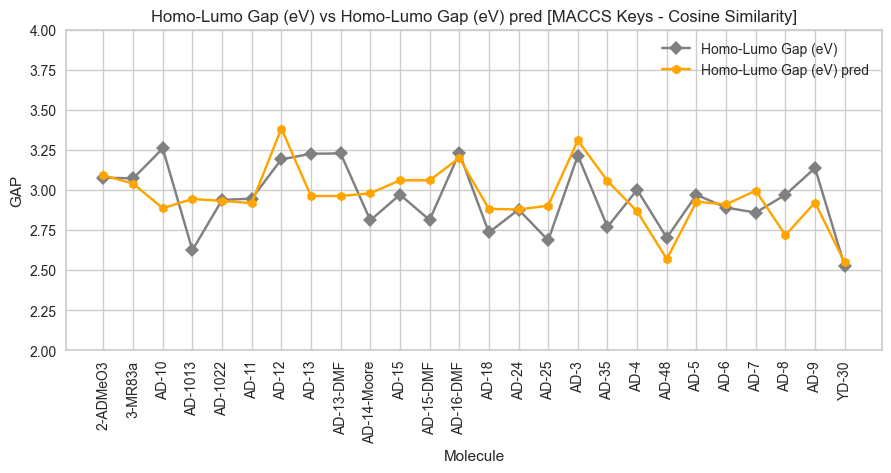

In [64]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Cosmaccs_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Cosmaccs_pred["Homo-Lumo Gap (eV) pred"] = best_model_Cosmaccs_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Cosmaccs_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Cosmaccs_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Cosmaccs_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Cosmaccs_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Cosmaccs_pred['Molecule'], curcumin_df_sim_Cosmaccs_pred['Homo-Lumo Gap (eV)'], marker= 'D', label='Homo-Lumo Gap (eV)',color = "grey")
plt.plot(curcumin_df_sim_Cosmaccs_pred['Molecule'], curcumin_df_sim_Cosmaccs_pred['Homo-Lumo Gap (eV) pred'], marker= 'h', label='Homo-Lumo Gap (eV) pred',color = "orange")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [MACCS Keys - Cosine Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 22px; font-weight:bold; color:pink;">III. 1st Quantile of Similarity Ranks from Morgan Fingerprints took for the Model training</span>

    - 3.1 Morgan Fingerprints - Tanimoto Similarity
    - 3.2 Morgan Fingerprints - Dice Similarity
    - 3.3 Morgan Fingerprints - Cosine Similarity

 - Dice similarity sort curcumin backbone structure easily and select similar molecules which has most of the key features of curcumin molecules which would support further to reduce outliers cause false results on trained model. Morgan fingerprints which is a hybrid style, could exhibit good accuracy on model training.

<span style="font-size: 18px; font-weight:medium; color:orange;">(3.1). Morgan Fingerprints - Tanimoto Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [65]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on Morgan Tanimoto similarity
from pycaret.regression import *

X = opv_df_sim_Tanimorgan_top25.iloc[:,5:]
y = opv_df_sim_Tanimorgan_top25["GAP_calib"]

setup_Tanimorgan_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Tanimorgan_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr']
best_model_Tanimorgan_top25 = compare_models(include=models_to_include)

CPU times: total: 27.7 s
Wall time: 5min 30s


<span style="font-size: 18px; font-weight:medium; color:yellow;">Curcumin database recreated to predict the Energy gaps using newly trained models from similarity cuts.</span>

RMSE: 0.20538951553634383
R2: -0.018015827419634478


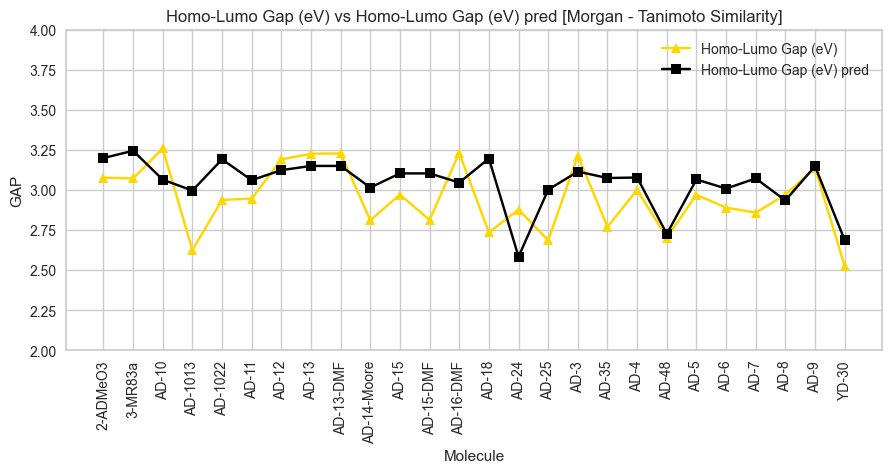

In [66]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Tanimorgan_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Tanimorgan_pred["Homo-Lumo Gap (eV) pred"] = best_model_Tanimorgan_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Tanimorgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Tanimorgan_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Tanimorgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Tanimorgan_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Tanimorgan_pred['Molecule'], curcumin_df_sim_Tanimorgan_pred['Homo-Lumo Gap (eV)'], marker= '^', label='Homo-Lumo Gap (eV)',color = "gold")
plt.plot(curcumin_df_sim_Tanimorgan_pred['Molecule'], curcumin_df_sim_Tanimorgan_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred',color = "black")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Morgan - Tanimoto Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 18px; font-weight:medium; color:orange;">(3.2). Morgan Fingerprints - Dice Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [67]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on Morgan Dice similarity
from pycaret.regression import *

X = opv_df_sim_Dicemorgan_top25.iloc[:,5:]
y = opv_df_sim_Dicemorgan_top25["GAP_calib"]

setup_Dicemorgan_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Dicemorgan_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr']
best_model_Dicemorgan_top25 = compare_models(include=models_to_include)

CPU times: total: 25.1 s
Wall time: 5min 14s


<span style="font-size: 18px; font-weight:medium; color:yellow;">Curcumin database recreated to predict the Energy gaps using newly trained models from similarity cuts.</span>

RMSE: 0.20538951553634383
R2: -0.018015827419634478


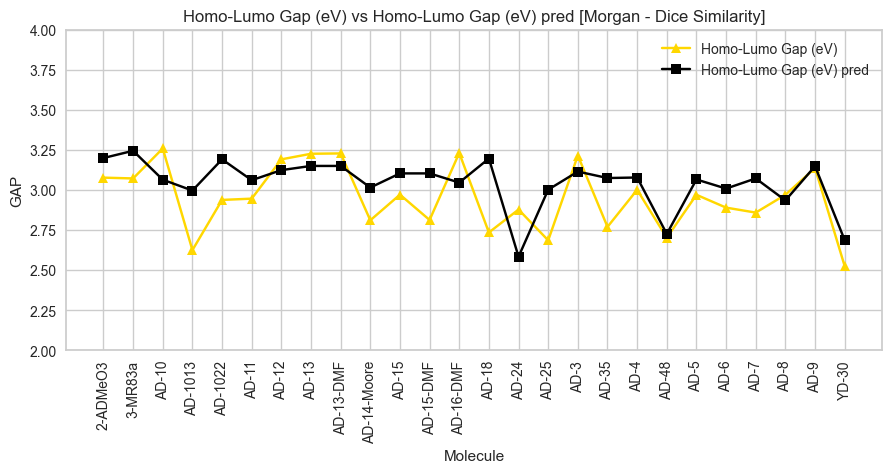

In [68]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Dicemorgan_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Dicemorgan_pred["Homo-Lumo Gap (eV) pred"] = best_model_Dicemorgan_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Dicemorgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Dicemorgan_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Dicemorgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Dicemorgan_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Dicemorgan_pred['Molecule'], curcumin_df_sim_Dicemorgan_pred['Homo-Lumo Gap (eV)'], marker= '^', label='Homo-Lumo Gap (eV)',color = "gold")
plt.plot(curcumin_df_sim_Dicemorgan_pred['Molecule'], curcumin_df_sim_Dicemorgan_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred',color = "black")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Morgan - Dice Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 18px; font-weight:medium; color:orange;">(3.3). Morgan Fingerprints - Cosine Similarity 25% filtered dataset training with pycaret selected models to find the best</span>

In [69]:
%%time
# Pycaret setup for the top 25% of the most similar molecules based on Morgan Cosine similarity
from pycaret.regression import *

X = opv_df_sim_Cosmorgan_top25.iloc[:,5:]
y = opv_df_sim_Cosmorgan_top25["GAP_calib"]

setup_Cosmorgan_top25 = pd.concat([X,y], axis = 1)
regression_setup = setup(setup_Cosmorgan_top25, target='GAP_calib', verbose=False, session_id=123, train_size=0.75)
models_to_include = ['xgboost', 'lightgbm', 'rf', 'br', 'huber', 'ridge', 'lr']
best_model_Cosmorgan_top25 = compare_models(include=models_to_include)

CPU times: total: 25.8 s
Wall time: 5min 22s


<span style="font-size: 18px; font-weight:medium; color:yellow;">Curcumin database recreated to predict the Energy gaps using newly trained models from similarity cuts.</span>

RMSE: 0.3312644939986972
R2: -1.648181624574005


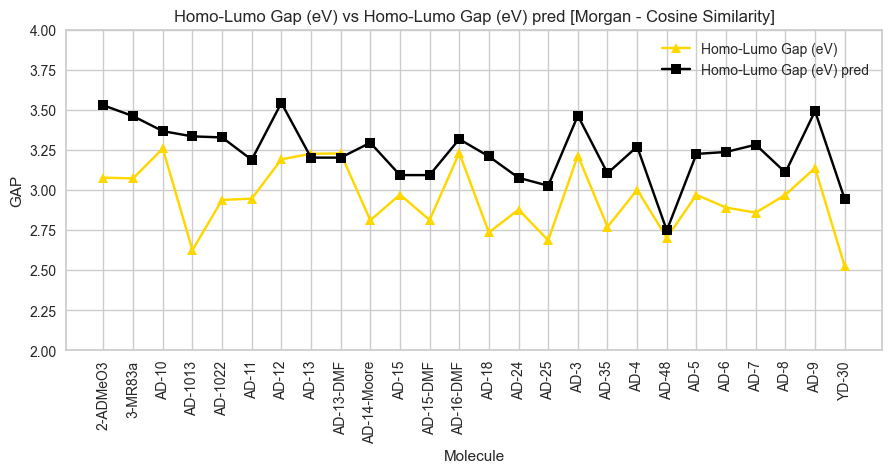

In [70]:
# predicting the HOME-LUMO Gap (eV) values for the curcumin dataset
curcumin_df_sim_Cosmorgan_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_Cosmorgan_pred["Homo-Lumo Gap (eV) pred"] = best_model_Cosmorgan_top25.predict(curcumin_df_sim_morgan.iloc[:,5:])

# calculate the RMSE and R2 scores for each Homo-Lumo Gap (eV) and gap_calib_pred values
rmse = mean_squared_error(curcumin_df_sim_Cosmorgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Cosmorgan_pred['Homo-Lumo Gap (eV) pred'], squared=False)
r2 = r2_score(curcumin_df_sim_Cosmorgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_Cosmorgan_pred['Homo-Lumo Gap (eV) pred'])

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plotting the GAP and GAP_pred values against molecule names
plt.figure(figsize=(9,4))
plt.plot(curcumin_df_sim_Cosmorgan_pred['Molecule'], curcumin_df_sim_Cosmorgan_pred['Homo-Lumo Gap (eV)'], marker= '^', label='Homo-Lumo Gap (eV)',color = "gold")
plt.plot(curcumin_df_sim_Cosmorgan_pred['Molecule'], curcumin_df_sim_Cosmorgan_pred['Homo-Lumo Gap (eV) pred'], marker= 's', label='Homo-Lumo Gap (eV) pred',color = "black")
plt.xlabel('Molecule')
plt.ylabel('GAP')
plt.grid(True)
plt.tight_layout()
plt.title('Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Morgan - Cosine Similarity]')
plt.legend()
plt.ylim(2,4)
plt.xticks(rotation=90)
plt.show()

<span style="font-size: 25px; font-weight:medium; color:cyan;">09. Varying the Filtering percentage upon Similarity rank and visualize the accuracy</span>

- <span style="font-size: 18px; font-weight:medium; color:yellow;">Out of 9 similarity methods taken Best similarity criterions selected in order to find the best parameters can be varied to find the most explainable model of the curcumin molecules Homo-Lumo Gap derived form DFT Quantum mechanics claculations.</span>

   - Criterions choosen based on the Accuracy analysis and prediction trend with DFT calculated values
      - MACCS Keys with Cosine Similarity (Top 25%): 0.2 R2 accuracy but explained the trend
      - Atomic Pair Fingerprints with Cosine Similarity (Top 25%): Rationality on Structures and Trend Explanation

<span style="font-size: 22px; font-weight:bold; color:pink;">I. MACCS Keys - Cosine Similarity</span>

In [71]:
# parameters of best_model_Cosmaccs_top25 pycaret model
print(best_model_Cosmaccs_top25.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [72]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import gc
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_morgan_fingerprint(smiles, radius=4, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return list(fingerprint)
    else:
        return None
    
opv_df_sim_Cosmaccs = similarity_dfs[3].drop(['mol', 'fp'], axis=1)

# Parameters for the LightGBM model
params = {
    'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31,
    'objective': None, 'random_state': 123, 'reg_alpha': 0.0,
    'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 
    'subsample_freq': 0, 'verbose': -1
}

# Adjusted percentiles
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_sim_Cosmaccs['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_sim_Cosmaccs[opv_df_sim_Cosmaccs['similarity'] >= quantile_value].copy()
    filtered_df['morgan_fp'] = filtered_df['smiles'].apply(generate_morgan_fingerprint)
    
    # Convert fingerprints to more memory-efficient data types
    morgan_fp_list = [generate_morgan_fingerprint(smiles) for smiles in filtered_df['smiles']]
    morgan_fp_df = pd.DataFrame(morgan_fp_list, columns=[f'morgan_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    # Train LightGBM model
    X = filtered_df.iloc[:, 5:] 
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    lgbm_model = lgb.LGBMRegressor(**params)
    lgbm_model.fit(X_train, y_train)
    
    y_train_pred = lgbm_model.predict(X_train)
    y_test_pred = lgbm_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_sim_Cosmaccs_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    import joblib  # for saving models
    model_filename = f'lgbm_model_top{percentile}.pkl'
    joblib.dump(lgbm_model, model_filename)

    # Clear memory
    del filtered_df, morgan_fp_list, morgan_fp_df, X, y, X_train, X_test, y_train, y_test, lgbm_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_sim_Cosmaccs_top6: Train R2: 0.878122767328273, Test R2: 0.8690525849487909, Train RMSE: 0.2155409134992251, Test RMSE: 0.2204433535489311
opv_df_sim_Cosmaccs_top12: Train R2: 0.8853889996310138, Test R2: 0.8650878199513299, Train RMSE: 0.20786020271202135, Test RMSE: 0.22385078132495198
opv_df_sim_Cosmaccs_top18: Train R2: 0.8866510864659763, Test R2: 0.8730202869900979, Train RMSE: 0.20582494358052777, Test RMSE: 0.22000937127411124
opv_df_sim_Cosmaccs_top24: Train R2: 0.8878458291607734, Test R2: 0.8755257092307415, Train RMSE: 0.20563565763558977, Test RMSE: 0.21659594931351348
opv_df_sim_Cosmaccs_top30: Train R2: 0.8894444303473554, Test R2: 0.8798921134437445, Train RMSE: 0.2043232711439388, Test RMSE: 0.21351574512532212
opv_df_sim_Cosmaccs_top36: Train R2: 0.8953058837235177, Test R2: 0.8254052905979989, Train RMSE: 0.1971335858376777, Test RMSE: 0.2602092089509735
opv_df_sim_Cosmaccs_top42: Train R2: 0.8907005112777264, Test R2: 0.8637192964614574, Train RMSE: 0.2019898

DataFrame   Rows  Train R2   Test R2  Train RMSE  Test RMSE
0   opv_df_sim_Cosmaccs_top6  48194  0.878123  0.869053    0.215541   0.220443
1  opv_df_sim_Cosmaccs_top12  45153  0.885389  0.865088    0.207860   0.223851
2  opv_df_sim_Cosmaccs_top18  42136  0.886651  0.873020    0.205825   0.220009
3  opv_df_sim_Cosmaccs_top24  39013  0.887846  0.875526    0.205636   0.216596
4  opv_df_sim_Cosmaccs_top30  35897  0.889444  0.879892    0.204323   0.213516
5  opv_df_sim_Cosmaccs_top36  33090  0.895306  0.825405    0.197134   0.260209
6  opv_df_sim_Cosmaccs_top42  29859  0.890701  0.863719    0.201990   0.220348
7  opv_df_sim_Cosmaccs_top48  26798  0.897162  0.806908    0.191234   0.271523
8  opv_df_sim_Cosmaccs_top54  23671  0.898581  0.795081    0.187365   0.277304

Percentile 6%: RMSE: 0.291803059614322, R2: -1.0548383933180268


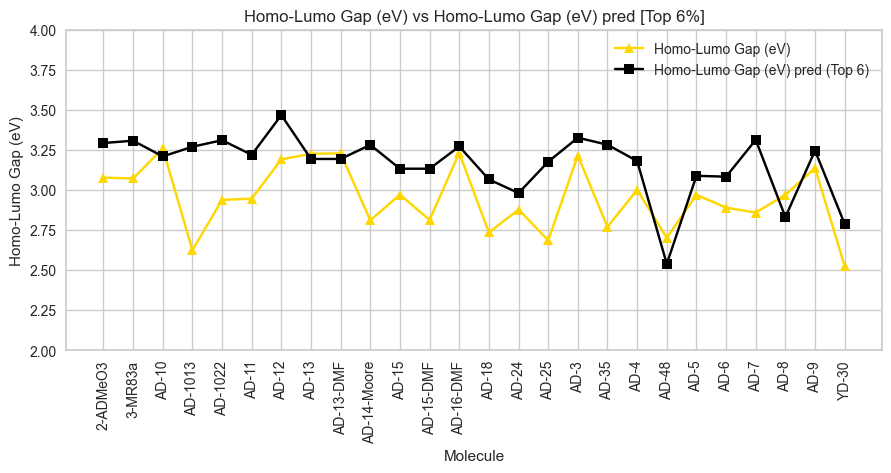

Percentile 12%: RMSE: 0.23769346475951608, R2: -0.36342882554229483


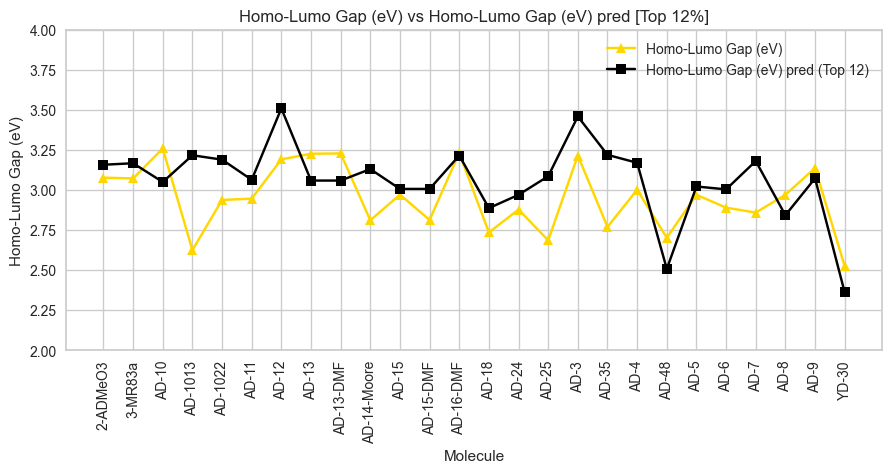

Percentile 18%: RMSE: 0.23129368807020098, R2: -0.2909979465943826


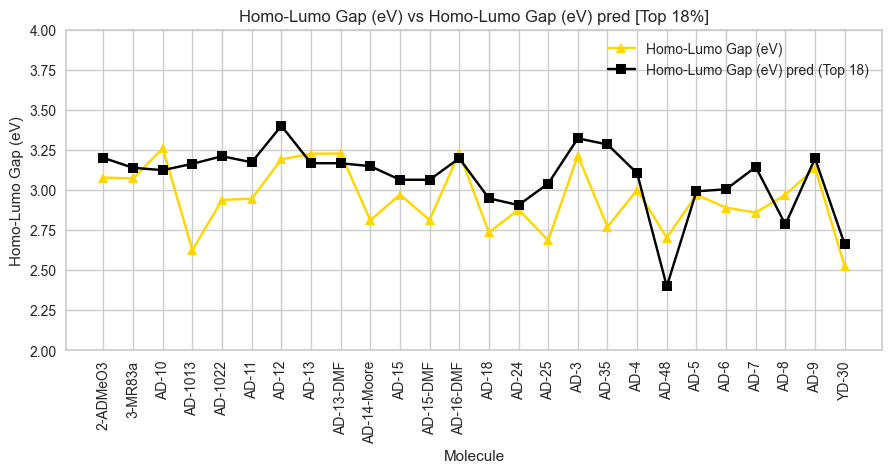

Percentile 24%: RMSE: 0.18417836620101494, R2: 0.1813934384494149


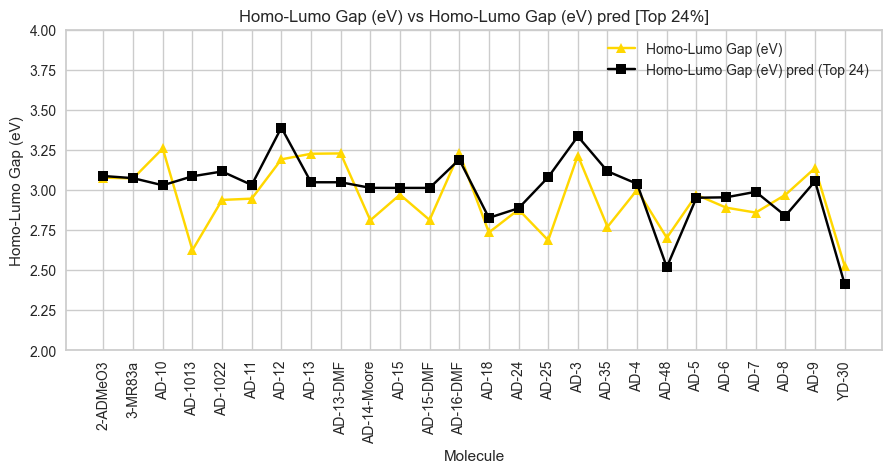

Percentile 30%: RMSE: 0.1833042804105243, R2: 0.18914499437781185


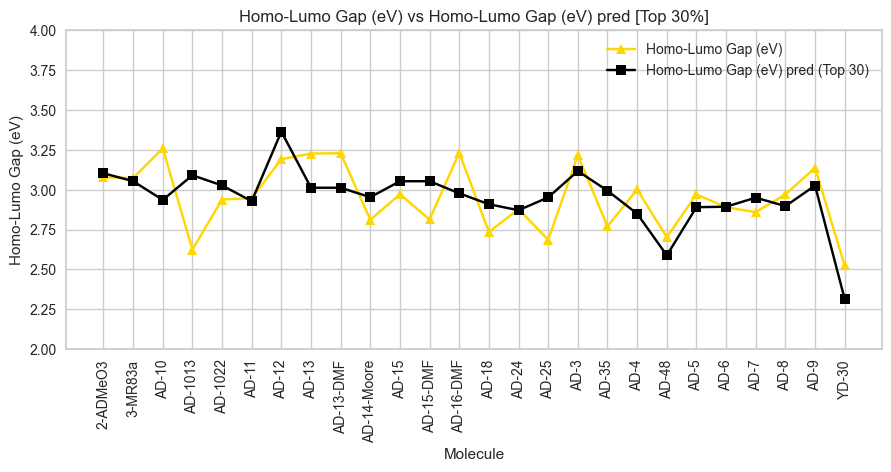

Percentile 36%: RMSE: 0.17589538186186754, R2: 0.253367546038191


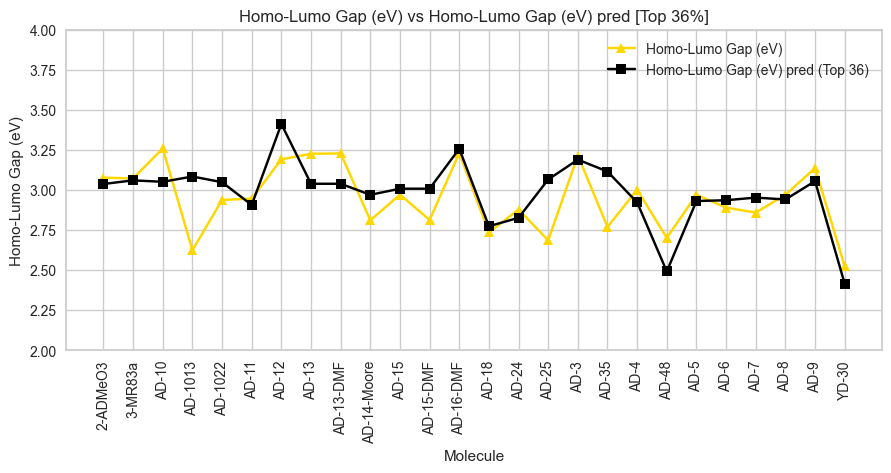

Percentile 42%: RMSE: 0.1896407184120603, R2: 0.13211701725651404


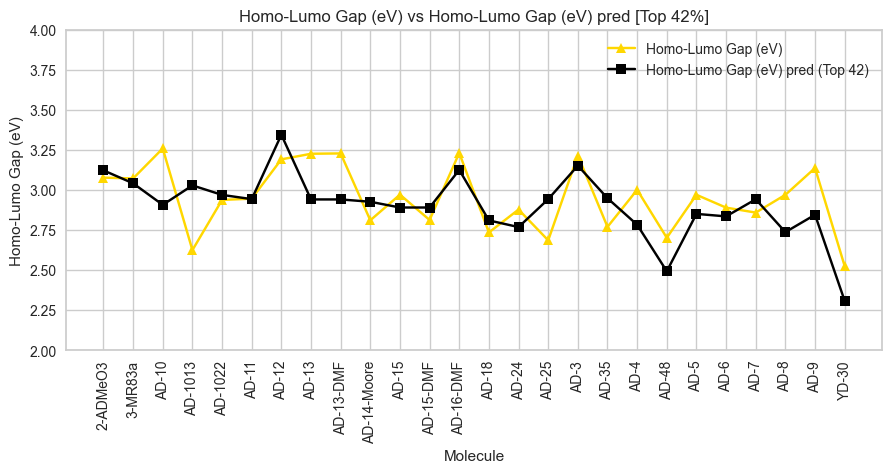

Percentile 48%: RMSE: 0.20952618832914324, R2: -0.05943572603687941


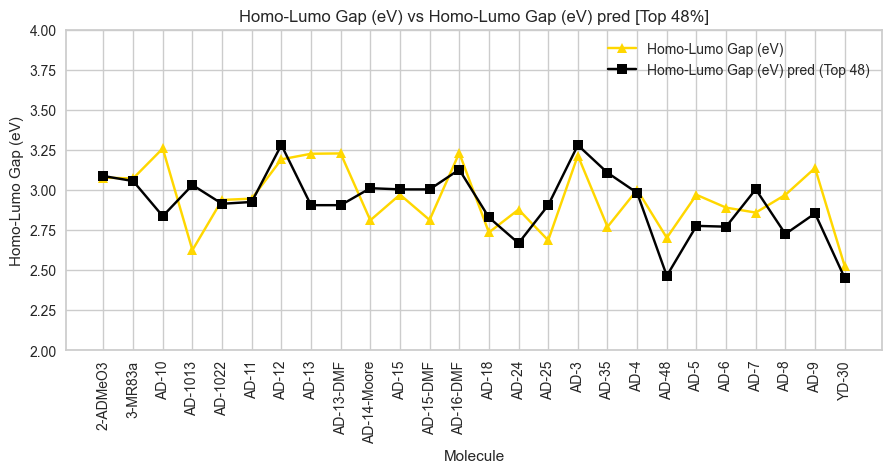

Percentile 54%: RMSE: 0.22309107990280272, R2: -0.20105363138267296


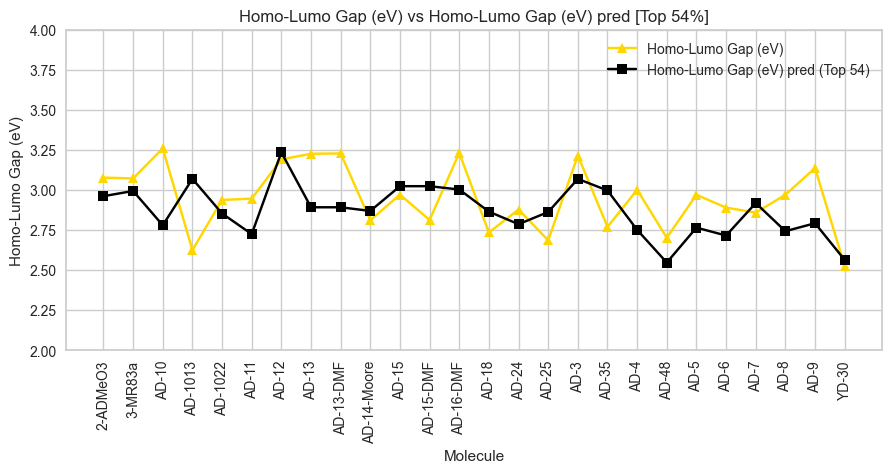

In [73]:
import joblib
import matplotlib.pyplot as plt

# Load the curcumin DataFrame and preprocess if necessary
curcumin_df_sim_morgan_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_morgan_pred.head()

percentiles = range(6, 60, 6)
models = {}
for percentile in percentiles:
    model_filename = f'lgbm_model_top{percentile}.pkl'
    models[percentile] = joblib.load(model_filename)

# Generate predictions and plot
for percentile in percentiles:
    model = models[percentile]
    curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_sim_morgan.iloc[:, 5:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9,4))
    plt.plot(curcumin_df_sim_morgan_pred['Molecule'], curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], marker='^', label='Homo-Lumo Gap (eV)', color='gold')
    plt.plot(curcumin_df_sim_morgan_pred['Molecule'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='s', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='black')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()

<span style="font-size: 22px; font-weight:bold; color:pink;">II. Atom Pair Fingerprint - Cosine Similarity</span>

In [74]:
# parameters of best_model_Cosmaccs_top25 pycaret model
print(best_model_Cosatom_top25.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': 'cpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': 0}


In [75]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import gc
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_morgan_fingerprint(smiles, radius=4, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return list(fingerprint)
    else:
        return None

# Assuming opv_df_sim_Cosatom is already loaded as a DataFrame
opv_df_sim_Cosatom = similarity_dfs[9].drop(['mol', 'fp'], axis=1)

# Parameters for the XGBoost model
xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'n_jobs': -1,
    'random_state': 123,
    'tree_method': 'auto'
}

# Adjusted percentiles
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_sim_Cosatom['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_sim_Cosatom[opv_df_sim_Cosatom['similarity'] >= quantile_value].copy()
    filtered_df['morgan_fp'] = filtered_df['smiles'].apply(generate_morgan_fingerprint)
    
    # Convert fingerprints to more memory-efficient data types
    morgan_fp_list = [generate_morgan_fingerprint(smiles) for smiles in filtered_df['smiles']]
    morgan_fp_df = pd.DataFrame(morgan_fp_list, columns=[f'morgan_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    # Train XGBoost model
    X = filtered_df.iloc[:, 5:] 
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    xgb_model = xgb.XGBRegressor(**xgb_params)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_sim_Cosatom_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    import joblib  # for saving models
    model_filename = f'xgb_model_top{percentile}.pkl'
    joblib.dump(xgb_model, model_filename)

    # Clear memory
    del filtered_df, morgan_fp_list, morgan_fp_df, X, y, X_train, X_test, y_train, y_test, xgb_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_sim_Cosatom_top6: Train R2: 0.8735742729602529, Test R2: 0.8548942922196416, Train RMSE: 0.2167922671008342, Test RMSE: 0.22717361236943723
opv_df_sim_Cosatom_top12: Train R2: 0.8742244580310546, Test R2: 0.8483506441753389, Train RMSE: 0.21380407318219866, Test RMSE: 0.23328219324876867
opv_df_sim_Cosatom_top18: Train R2: 0.873053334091244, Test R2: 0.8509826788179874, Train RMSE: 0.21376053477598844, Test RMSE: 0.2310249169187233
opv_df_sim_Cosatom_top24: Train R2: 0.8739862216359493, Test R2: 0.8522519016914142, Train RMSE: 0.21049954739836568, Test RMSE: 0.2297794019927254
opv_df_sim_Cosatom_top30: Train R2: 0.8735041591137015, Test R2: 0.8449978929490588, Train RMSE: 0.2105529393565747, Test RMSE: 0.23355886333770817
opv_df_sim_Cosatom_top36: Train R2: 0.8749730408106424, Test R2: 0.838220247319789, Train RMSE: 0.20790546900798326, Test RMSE: 0.24106354548031508
opv_df_sim_Cosatom_top42: Train R2: 0.8781703667989007, Test R2: 0.8528403587158577, Train RMSE: 0.20404279580820

DataFrame   Rows  Train R2   Test R2  Train RMSE  Test RMSE
0   opv_df_sim_Cosatom_top6  48180  0.873574  0.854894    0.216792   0.227174
1  opv_df_sim_Cosatom_top12  45105  0.874224  0.848351    0.213804   0.233282
2  opv_df_sim_Cosatom_top18  42030  0.873053  0.850983    0.213761   0.231025
3  opv_df_sim_Cosatom_top24  38954  0.873986  0.852252    0.210500   0.229779
4  opv_df_sim_Cosatom_top30  35879  0.873504  0.844998    0.210553   0.233559
5  opv_df_sim_Cosatom_top36  32804  0.874973  0.838220    0.207905   0.241064
6  opv_df_sim_Cosatom_top42  29728  0.878170  0.852840    0.204043   0.228146
7  opv_df_sim_Cosatom_top48  26653  0.879203  0.834256    0.201426   0.244437
8  opv_df_sim_Cosatom_top54  23578  0.885306  0.844682    0.196075   0.229751

Percentile 6%: RMSE: 0.20246775940695516, R2: 0.010741608859611618


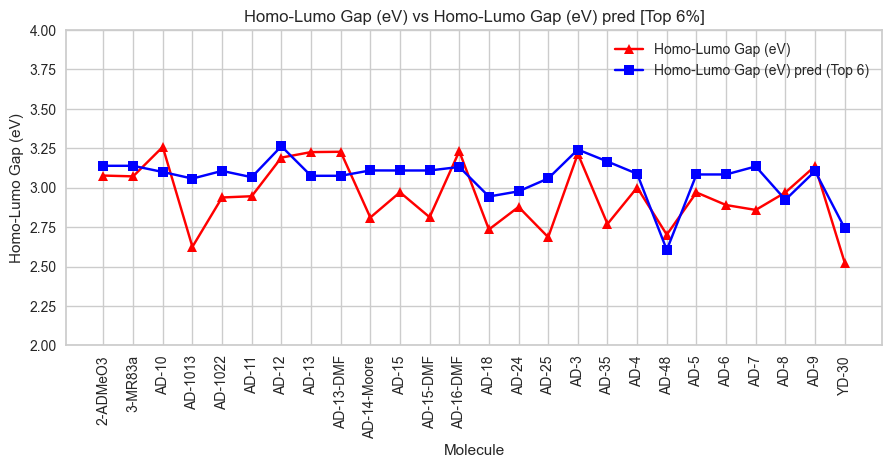

Percentile 12%: RMSE: 0.1955591321771373, R2: 0.0771009650817791


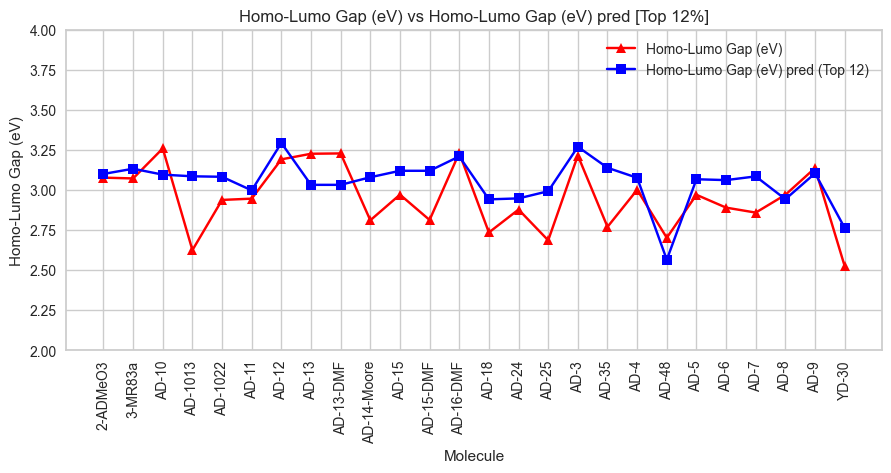

Percentile 18%: RMSE: 0.22989891568471343, R2: -0.2754746604388556


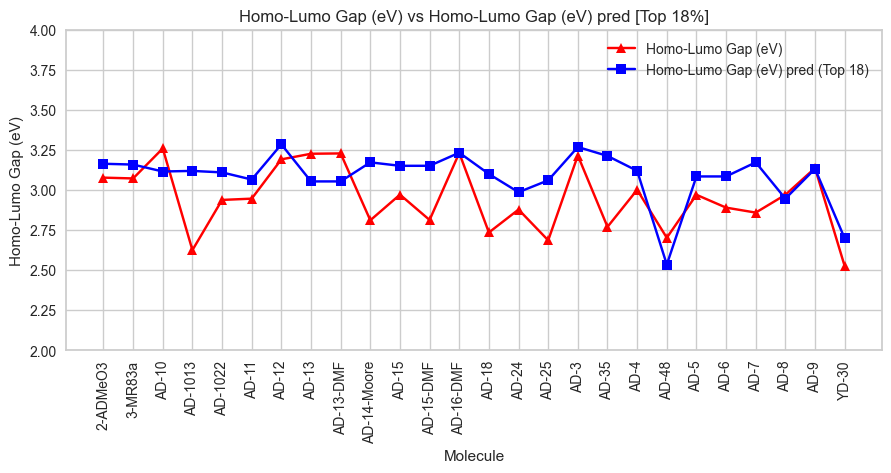

Percentile 24%: RMSE: 0.1786004132914762, R2: 0.23022658490931958


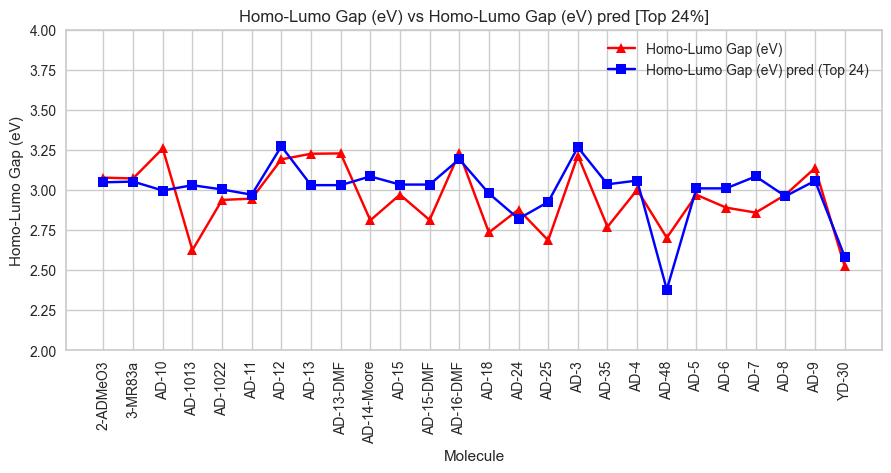

Percentile 30%: RMSE: 0.1669218578505672, R2: 0.3276051031046996


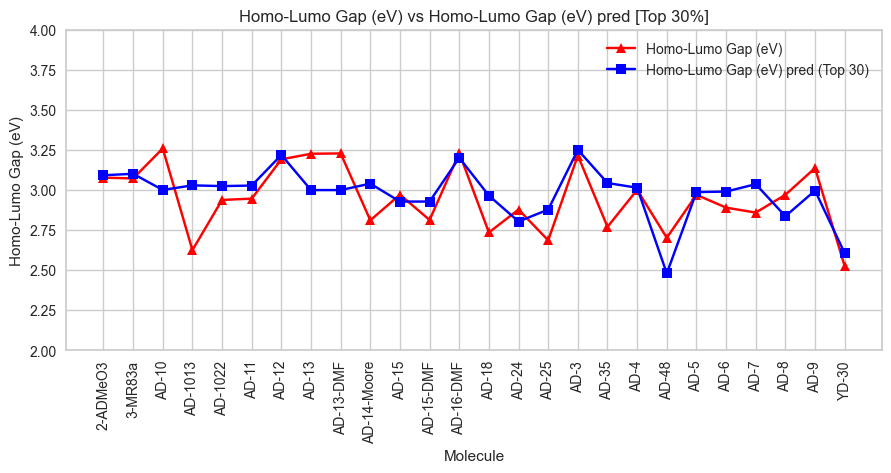

Percentile 36%: RMSE: 0.19730036331990985, R2: 0.060593071145262245


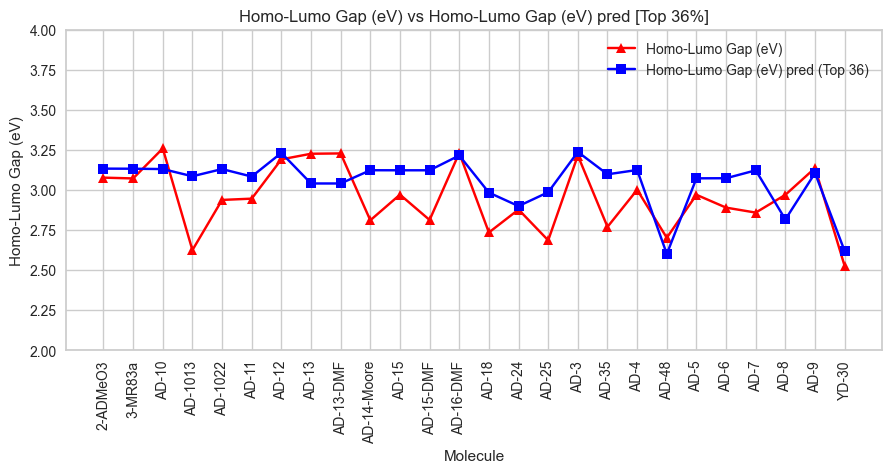

Percentile 42%: RMSE: 0.1829914511816161, R2: 0.19191026201656725


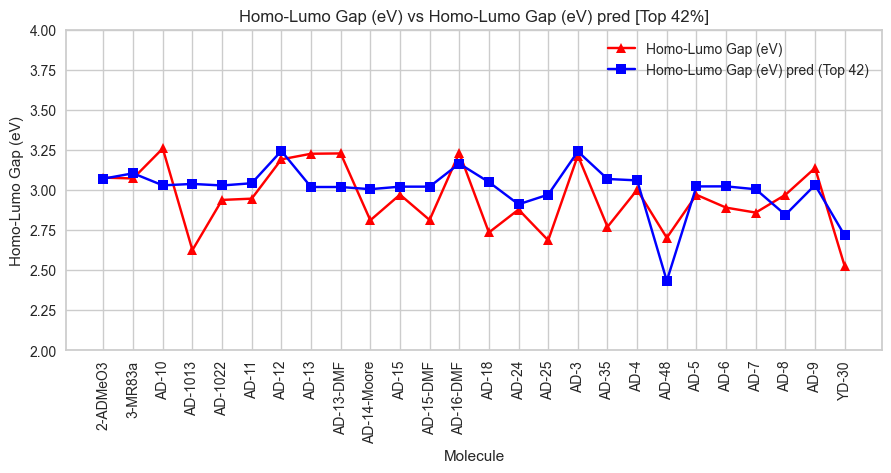

Percentile 48%: RMSE: 0.218151962469583, R2: -0.14846096232266381


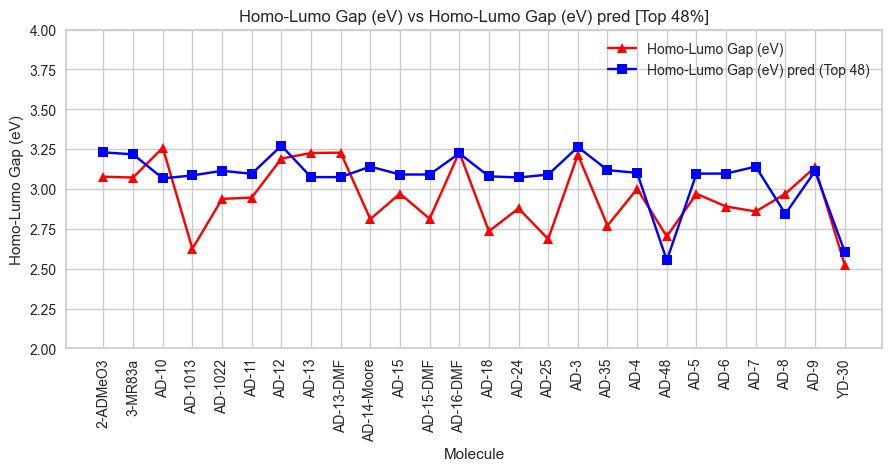

Percentile 54%: RMSE: 0.2376821566863849, R2: -0.363299100594741


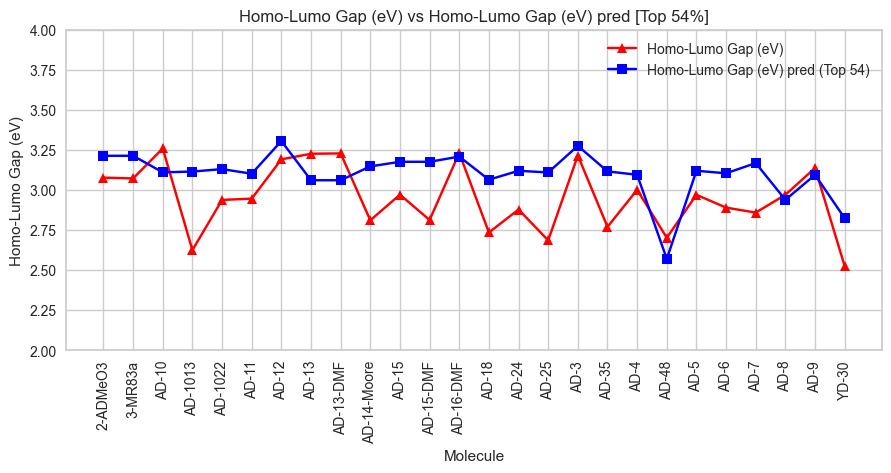

In [76]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the curcumin DataFrame and preprocess if necessary
curcumin_df_sim_morgan_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_morgan_pred.head()

percentiles = range(6, 60, 6)
models = {}
for percentile in percentiles:
    model_filename = f'xgb_model_top{percentile}.pkl'
    models[percentile] = joblib.load(model_filename)

# Generate predictions and plot
for percentile in percentiles:
    model = models[percentile]
    curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_sim_morgan.iloc[:, 5:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9,4))
    plt.plot(curcumin_df_sim_morgan_pred['Molecule'], curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], marker='^', label='Homo-Lumo Gap (eV)', color='Red')
    plt.plot(curcumin_df_sim_morgan_pred['Molecule'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='s', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='blue')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()

<span style="font-size: 22px; font-weight:bold; color:pink;">III. Atom Pair Fingerprint - Dice Similarity</span>

In [78]:
# parameters of best_model_Cosmaccs_top25 pycaret model
print(best_model_Diceatom_top25.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': 'cpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': 0}


In [79]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import gc
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_morgan_fingerprint(smiles, radius=4, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
        return list(fingerprint)
    else:
        return None

# Assuming opv_df_sim_Diceatom is already loaded as a DataFrame
opv_df_sim_Diceatom = similarity_dfs[8].drop(['mol', 'fp'], axis=1)

# Parameters for the XGBoost model
xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'base_score': None,
    'callbacks': None,
    'colsample_bylevel': None,
    'colsample_bynode': None,
    'colsample_bytree': None,
    'device': 'cpu',
    'early_stopping_rounds': None,
    'enable_categorical': False,
    'eval_metric': None,
    'feature_types': None,
    'gamma': None,
    'grow_policy': None,
    'importance_type': None,
    'interaction_constraints': None,
    'learning_rate': None,
    'max_bin': None,
    'max_cat_threshold': None,
    'max_cat_to_onehot': None,
    'max_delta_step': None,
    'max_depth': None,
    'max_leaves': None,
    'min_child_weight': None,
    'missing': np.nan,
    'monotone_constraints': None,
    'multi_strategy': None,
    'n_estimators': None,
    'n_jobs': -1,
    'num_parallel_tree': None,
    'random_state': 123,
    'reg_alpha': None,
    'reg_lambda': None,
    'sampling_method': None,
    'scale_pos_weight': None,
    'subsample': None,
    'tree_method': 'auto',
    'validate_parameters': None,
    'verbosity': 0
}

# Adjusted percentiles
percentiles = range(6, 60, 6)
resulting_dfs = {}
summary = []

for percentile in percentiles:
    quantile_value = opv_df_sim_Diceatom['similarity'].quantile(percentile / 100)
    filtered_df = opv_df_sim_Diceatom[opv_df_sim_Diceatom['similarity'] >= quantile_value].copy()
    filtered_df['morgan_fp'] = filtered_df['smiles'].apply(generate_morgan_fingerprint)
    
    # Convert fingerprints to more memory-efficient data types
    morgan_fp_list = [generate_morgan_fingerprint(smiles) for smiles in filtered_df['smiles']]
    morgan_fp_df = pd.DataFrame(morgan_fp_list, columns=[f'morgan_{i}' for i in range(2048)], dtype=np.uint8)
    
    filtered_df = pd.concat([filtered_df.reset_index(drop=True), morgan_fp_df], axis=1)
    
    # Train XGBoost model
    X = filtered_df.iloc[:, 5:] 
    y = filtered_df["GAP_calib"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    xgb_model = xgb.XGBRegressor(**xgb_params)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    df_name = f'opv_df_sim_Diceatom_top{percentile}'
    resulting_dfs[df_name] = filtered_df
    
    summary.append({
        'DataFrame': df_name,
        'Rows': filtered_df.shape[0],
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f'{df_name}: Train R2: {train_r2}, Test R2: {test_r2}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    
    import joblib  # for saving models
    model_filename = f'xgb_model_top{percentile}.pkl'
    joblib.dump(xgb_model, model_filename)

    # Clear memory
    del filtered_df, morgan_fp_list, morgan_fp_df, X, y, X_train, X_test, y_train, y_test, xgb_model, y_train_pred, y_test_pred
    gc.collect()

summary_df = pd.DataFrame(summary)
summary_df

opv_df_sim_Diceatom_top6: Train R2: 0.9298076807096977, Test R2: 0.8880210320374605, Train RMSE: 0.16083782035078312, Test RMSE: 0.20315902410316247
opv_df_sim_Diceatom_top12: Train R2: 0.9311341557693724, Test R2: 0.8840983961648851, Train RMSE: 0.15848210946780836, Test RMSE: 0.201935899465441
opv_df_sim_Diceatom_top18: Train R2: 0.9322399528148363, Test R2: 0.8954979465611953, Train RMSE: 0.15534419383197123, Test RMSE: 0.19141519643916746
opv_df_sim_Diceatom_top24: Train R2: 0.9335844682500729, Test R2: 0.8909780464082115, Train RMSE: 0.1524926431248949, Test RMSE: 0.1952851846166558
opv_df_sim_Diceatom_top30: Train R2: 0.9363927354831492, Test R2: 0.8926091945284252, Train RMSE: 0.14845365682066425, Test RMSE: 0.19402586038299088
opv_df_sim_Diceatom_top36: Train R2: 0.9378141030264988, Test R2: 0.8886927108743902, Train RMSE: 0.14569475472162824, Test RMSE: 0.197890924374941
opv_df_sim_Diceatom_top42: Train R2: 0.9378882355109498, Test R2: 0.8889078307188728, Train RMSE: 0.1445705

DataFrame   Rows  Train R2   Test R2  Train RMSE  Test RMSE
0   opv_df_sim_Diceatom_top6  48185  0.929808  0.888021    0.160838   0.203159
1  opv_df_sim_Diceatom_top12  45116  0.931134  0.884098    0.158482   0.201936
2  opv_df_sim_Diceatom_top18  42033  0.932240  0.895498    0.155344   0.191415
3  opv_df_sim_Diceatom_top24  38989  0.933584  0.890978    0.152493   0.195285
4  opv_df_sim_Diceatom_top30  35889  0.936393  0.892609    0.148454   0.194026
5  opv_df_sim_Diceatom_top36  32827  0.937814  0.888693    0.145695   0.197891
6  opv_df_sim_Diceatom_top42  29744  0.937888  0.888908    0.144571   0.195934
7  opv_df_sim_Diceatom_top48  26688  0.943539  0.884240    0.137086   0.197202
8  opv_df_sim_Diceatom_top54  23592  0.944137  0.890998    0.135796   0.190800

Percentile 6%: RMSE: 0.20306330033153153, R2: 0.004913418576012796


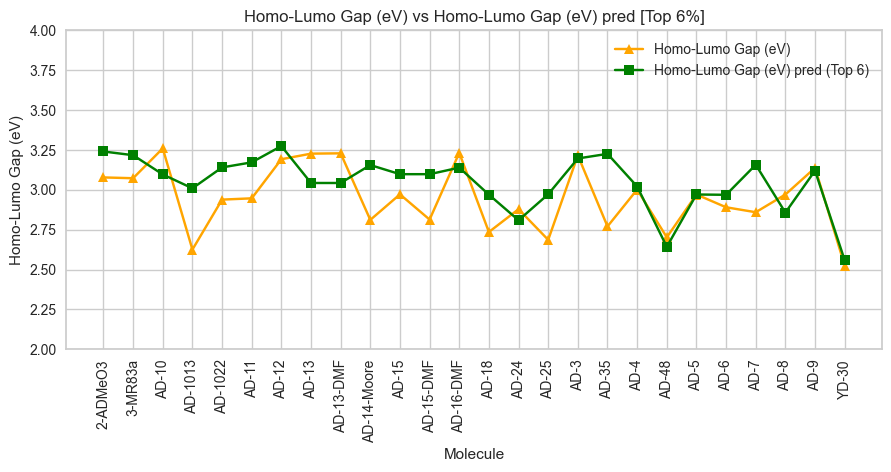

Percentile 12%: RMSE: 0.2201110262453355, R2: -0.16918056196992004


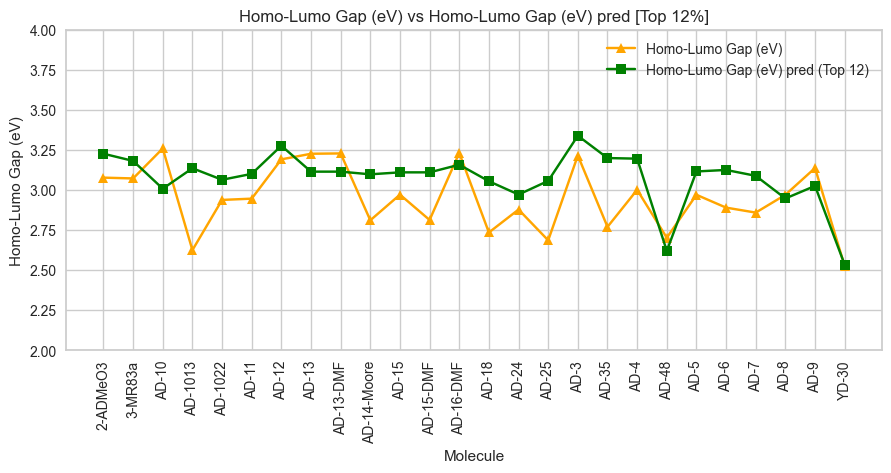

Percentile 18%: RMSE: 0.27957060443815446, R2: -0.8861707250758224


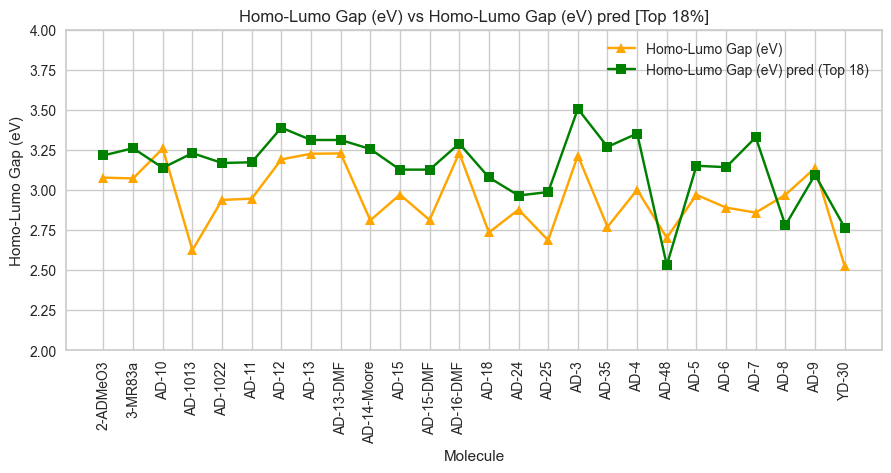

Percentile 24%: RMSE: 0.18871991572392016, R2: 0.14052458765214315


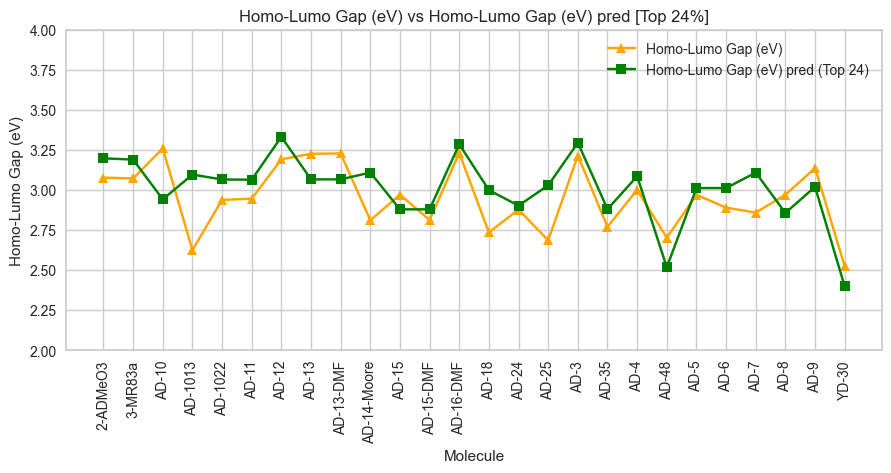

Percentile 30%: RMSE: 0.23408388685071854, R2: -0.32233358780025156


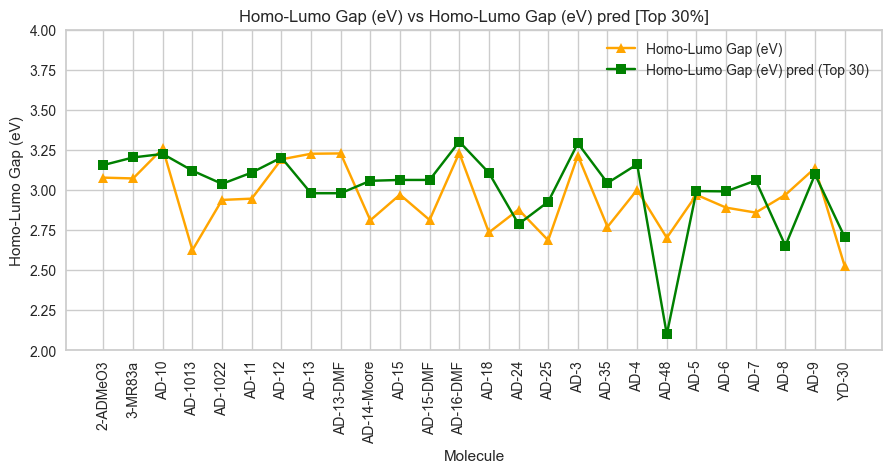

Percentile 36%: RMSE: 0.23121699519466427, R2: -0.29014194459426657


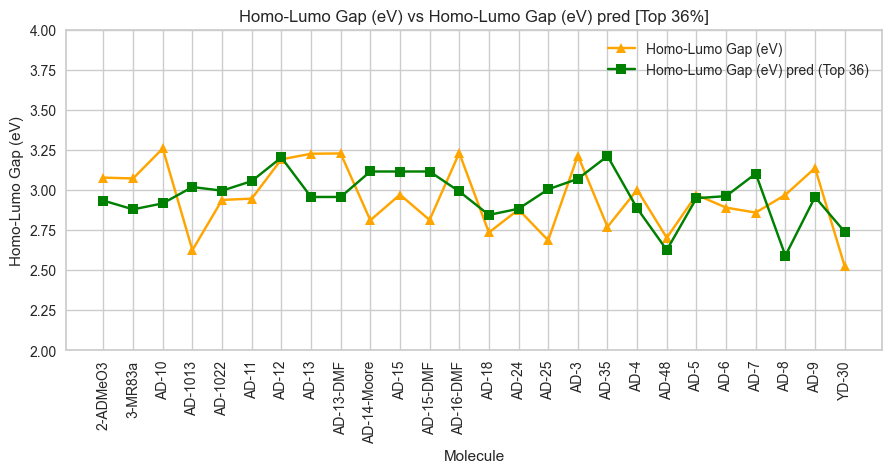

Percentile 42%: RMSE: 0.2171281038743973, R2: -0.13770605310801942


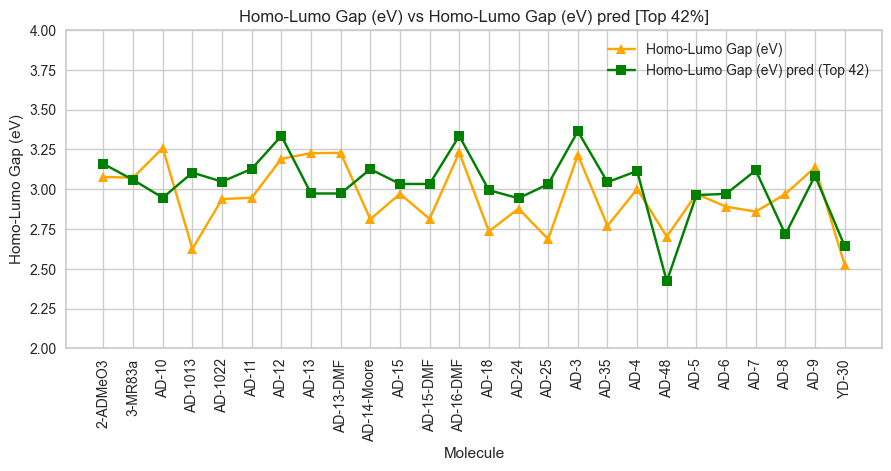

Percentile 48%: RMSE: 0.28121633789579825, R2: -0.9084425282696593


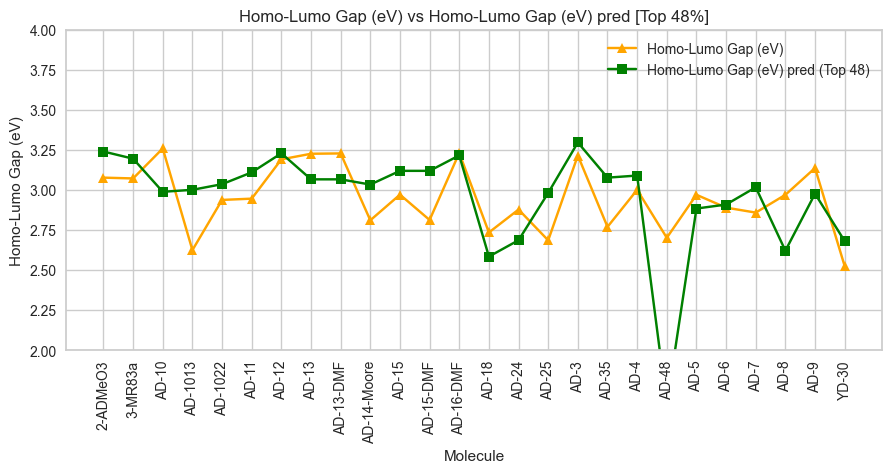

Percentile 54%: RMSE: 0.19493148288065798, R2: 0.08301556858447723


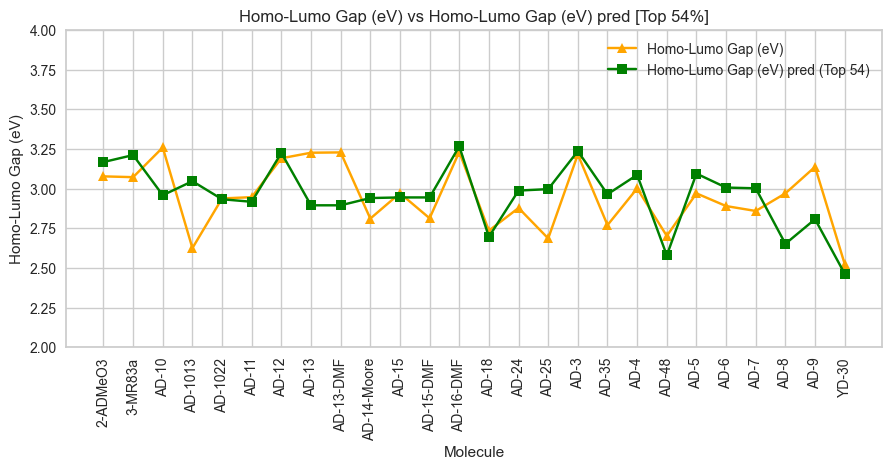

In [84]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the curcumin DataFrame and preprocess if necessary
curcumin_df_sim_morgan_pred = curcumin_df_sim_morgan.drop(curcumin_df_sim_morgan.columns[5:], axis=1)
curcumin_df_sim_morgan_pred.head()

# Define percentiles and load models
percentiles = range(6, 60, 6)
models = {}
for percentile in percentiles:
    model_filename = f'xgb_model_top{percentile}.pkl'
    models[percentile] = joblib.load(model_filename)

# Generate predictions and plot results
for percentile in percentiles:
    model = models[percentile]
    curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'] = model.predict(curcumin_df_sim_morgan.iloc[:, 5:])
    
    # Calculate metrics
    rmse = mean_squared_error(curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], squared=False)
    r2 = r2_score(curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'])
    
    print(f'Percentile {percentile}%: RMSE: {rmse}, R2: {r2}')
    
    # Plotting
    plt.figure(figsize=(9, 4))
    plt.plot(curcumin_df_sim_morgan_pred['Molecule'], curcumin_df_sim_morgan_pred['Homo-Lumo Gap (eV)'], marker='^', label='Homo-Lumo Gap (eV)', color='orange')
    plt.plot(curcumin_df_sim_morgan_pred['Molecule'], curcumin_df_sim_morgan_pred[f'Homo-Lumo Gap (eV) pred (Top {percentile})'], marker='s', label=f'Homo-Lumo Gap (eV) pred (Top {percentile})', color='green')
    plt.xlabel('Molecule')
    plt.ylabel('Homo-Lumo Gap (eV)')
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'Homo-Lumo Gap (eV) vs Homo-Lumo Gap (eV) pred [Top {percentile}%]')
    plt.legend()
    plt.ylim(2, 4)
    plt.xticks(rotation=90)
    plt.show()